# Conway's Game of Life
The Game of Life, also known simply as Life, is a cellular automaton devised by the British mathematician John Horton Conway in 1970. It is a zero-player game, meaning that its evolution is determined by its initial state, requiring no further input. One interacts with the Game of Life by creating an initial configuration and observing how it evolves. It is Turing complete and can simulate a universal constructor or any other Turing machine.

### Rules
The universe of the Game of Life is an infinite, two-dimensional orthogonal grid of square cells, each of which is in one of two possible states, live or dead (or populated and unpopulated, respectively). Every cell interacts with its eight neighbors, which are the cells that are horizontally, vertically, or diagonally adjacent. At each step in time, the following transitions occur:

1- Any live cell with fewer than two live neighbors dies, as if by underpopulation.

2- Any live cell with two or three live neighbors lives on to the next generation.

3- Any live cell with more than three live neighbors dies, as if by overpopulation.

4- Any dead cell with exactly three live neighbors becomes a live cell, as if by reproduction.

The initial pattern constitutes the seed of the system. The first generation is created by applying the above rules simultaneously to every cell in the seed, live or dead; births and deaths occur simultaneously, and the discrete moment at which this happens is sometimes called a tick. Each generation is a pure function of the preceding one. The rules continue to be applied repeatedly to create further generations.

### Simulation
We want to begin with a random world and see what happens in next generations. First, we will consider non periodic boundary condition. Then we continue with periodic boundary condition.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from PIL import Image
import os
import imageio

In [6]:
def count_alive_neighbors_p(board, row, col):
    """
    Count the number of alive neighbors for a given cell (row, col) on the board
    with periodic boundary conditions. The cell itself is not counted.

    Parameters:
    - board: 2D list representing the current state of the game.
    - row: Row index of the cell.
    - col: Column index of the cell.

    Returns:
    - count: Number of alive neighbors.
    """
    rows, cols = len(board), len(board[0])
    count = 0

    # Define the eight possible neighbors' relative positions
    neighbors = [(-1, -1), (-1, 0), (-1, 1),
                 (0, -1),           (0, 1),
                 (1, -1), (1, 0), (1, 1)]

    for dr, dc in neighbors:
        # Calculate the coordinates of the neighbor with periodic boundary conditions
        r, c = (row + dr) % rows, (col + dc) % cols

        # Exclude the cell itself from the count
        if (r, c) != (row, col):
            # Increment count if the neighbor is alive (1)
            count += board[r][c]

    return count

In [7]:
def count_alive_neighbors(board, row, col):
    """
    Count the number of alive neighbors for a given cell (row, col) on the board.

    Parameters:
    - board: 2D list representing the current state of the game.
    - row: Row index of the cell.
    - col: Column index of the cell.

    Returns:
    - count: Number of alive neighbors.
    """
    rows, cols = len(board), len(board[0])
    count = 0

    # Define the eight possible neighbors' relative positions
    neighbors = [(-1, -1), (-1, 0), (-1, 1),
                 (0, -1),           (0, 1),
                 (1, -1), (1, 0), (1, 1)]

    for dr, dc in neighbors:
        r, c = row + dr, col + dc

        # Check if the neighbor is within the bounds of the board
        if 0 <= r < rows and 0 <= c < cols:
            # Increment count if the neighbor is alive (1)
            count += board[r][c]

    return count

In [8]:
def next_generation_p(current_generation):
    """
    Generate the next generation of the Conway's Game of Life.

    Parameters:
    - current_generation: 2D list representing the current state of the game.

    Returns:
    - new_generation: 2D list representing the next generation.
    """
    rows, cols = len(current_generation), len(current_generation[0])

    # Create a new 2D list to store the next generation
    new_generation = [[0] * cols for _ in range(rows)]

    for i in range(rows):
        for j in range(cols):
            # Count the number of alive neighbors for each cell
            neighbors_count = count_alive_neighbors_p(current_generation, i, j)

            # Apply Conway's rules to determine the next state of the cell
            if current_generation[i][j] == 1:
                # Cell is alive
                if neighbors_count == 2 or neighbors_count == 3:
                    new_generation[i][j] = 1  # Cell survives
            else:
                # Cell is dead
                if neighbors_count == 3:
                    new_generation[i][j] = 1  # Cell becomes alive

    return new_generation

In [9]:
def next_generation(current_generation):
    """
    Generate the next generation of the Conway's Game of Life.

    Parameters:
    - current_generation: 2D list representing the current state of the game.

    Returns:
    - new_generation: 2D list representing the next generation.
    """
    rows, cols = len(current_generation), len(current_generation[0])

    # Create a new 2D list to store the next generation
    new_generation = [[0] * cols for _ in range(rows)]

    for i in range(rows):
        for j in range(cols):
            # Count the number of alive neighbors for each cell
            neighbors_count = count_alive_neighbors(current_generation, i, j)

            # Apply Conway's rules to determine the next state of the cell
            if current_generation[i][j] == 1:
                # Cell is alive
                if neighbors_count == 2 or neighbors_count == 3:
                    new_generation[i][j] = 1  # Cell survives
            else:
                # Cell is dead
                if neighbors_count == 3:
                    new_generation[i][j] = 1  # Cell becomes alive

    return new_generation

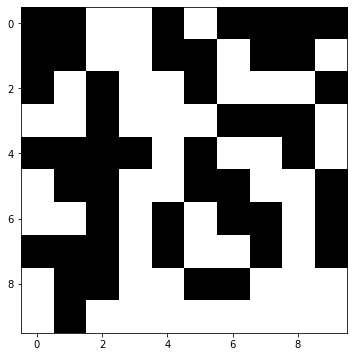

In [10]:
# testing the algorhitm
n = 10
world = np.random.randint(2, size=(n, n))

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(world, cmap='gray')
plt.show()

#### With non-periodic boundary condition:

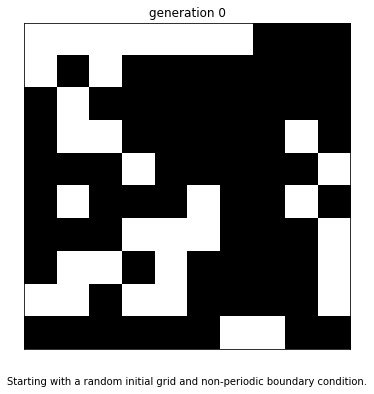

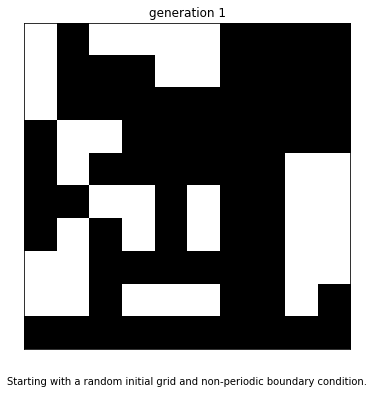

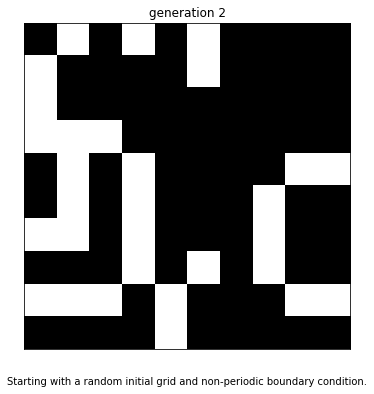

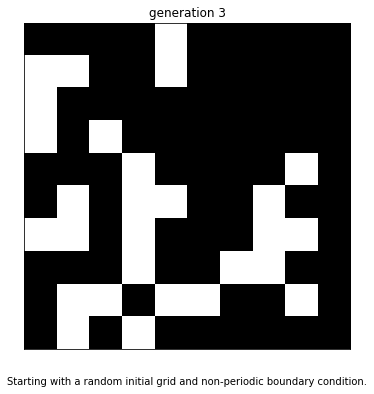

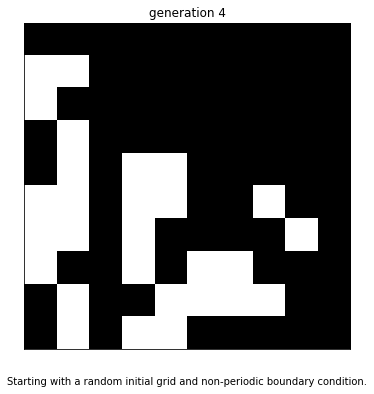

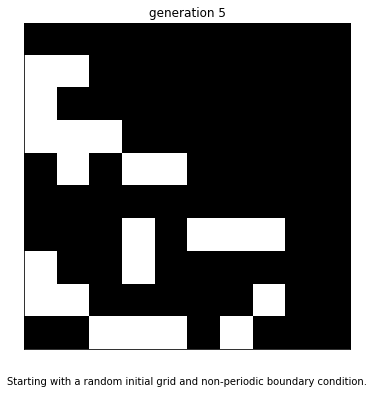

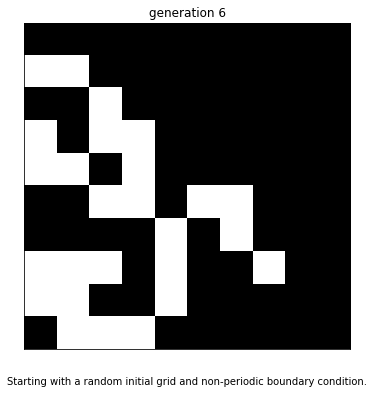

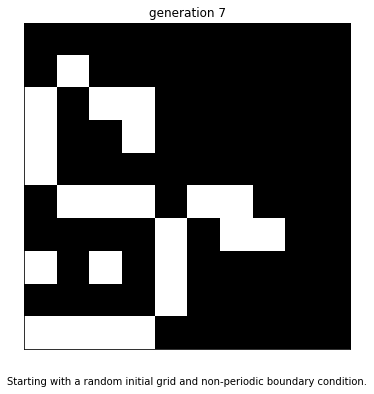

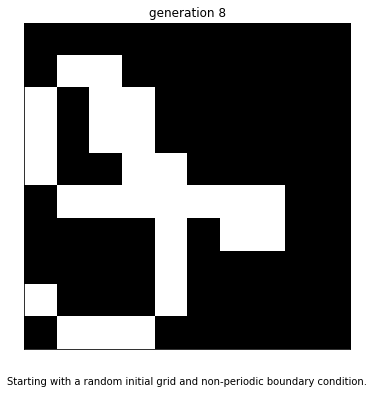

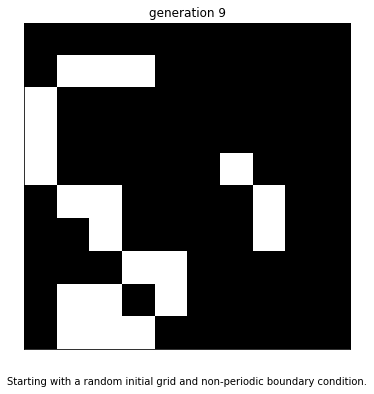

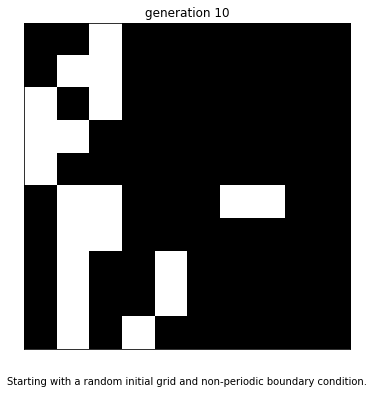

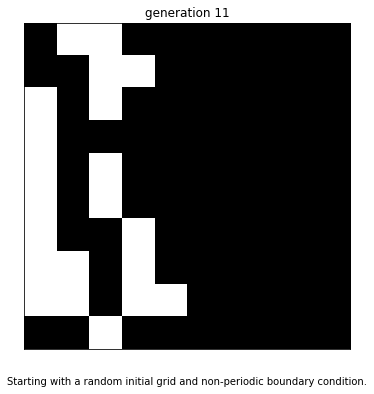

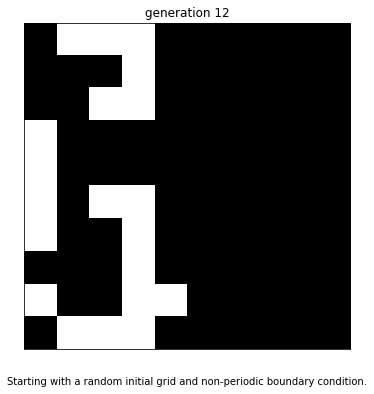

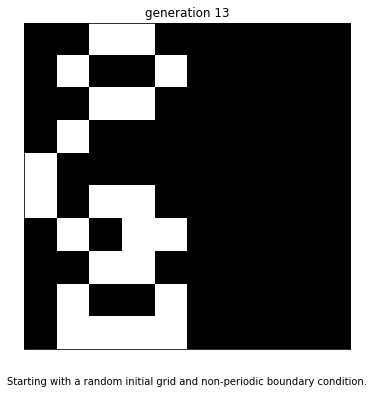

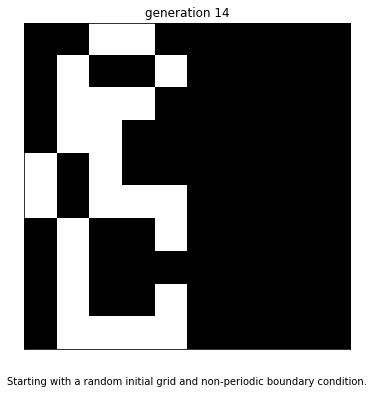

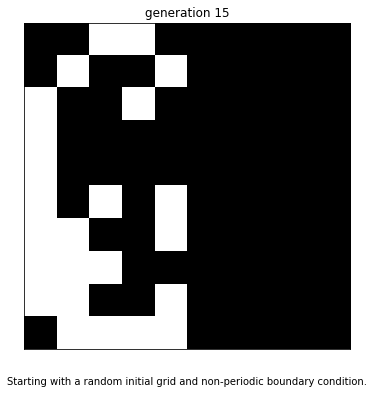

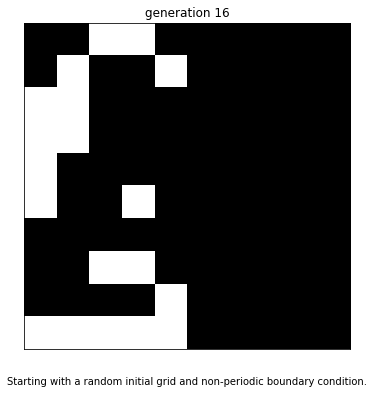

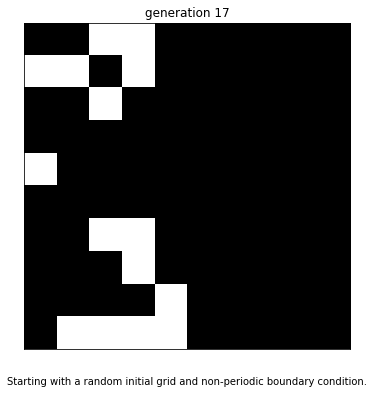

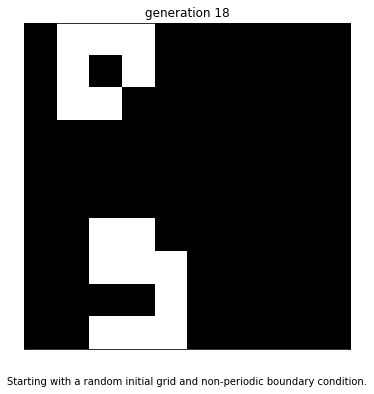

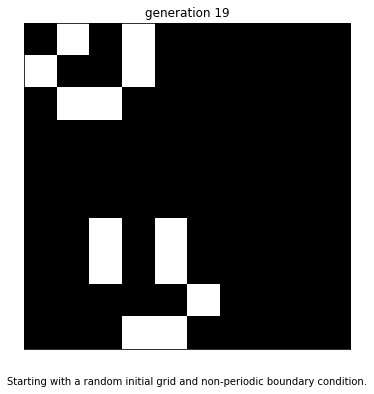

In [25]:
t = 20
n = 10
world = np.random.randint(2, size=(n, n))
new_generation = next_generation(world)
for _ in range(t):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(new_generation, cmap='gray')
    plt.title(f'generation {_}')
    plt.xticks([])
    plt.yticks([])
    caption_text = "Starting with a random initial grid and non-periodic boundary condition."
    plt.text(0.5, -0.1, caption_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)
    plt.savefig(f'/Users/Mahyar/Desktop/conway/1/{_}.png', dpi=100)  # save to folder 1
    plt.show()
    new_generation = next_generation(new_generation)

#### With periodic boundary condition:

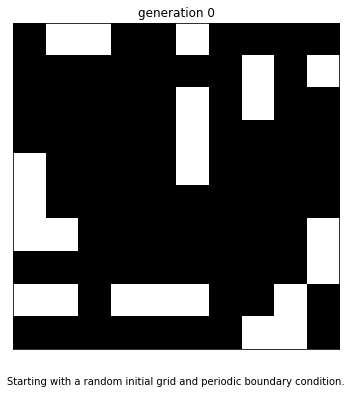

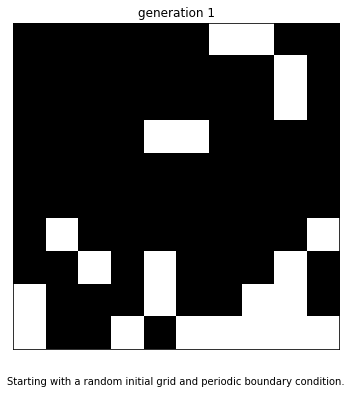

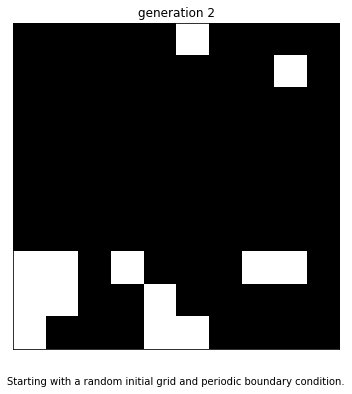

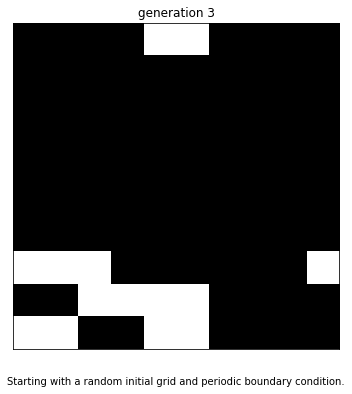

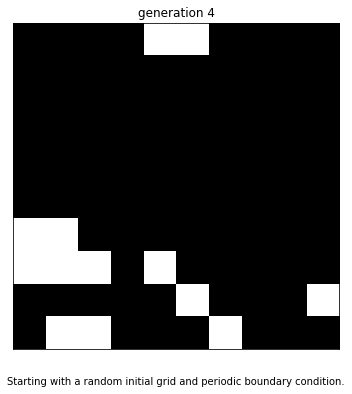

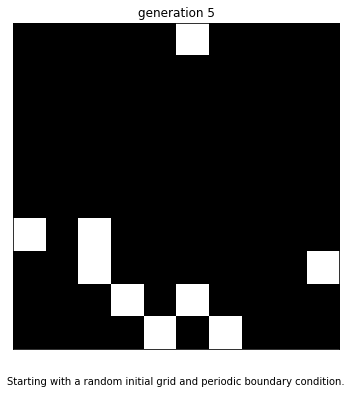

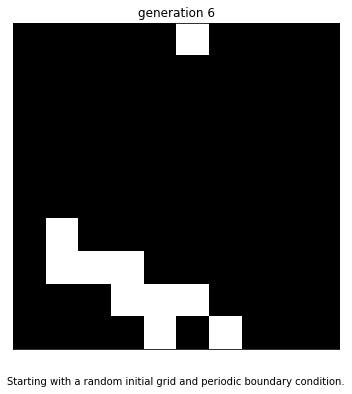

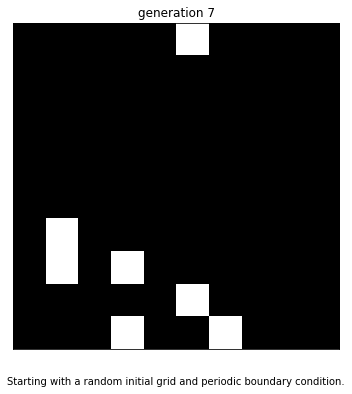

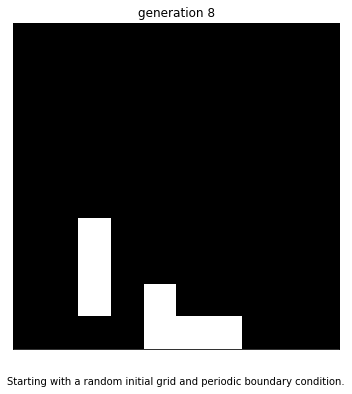

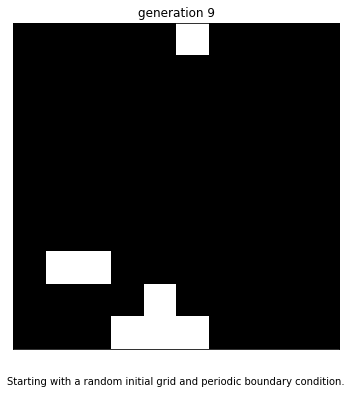

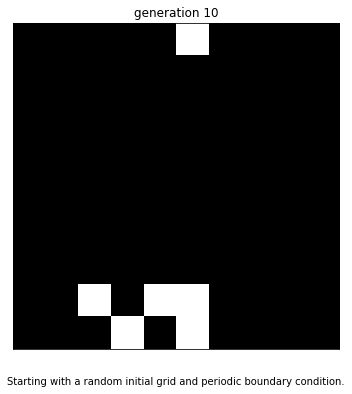

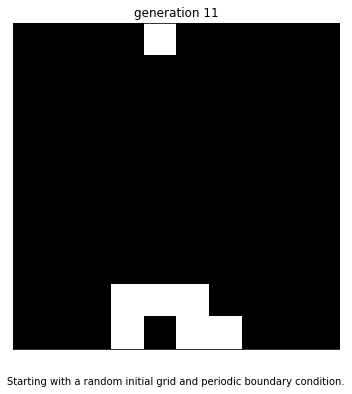

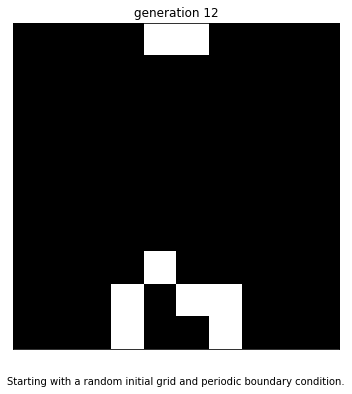

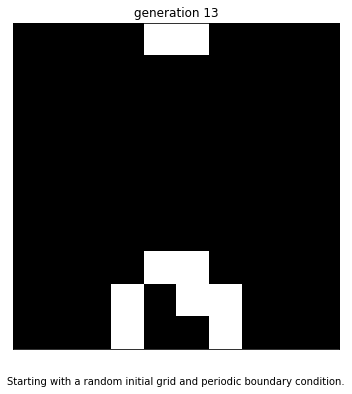

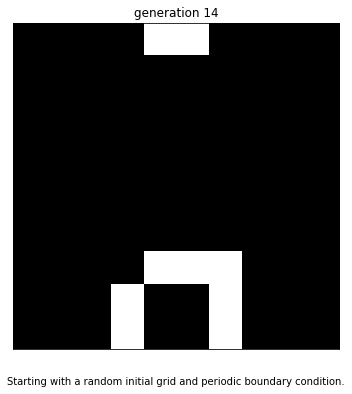

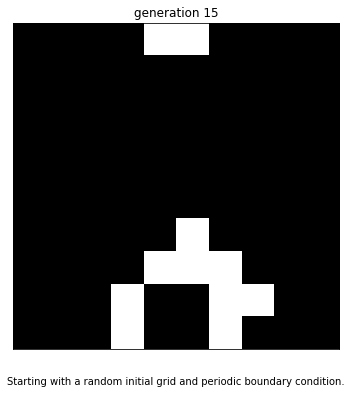

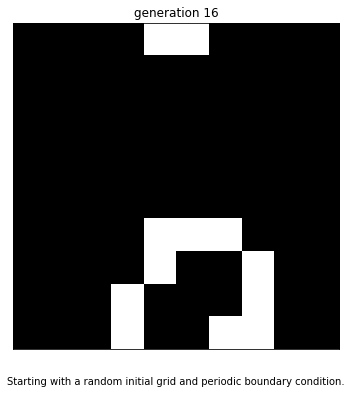

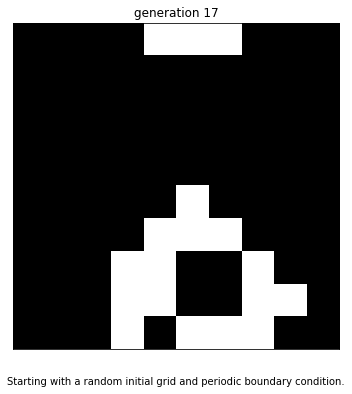

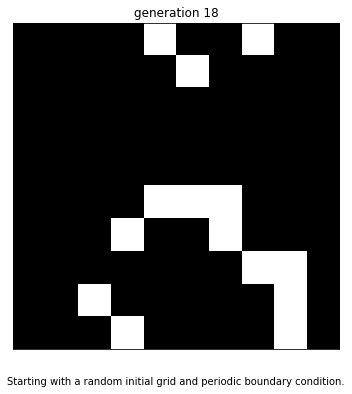

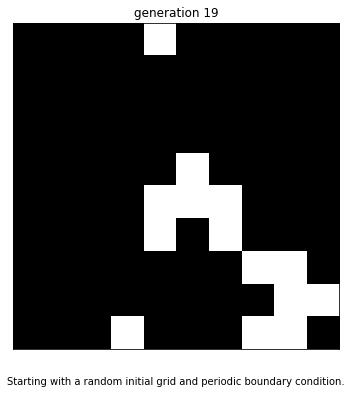

In [33]:
t = 20
n = 10
world = np.random.randint(2, size=(n, n))
new_generation = next_generation_p(world)
for _ in range(t):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(new_generation, cmap='gray')
    plt.title(f'generation {_}')
    plt.xticks([])
    plt.yticks([])
    caption_text = "Starting with a random initial grid and periodic boundary condition."
    plt.text(0.5, -0.1, caption_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)
    plt.savefig(f'/Users/Mahyar/Desktop/conway/2/{_}.png', dpi=100)  # save to folder 2
    plt.show()
    new_generation = next_generation_p(new_generation)

### 1) Still lifes:
No change will happen. It's like an steady state for the system

In [30]:
world1 = np.array([[1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                   [1, 1, 0, 0, 0, 0, 1, 0, 0, 0],
                   [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
                   [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
                   [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                   [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                   [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
                   [0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  ])

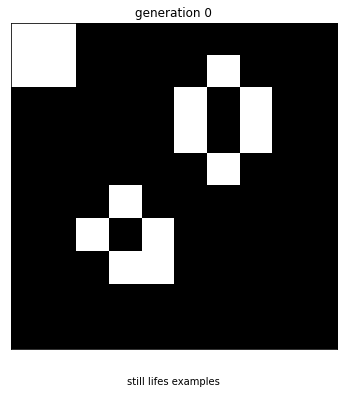

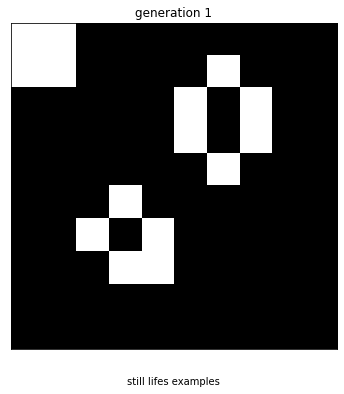

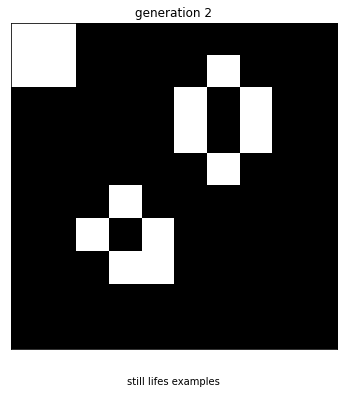

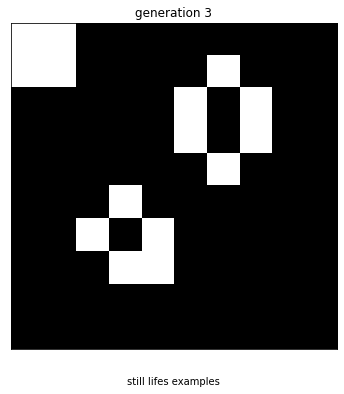

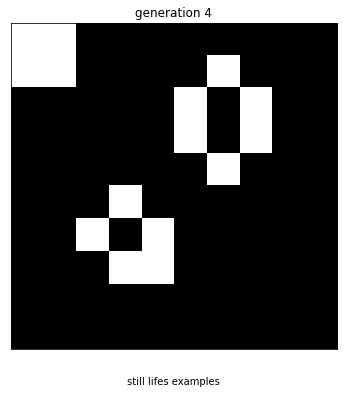

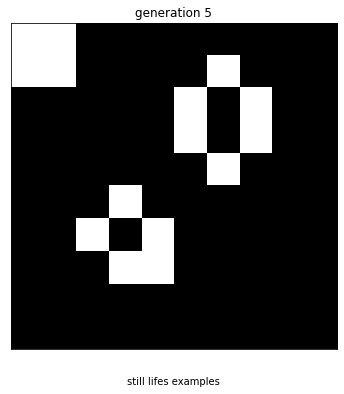

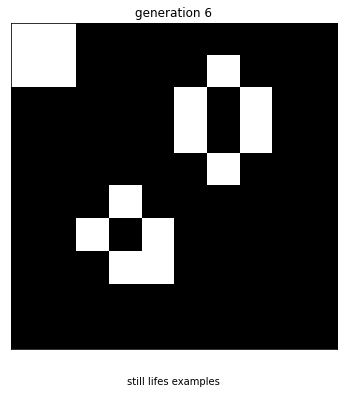

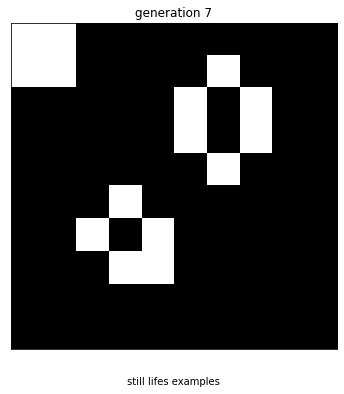

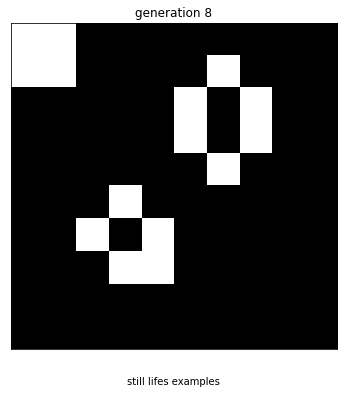

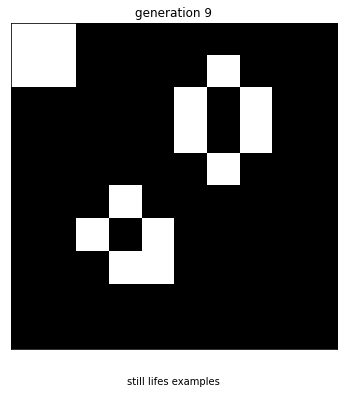

In [34]:
t = 10
new_generation = next_generation_p(world1)
for _ in range(t):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(new_generation, cmap='gray')
    plt.title(f'generation {_}')
    plt.xticks([])
    plt.yticks([])
    caption_text = "still lifes examples"
    plt.text(0.5, -0.1, caption_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)
    plt.savefig(f'/Users/Mahyar/Desktop/conway/3/{_}.png', dpi=100)  # save to folder 3
    plt.show()
    new_generation = next_generation_p(new_generation)

As it can be seen, no change will happen in the arrangement of the grid.

### 2) Oscillators:
Oscillators tend to oscillate several times then go back to their inital state. They won't move after each oscillation.

In [35]:
world2 = np.array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                   [1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                   [1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                   [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [1, 1, 1, 0, 0, 1, 1, 0, 0, 0],
                   [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
                   [0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
                  ])

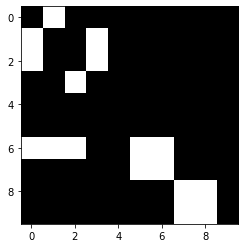

In [36]:
plt.imshow(world2, cmap='gray');

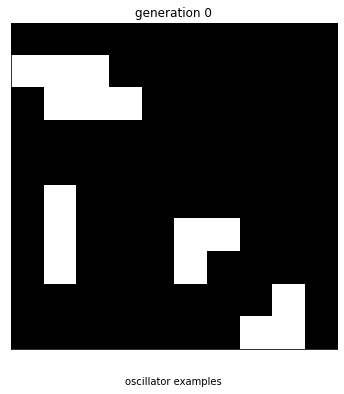

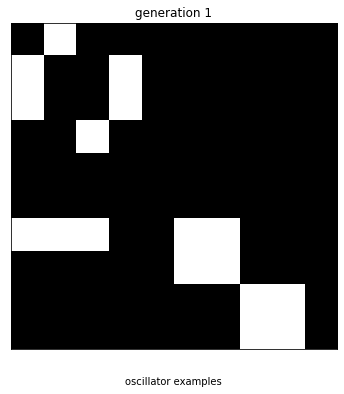

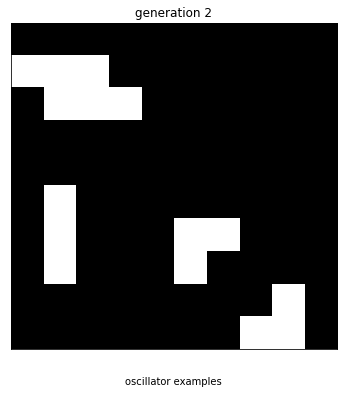

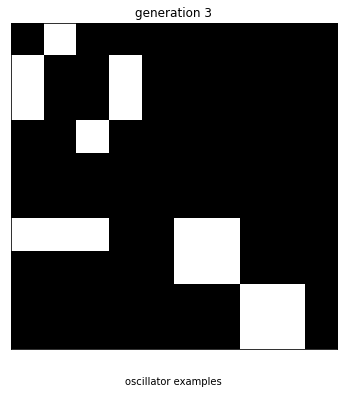

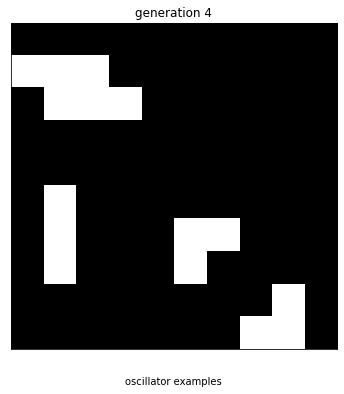

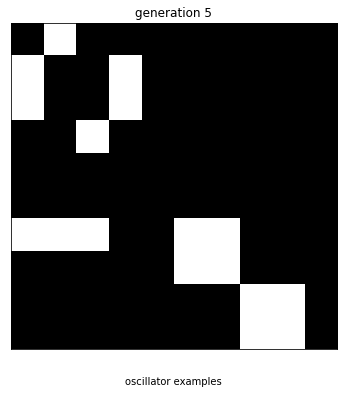

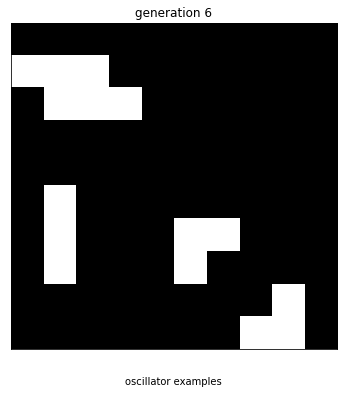

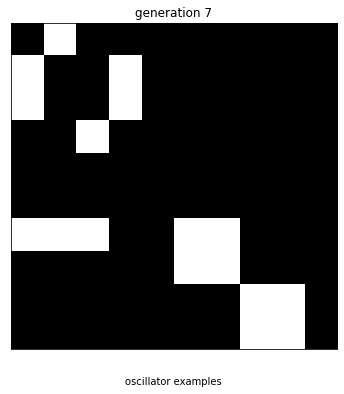

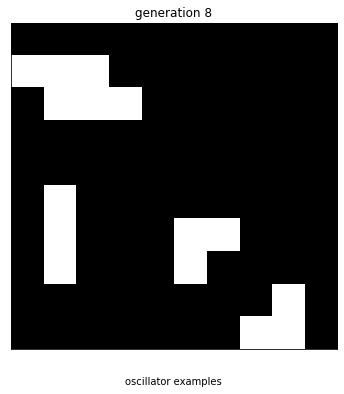

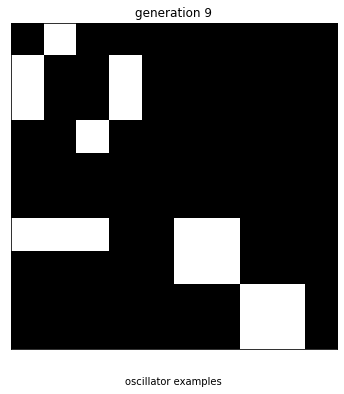

In [37]:
t = 10
new_generation = next_generation_p(world2)
for _ in range(t):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(new_generation, cmap='gray')
    plt.title(f'generation {_}')
    plt.xticks([])
    plt.yticks([])
    caption_text = "oscillator examples"
    plt.text(0.5, -0.1, caption_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)
    plt.savefig(f'/Users/Mahyar/Desktop/conway/4/{_}.png', dpi=100)  # save to folder 4
    plt.show()
    new_generation = next_generation_p(new_generation)

### 3) Gliders:
Gliders are oscillators that move several blocks when they come back to their initial state.

In [42]:
world3 = np.array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                   [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                   [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  ])

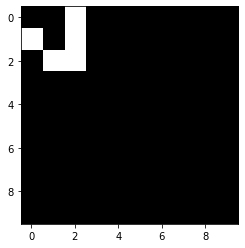

In [43]:
plt.imshow(world3, cmap='gray');

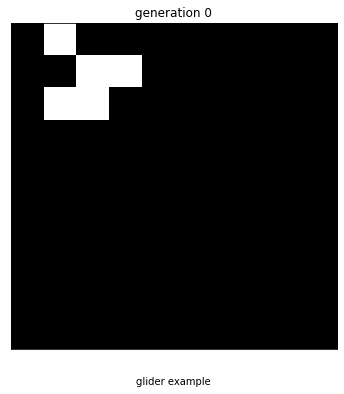

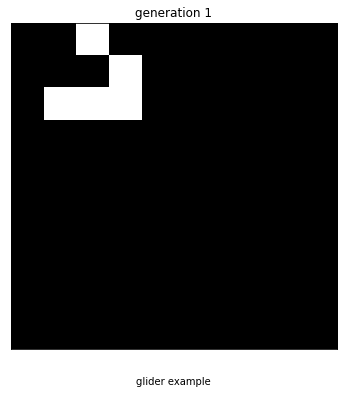

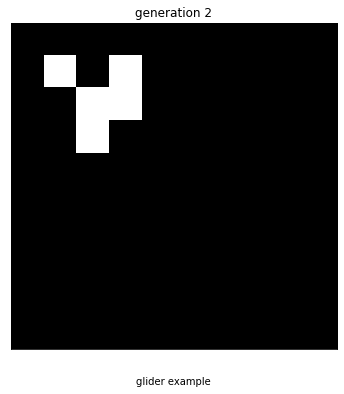

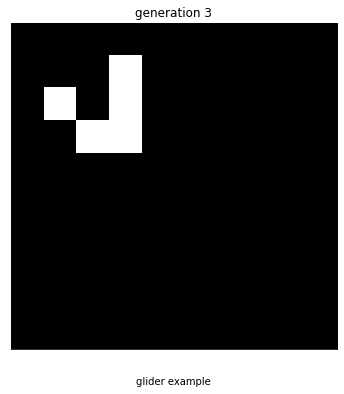

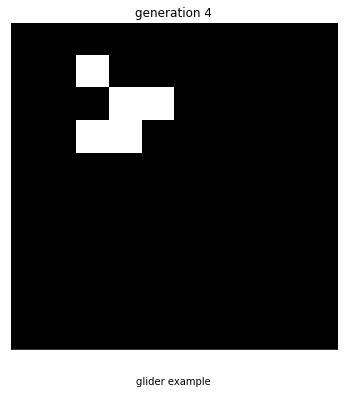

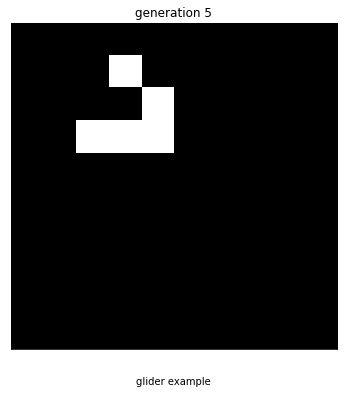

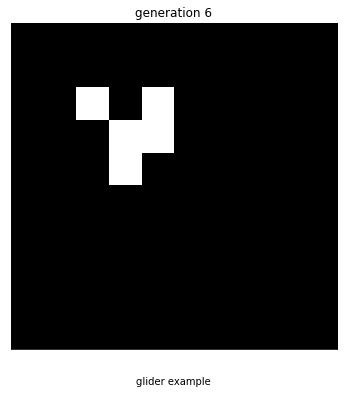

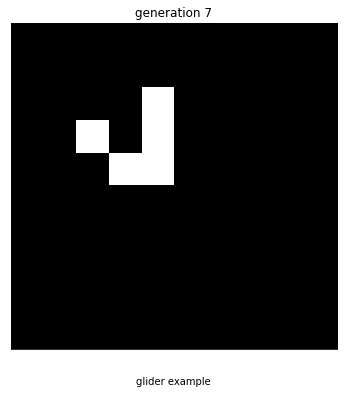

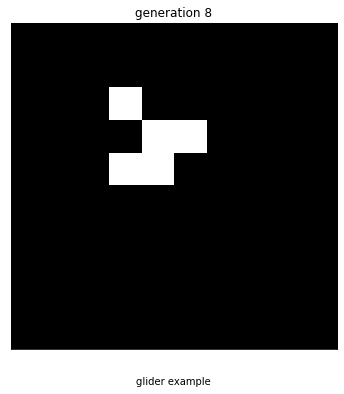

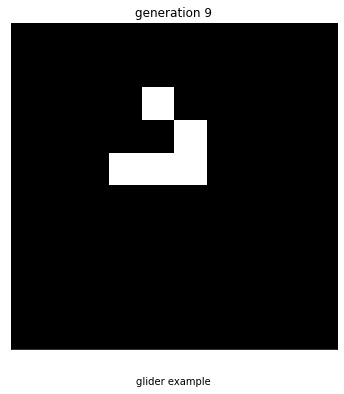

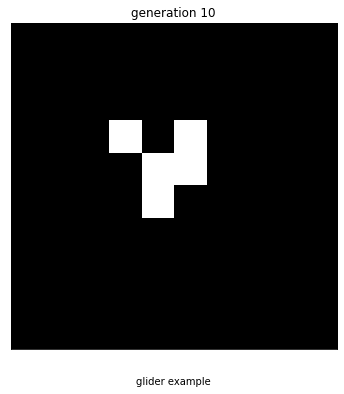

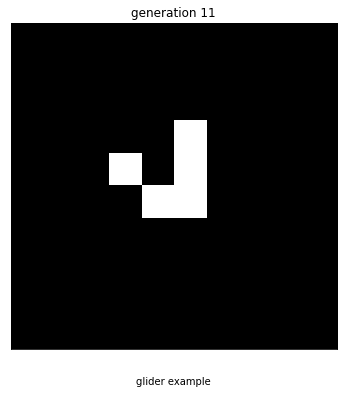

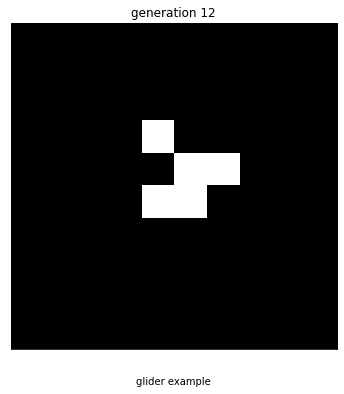

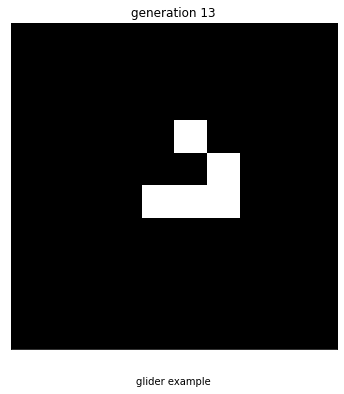

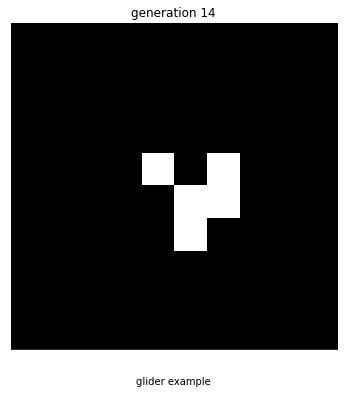

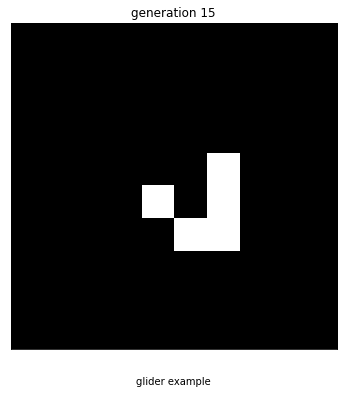

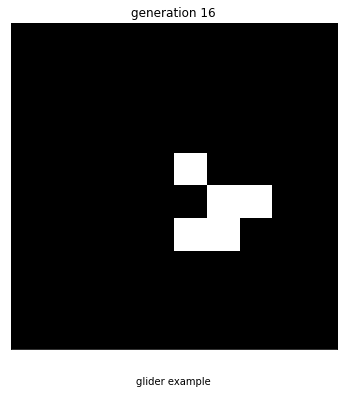

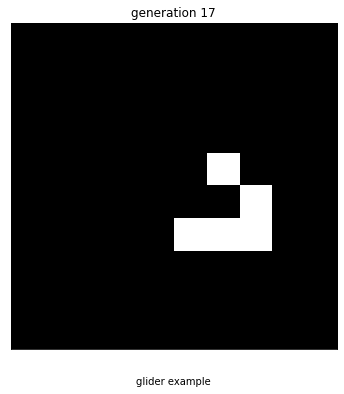

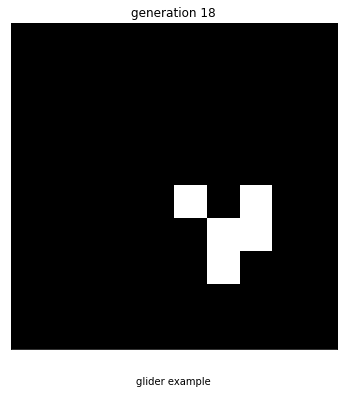

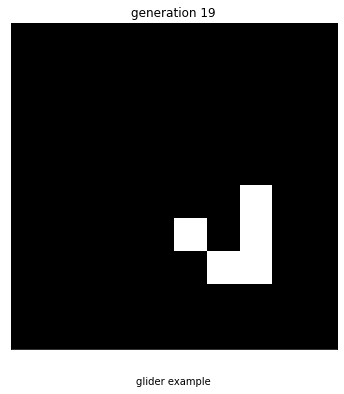

In [51]:
t = 20
new_generation = next_generation_p(world3)
for _ in range(t):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(new_generation, cmap='gray')
    plt.title(f'generation {_}')
    plt.xticks([])
    plt.yticks([])
    caption_text = "glider example"
    plt.text(0.5, -0.1, caption_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)
    plt.savefig(f'/Users/Mahyar/Desktop/conway/5/{_}.png', dpi=100)  # save to folder 5
    plt.show()
    new_generation = next_generation_p(new_generation)

In [55]:
# LWSS
world4 = np.array([[0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                   [1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  ])

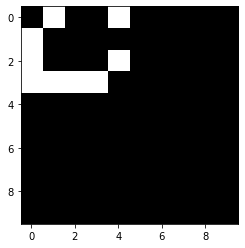

In [56]:
plt.imshow(world4, cmap='gray');

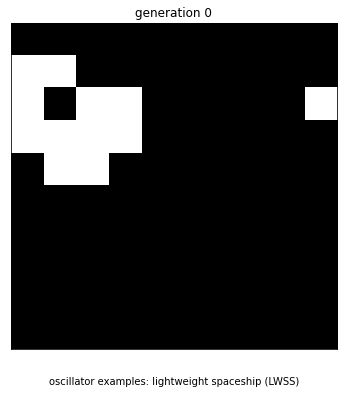

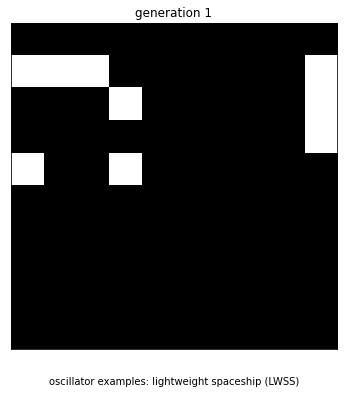

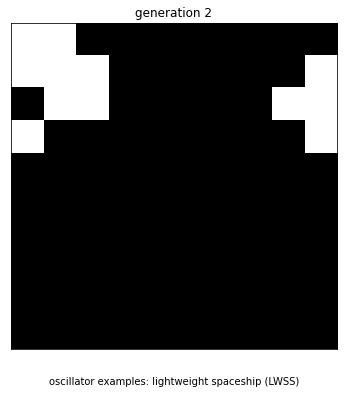

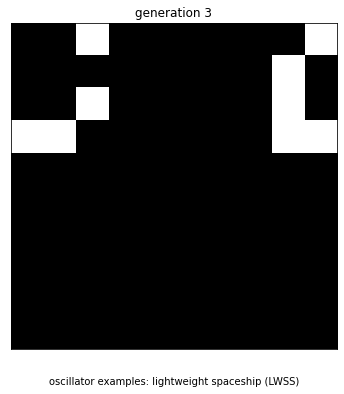

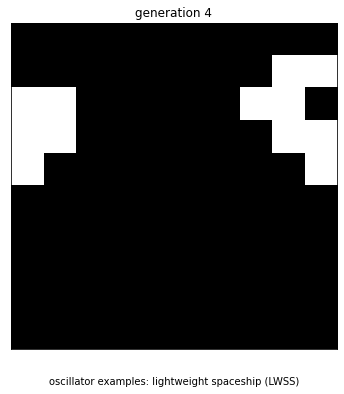

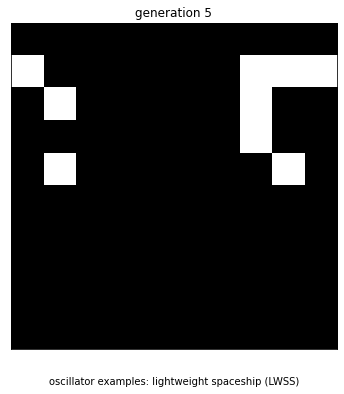

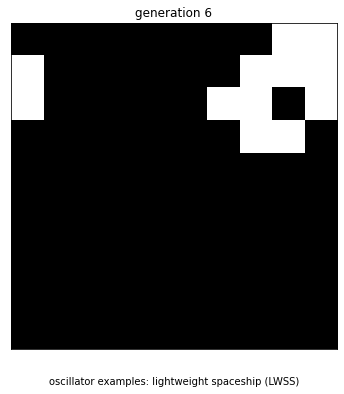

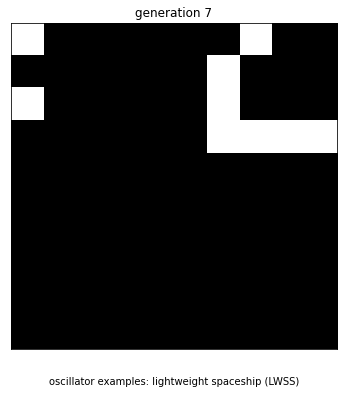

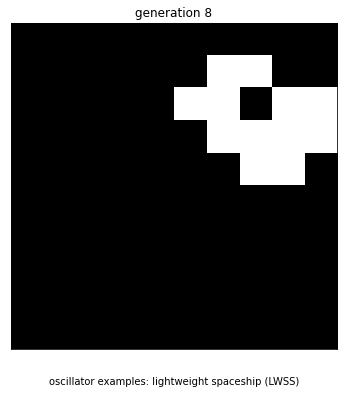

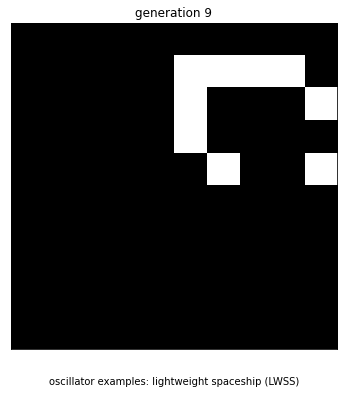

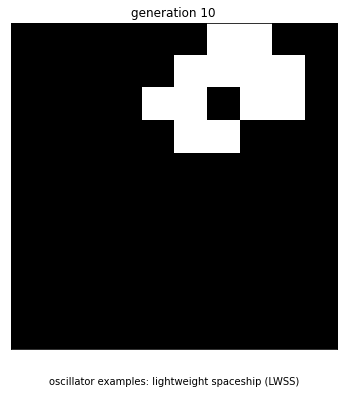

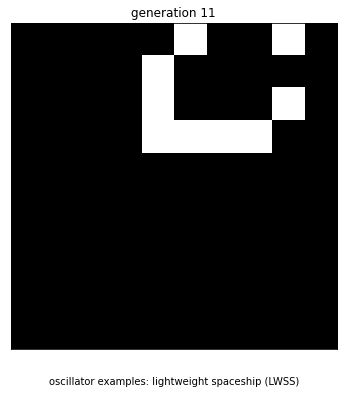

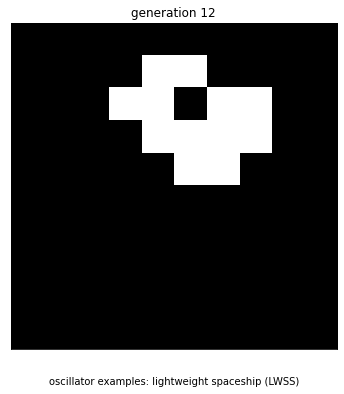

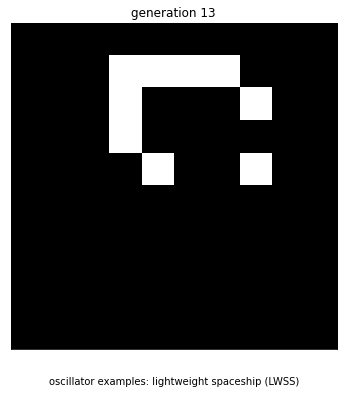

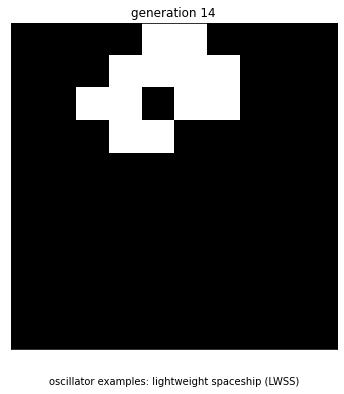

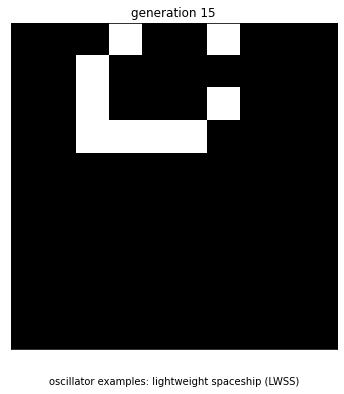

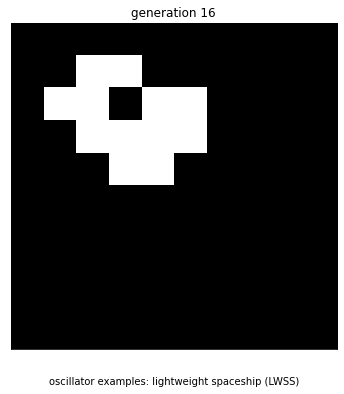

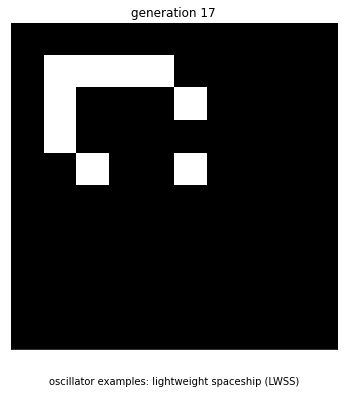

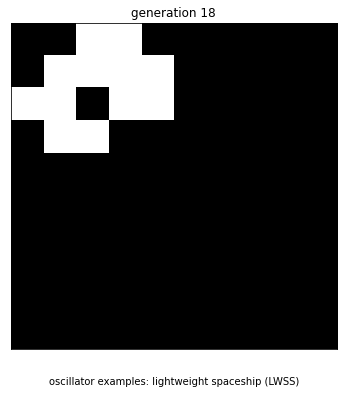

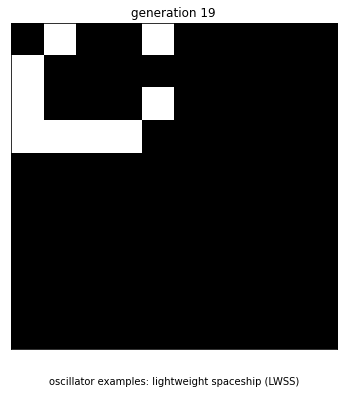

In [74]:
t = 20
new_generation = next_generation_p(world4)
for _ in range(t):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(new_generation, cmap='gray')
    plt.title(f'generation {_}')
    plt.xticks([])
    plt.yticks([])
    caption_text = "oscillator examples: lightweight spaceship (LWSS)"
    plt.text(0.5, -0.1, caption_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)
    plt.savefig(f'/Users/Mahyar/Desktop/conway/6/{_}.png', dpi=100)  # save to folder 6
    plt.show()
    new_generation = next_generation_p(new_generation)

In [95]:
#MWSS
world5 = np.array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                   [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
                   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
                   [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  ])

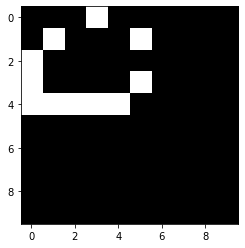

In [96]:
plt.imshow(world5, cmap='gray');

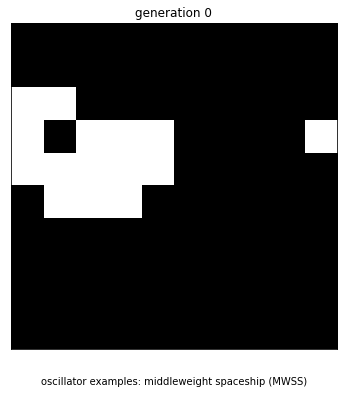

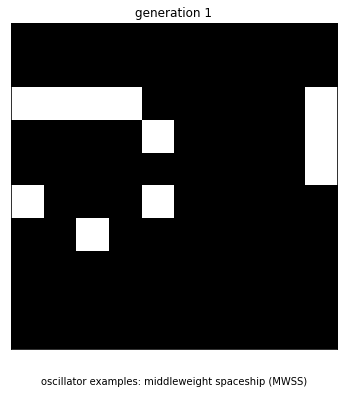

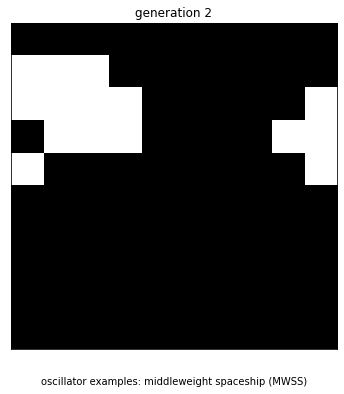

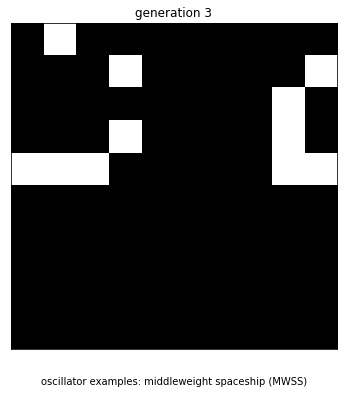

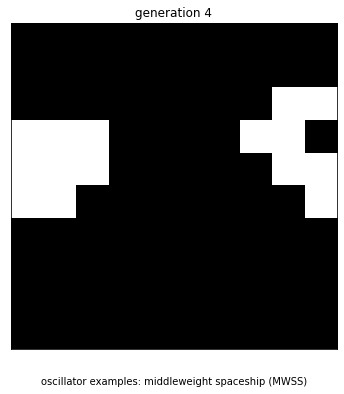

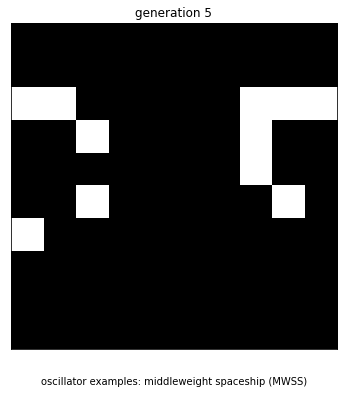

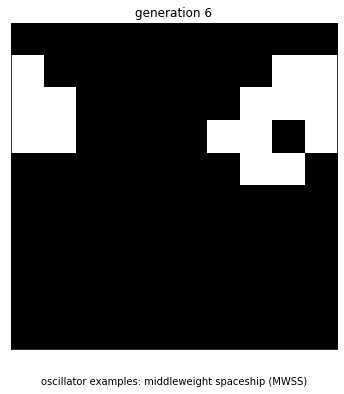

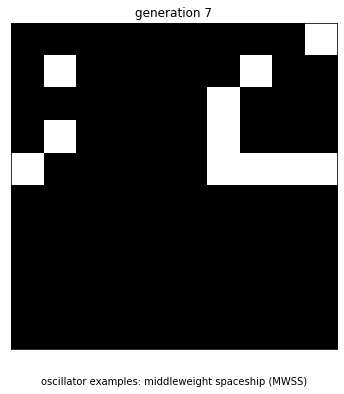

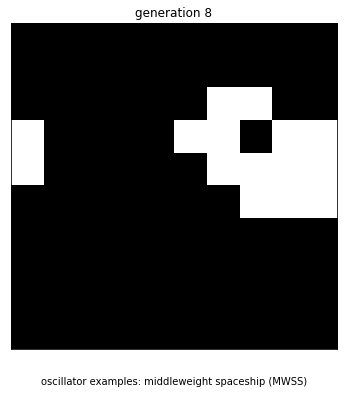

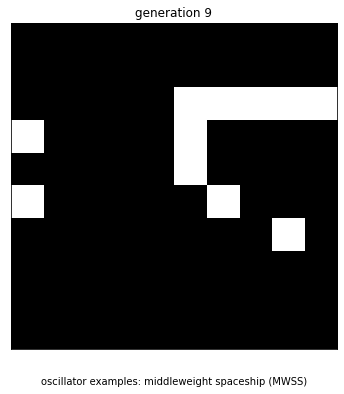

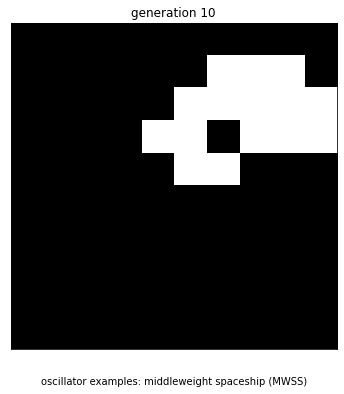

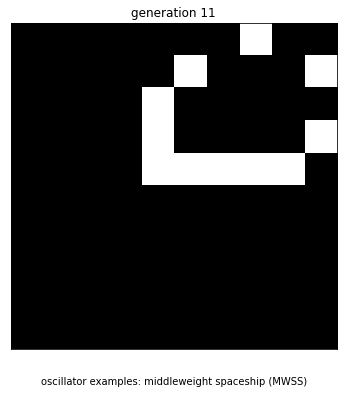

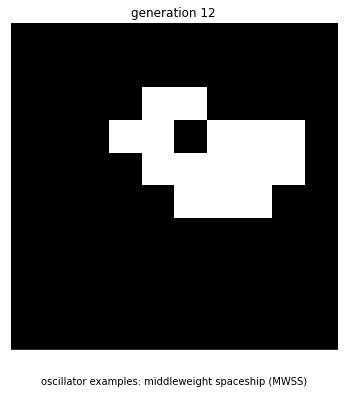

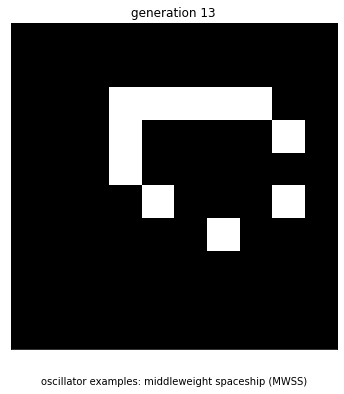

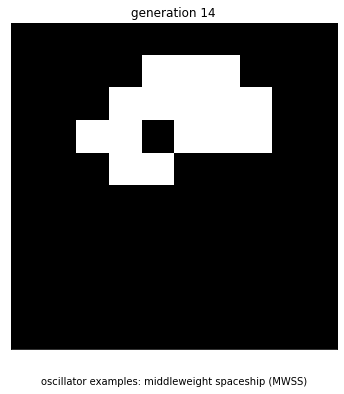

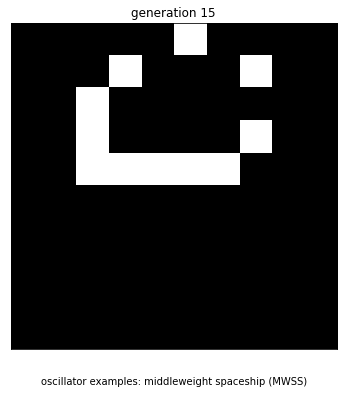

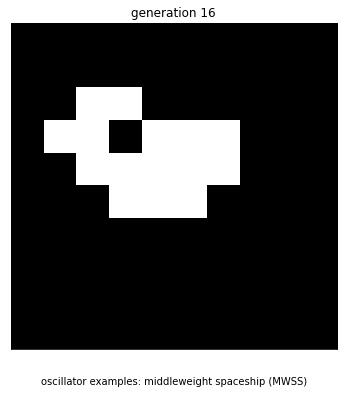

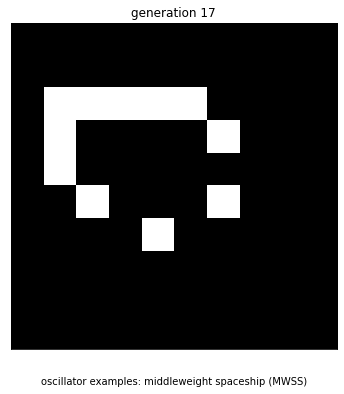

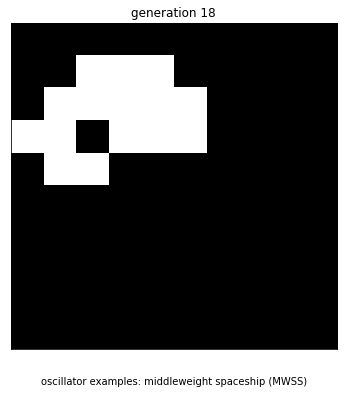

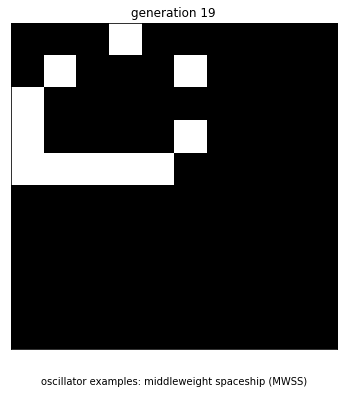

In [97]:
t = 20
new_generation = next_generation_p(world5)
for _ in range(t):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(new_generation, cmap='gray')
    plt.title(f'generation {_}')
    plt.xticks([])
    plt.yticks([])
    caption_text = "oscillator examples: middleweight spaceship (MWSS)"
    plt.text(0.5, -0.1, caption_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)
    plt.savefig(f'/Users/Mahyar/Desktop/conway/7/{_}.png', dpi=100)  # save to folder 7
    plt.show()
    new_generation = next_generation_p(new_generation)

# Infinite Growth: Gosper Glider Gun

In [61]:
text = """
........................X...........................................................................
......................X.X...........................................................................
............XX......XX............XX................................................................
...........X...X....XX............XX................................................................
XX........X.....X...XX..............................................................................
XX........X...X.XX....X.X...........................................................................
..........X.....X.......X...........................................................................
...........X...X....................................................................................
............XX......................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
"""

# Split the text into lines and create a NumPy array
array_lines = [list(line.strip()) for line in text.strip().split('\n')]
gosper_glider_gun = np.array([[1 if char == 'X' else 0 for char in line] for line in array_lines])

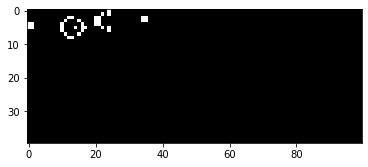

In [62]:
plt.imshow(gosper_glider_gun, cmap='gray');

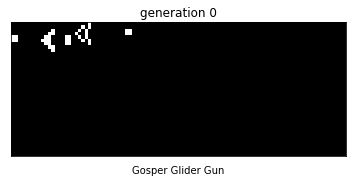

total population: 39


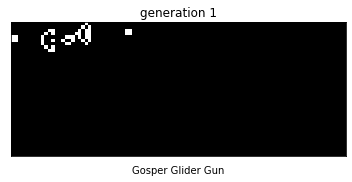

total population: 43


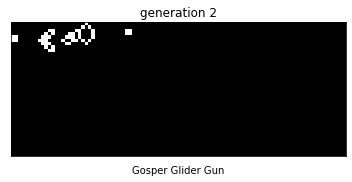

total population: 48


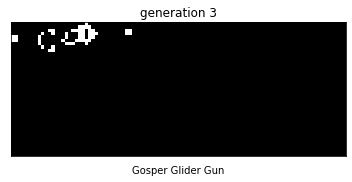

total population: 51


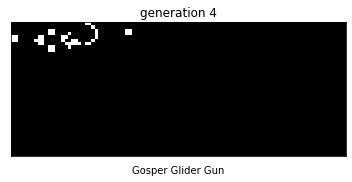

total population: 44


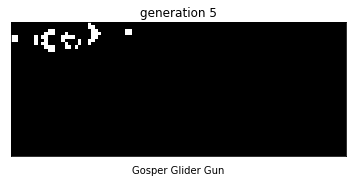

total population: 51


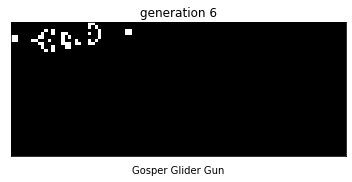

total population: 48


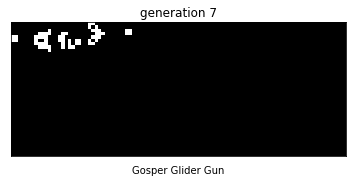

total population: 61


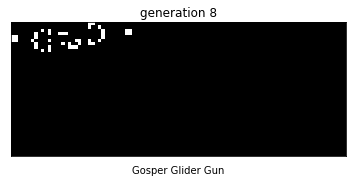

total population: 42


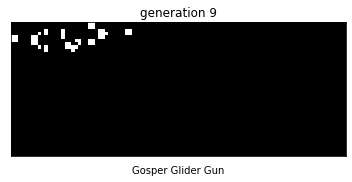

total population: 48


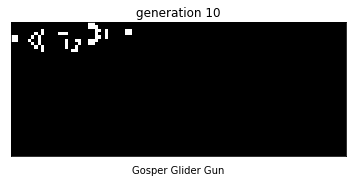

total population: 50


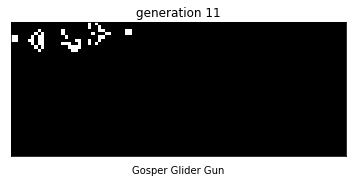

total population: 54


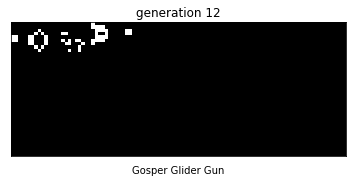

total population: 55


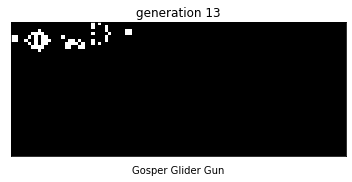

total population: 56


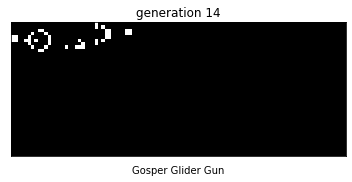

total population: 42


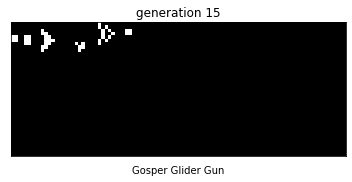

total population: 44


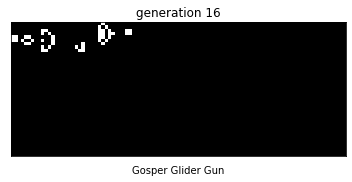

total population: 47


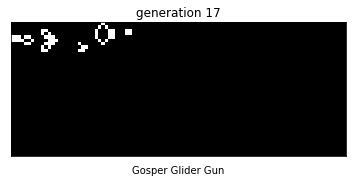

total population: 53


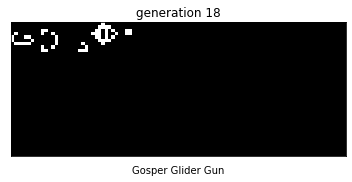

total population: 54


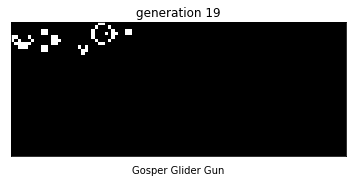

total population: 54


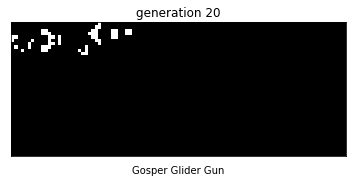

total population: 54


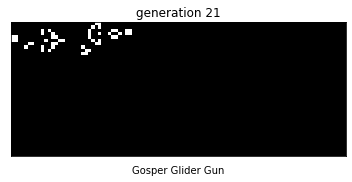

total population: 49


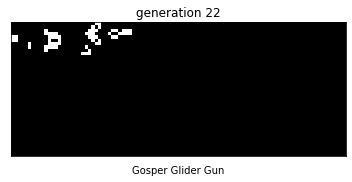

total population: 60


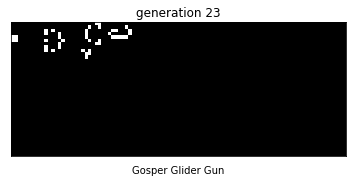

total population: 43


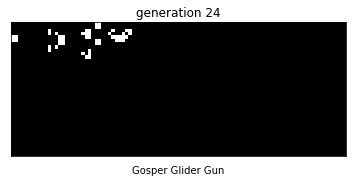

total population: 50


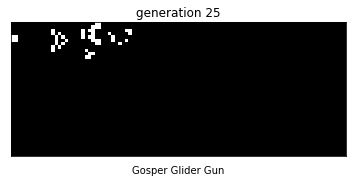

total population: 47


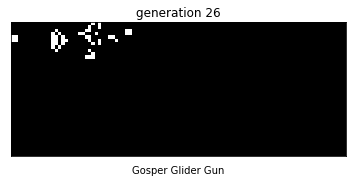

total population: 47


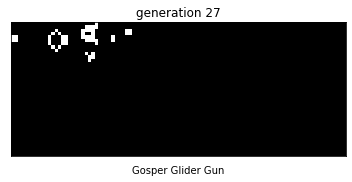

total population: 50


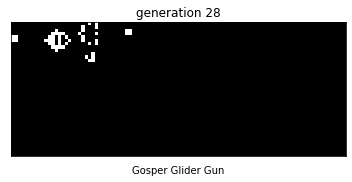

total population: 48


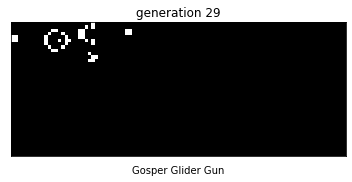

total population: 41


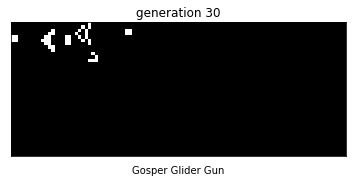

total population: 44


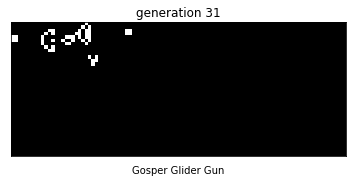

total population: 48


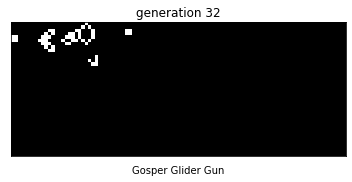

total population: 53


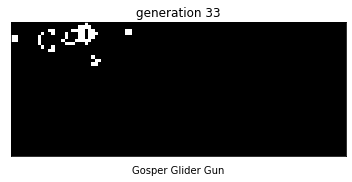

total population: 56


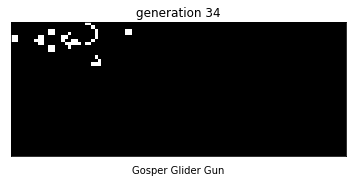

total population: 49


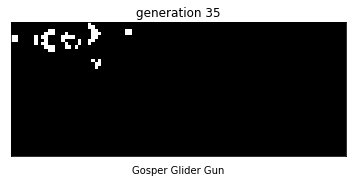

total population: 56


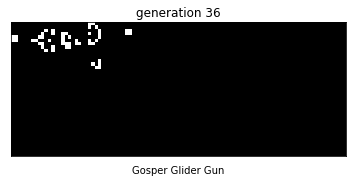

total population: 53


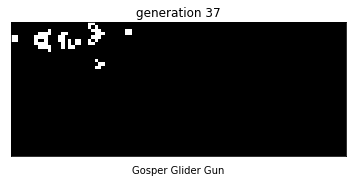

total population: 66


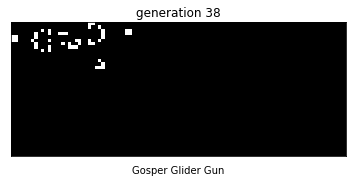

total population: 47


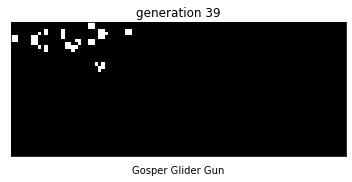

total population: 53


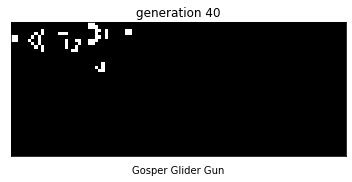

total population: 55


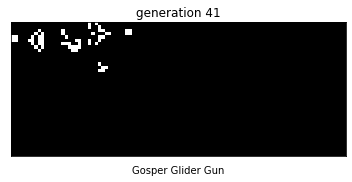

total population: 59


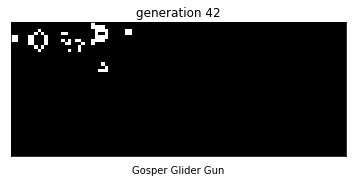

total population: 60


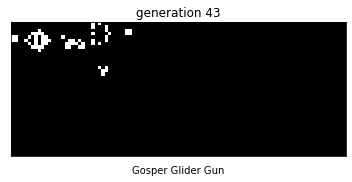

total population: 61


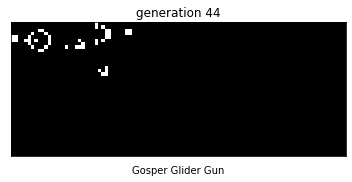

total population: 47


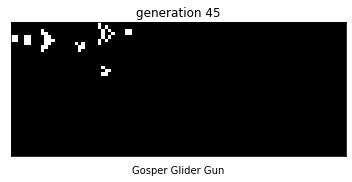

total population: 49


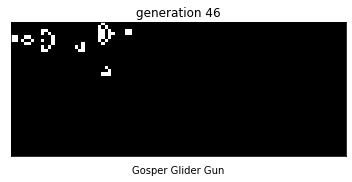

total population: 52


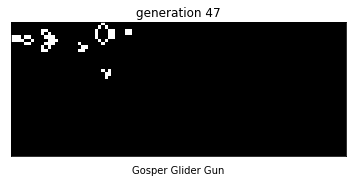

total population: 58


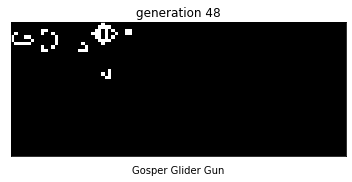

total population: 59


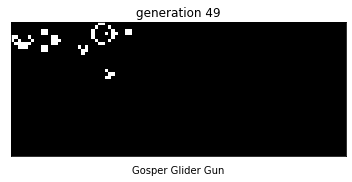

total population: 59


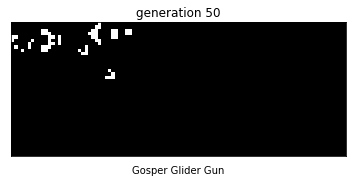

total population: 59


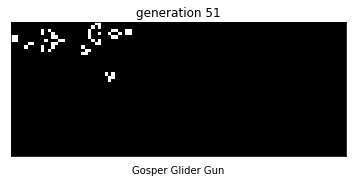

total population: 54


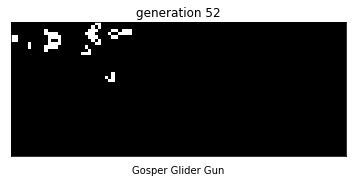

total population: 65


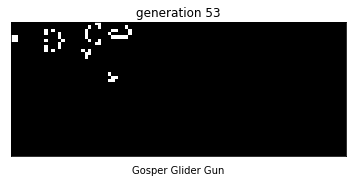

total population: 48


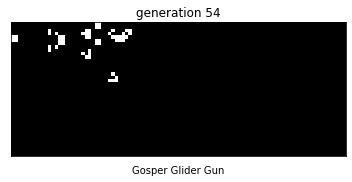

total population: 55


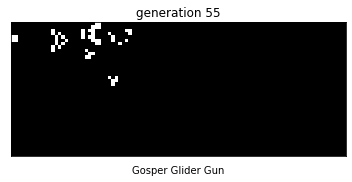

total population: 52


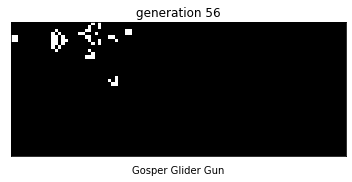

total population: 52


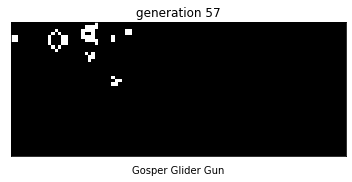

total population: 55


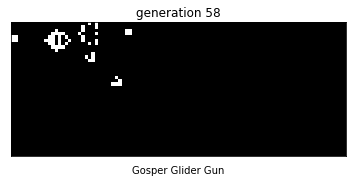

total population: 53


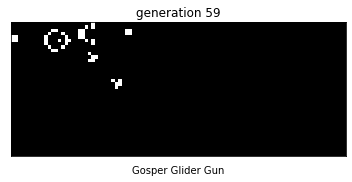

total population: 46


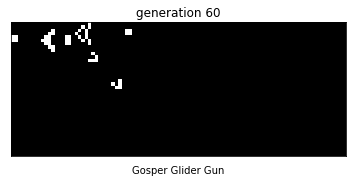

total population: 49


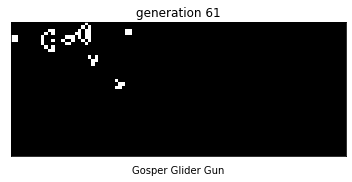

total population: 53


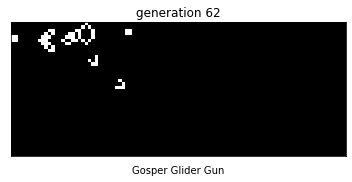

total population: 58


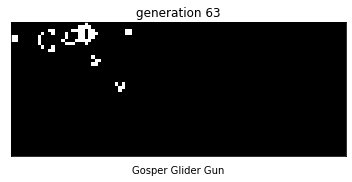

total population: 61


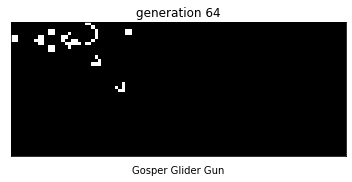

total population: 54


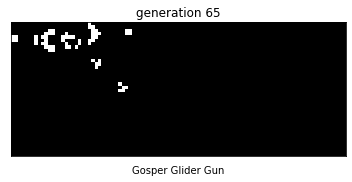

total population: 61


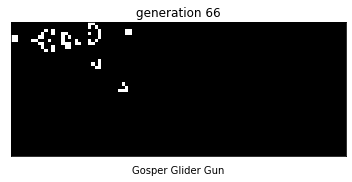

total population: 58


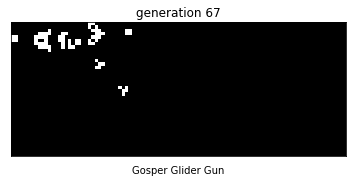

total population: 71


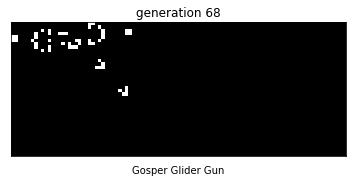

total population: 52


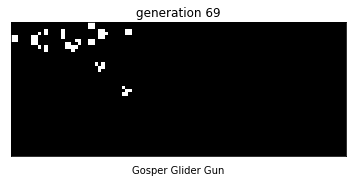

total population: 58


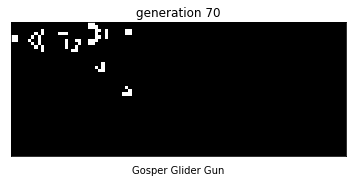

total population: 60


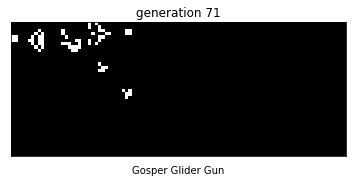

total population: 64


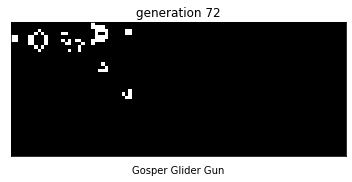

total population: 65


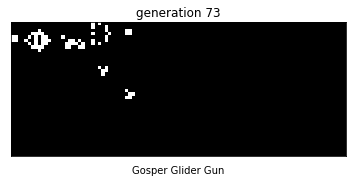

total population: 66


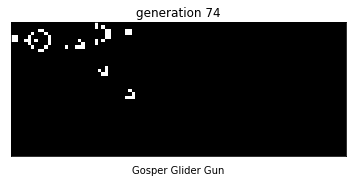

total population: 52


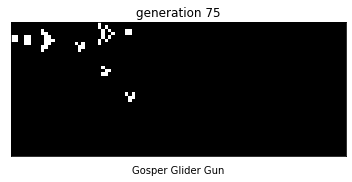

total population: 54


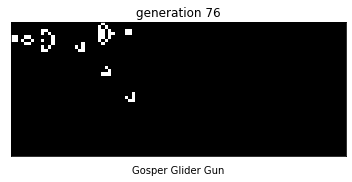

total population: 57


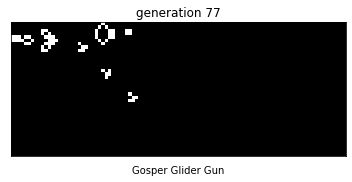

total population: 63


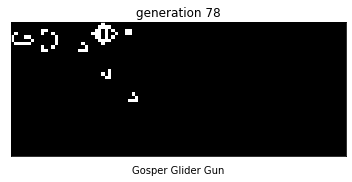

total population: 64


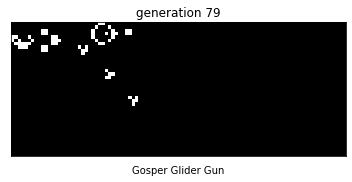

total population: 64


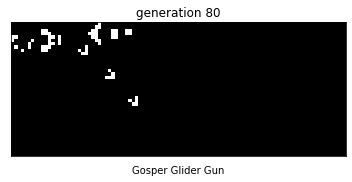

total population: 64


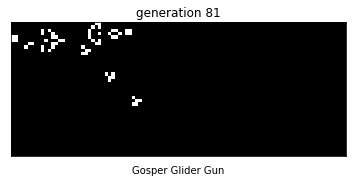

total population: 59


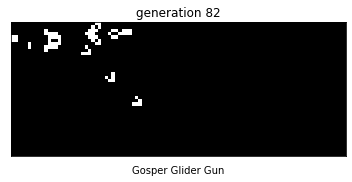

total population: 70


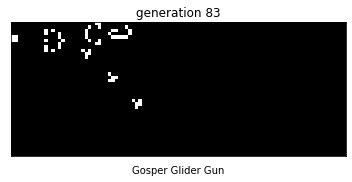

total population: 53


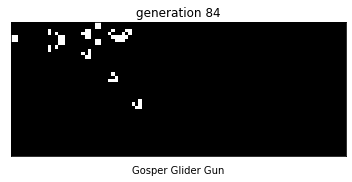

total population: 60


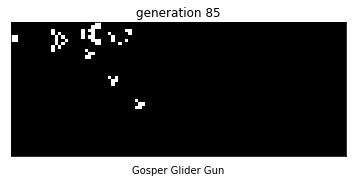

total population: 57


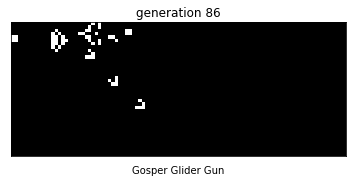

total population: 57


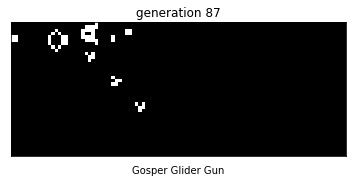

total population: 60


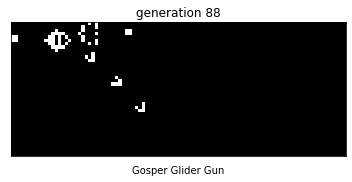

total population: 58


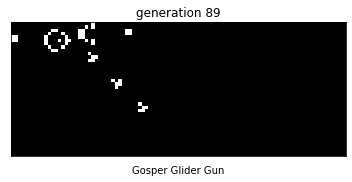

total population: 51


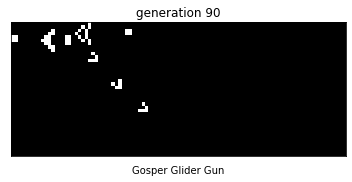

total population: 54


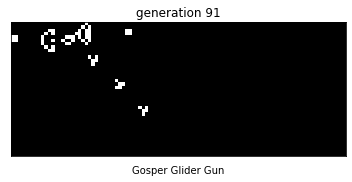

total population: 58


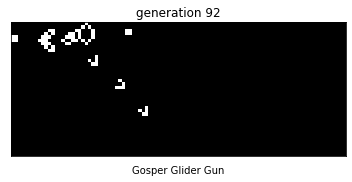

total population: 63


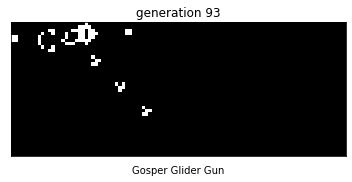

total population: 66


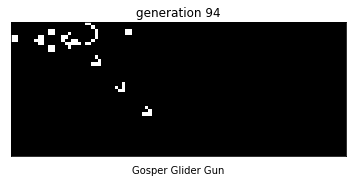

total population: 59


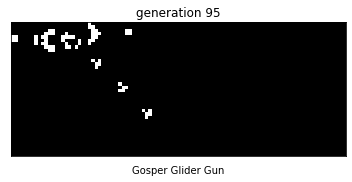

total population: 66


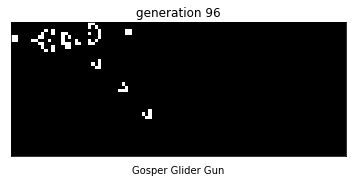

total population: 63


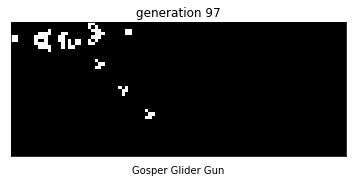

total population: 76


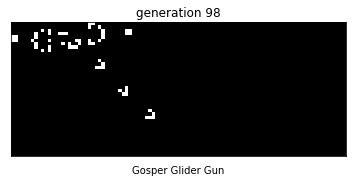

total population: 57


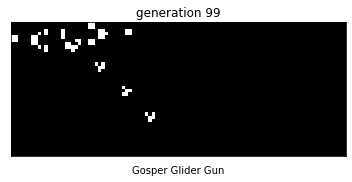

total population: 63


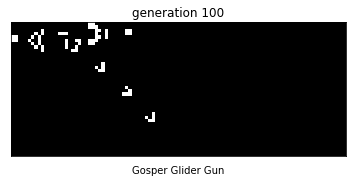

total population: 65


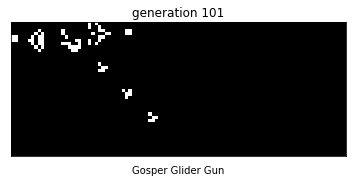

total population: 69


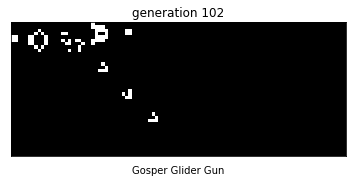

total population: 70


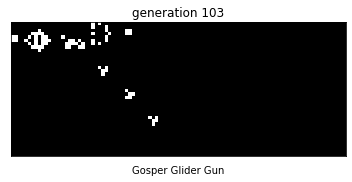

total population: 71


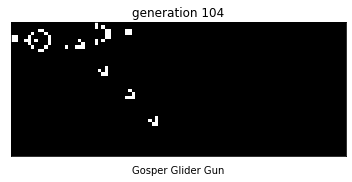

total population: 57


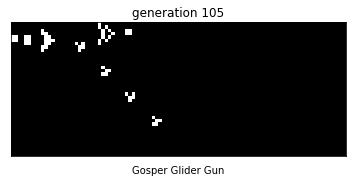

total population: 59


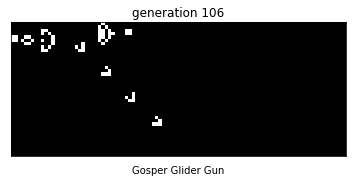

total population: 62


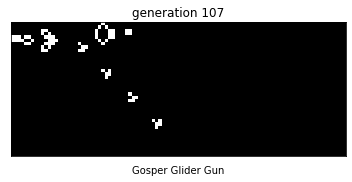

total population: 68


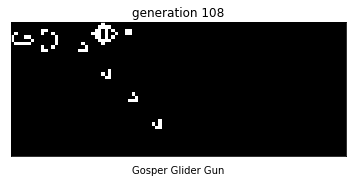

total population: 69


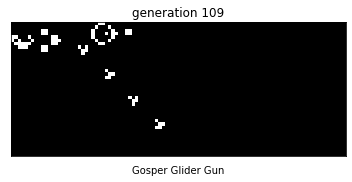

total population: 69


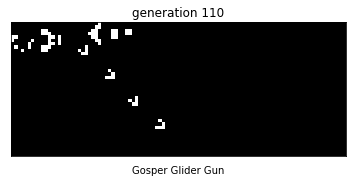

total population: 69


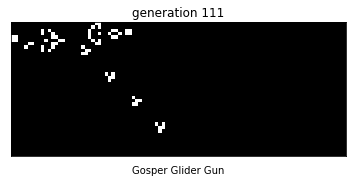

total population: 64


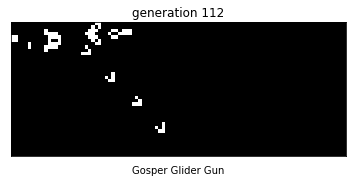

total population: 75


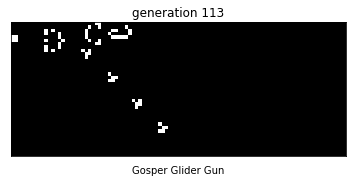

total population: 58


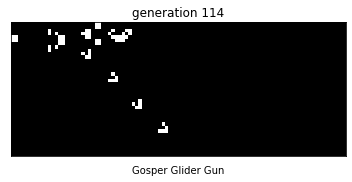

total population: 65


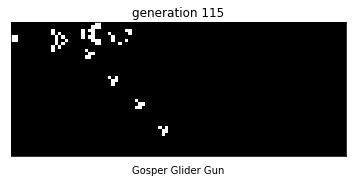

total population: 62


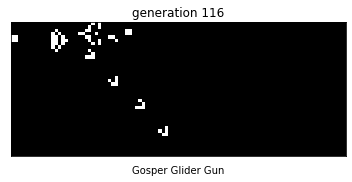

total population: 62


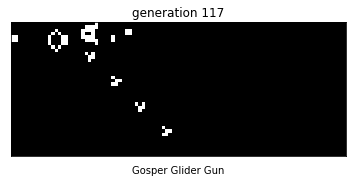

total population: 65


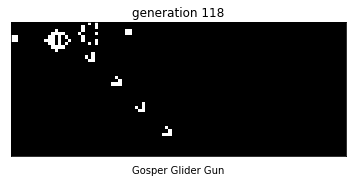

total population: 63


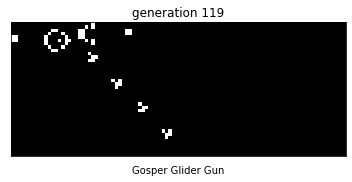

total population: 56


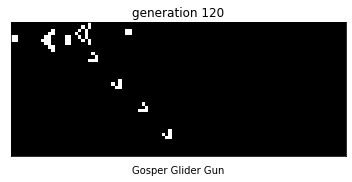

total population: 59


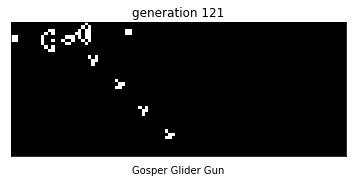

total population: 63


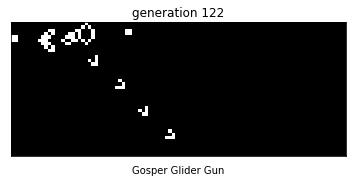

total population: 68


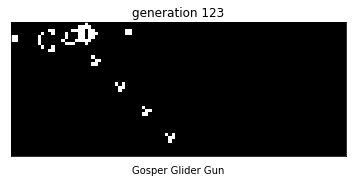

total population: 71


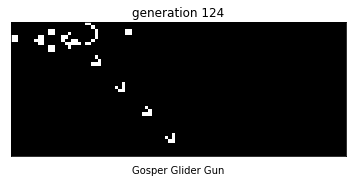

total population: 64


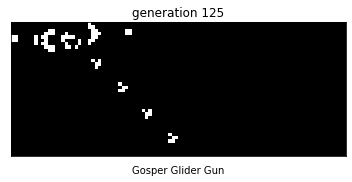

total population: 71


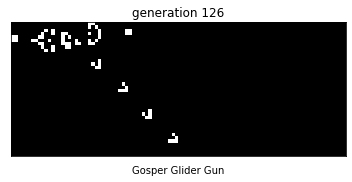

total population: 68


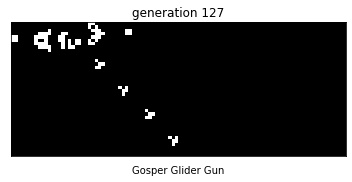

total population: 81


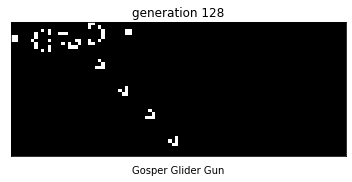

total population: 62


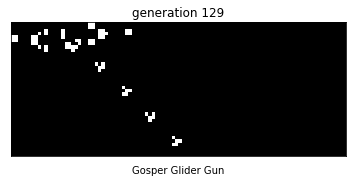

total population: 68


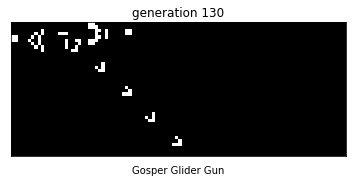

total population: 70


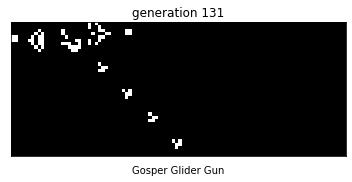

total population: 74


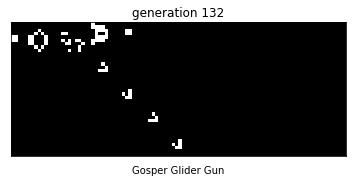

total population: 75


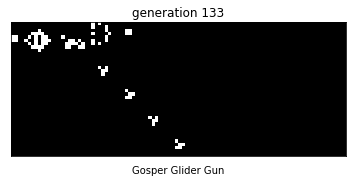

total population: 76


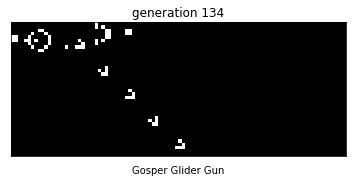

total population: 62


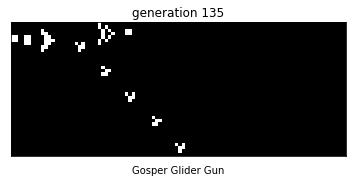

total population: 64


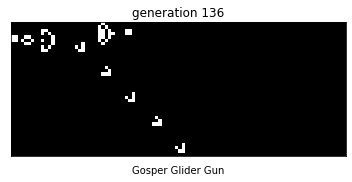

total population: 67


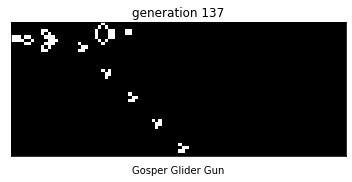

total population: 73


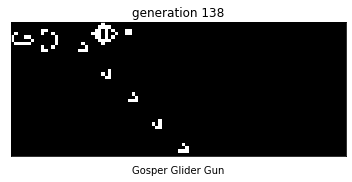

total population: 74


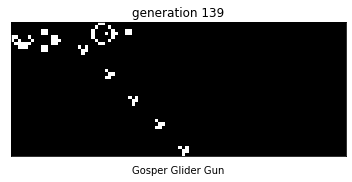

total population: 74


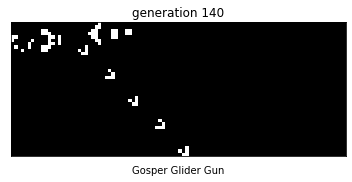

total population: 74


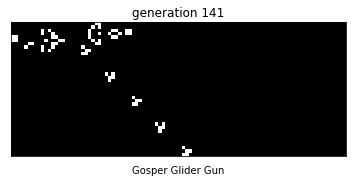

total population: 69


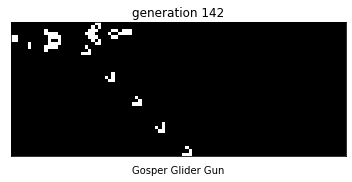

total population: 80


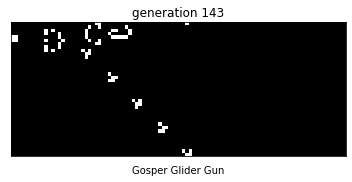

total population: 63


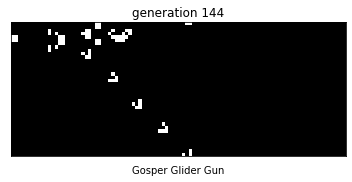

total population: 70


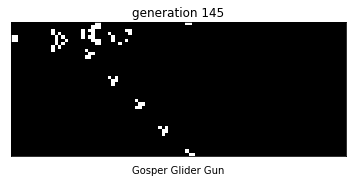

total population: 67


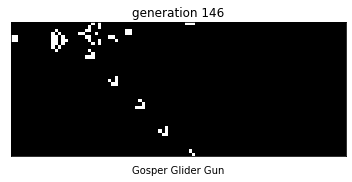

total population: 67


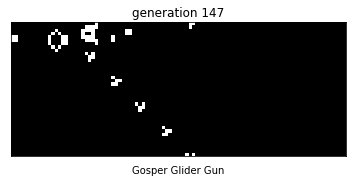

total population: 70


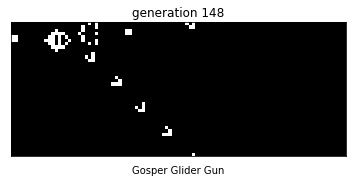

total population: 68


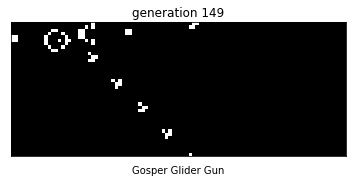

total population: 61


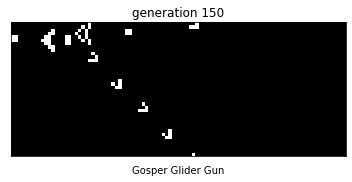

total population: 64


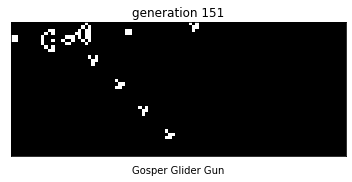

total population: 68


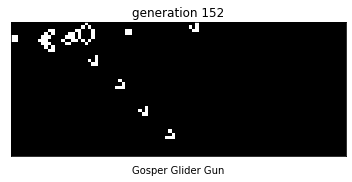

total population: 73


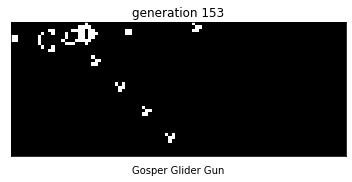

total population: 76


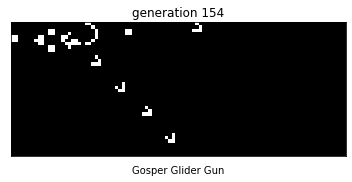

total population: 69


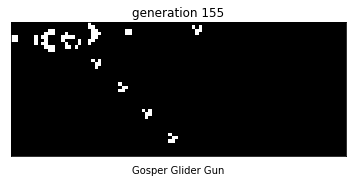

total population: 76


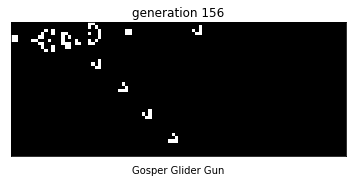

total population: 73


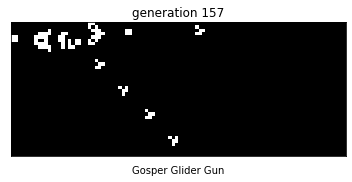

total population: 86


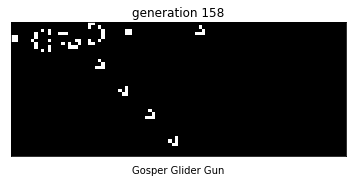

total population: 67


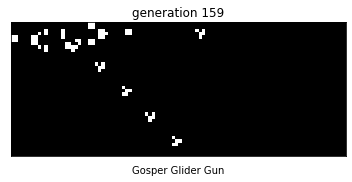

total population: 73


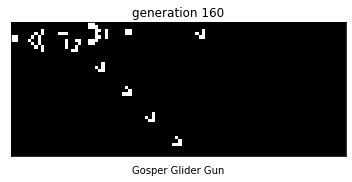

total population: 75


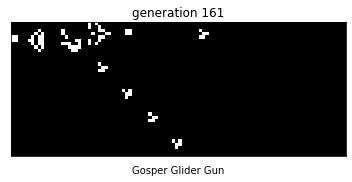

total population: 79


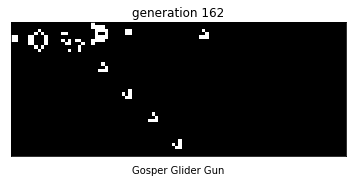

total population: 80


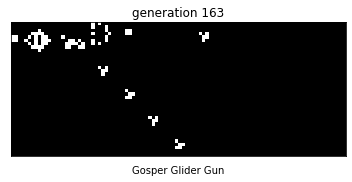

total population: 81


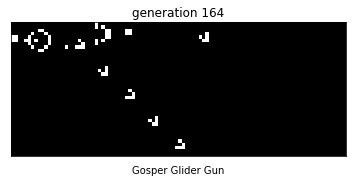

total population: 67


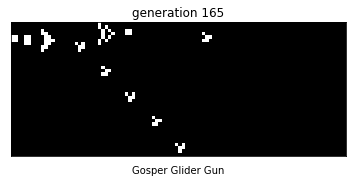

total population: 69


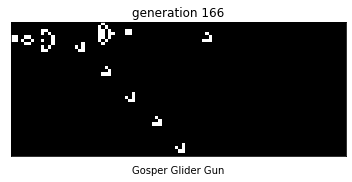

total population: 72


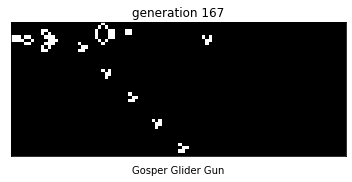

total population: 78


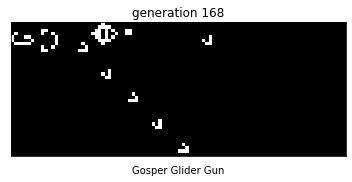

total population: 79


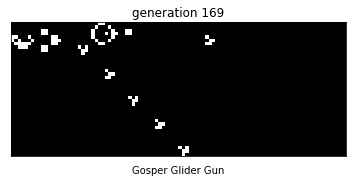

total population: 79


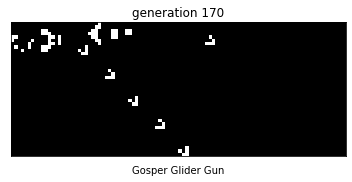

total population: 79


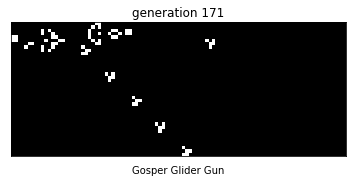

total population: 74


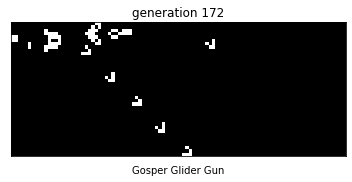

total population: 85


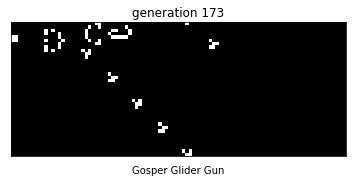

total population: 68


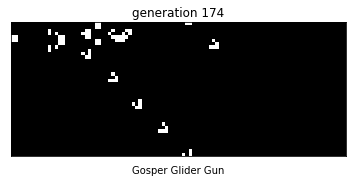

total population: 75


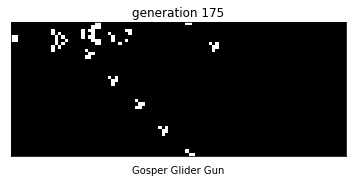

total population: 72


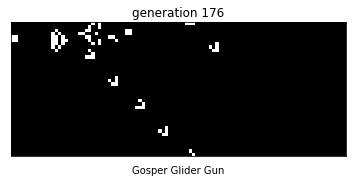

total population: 72


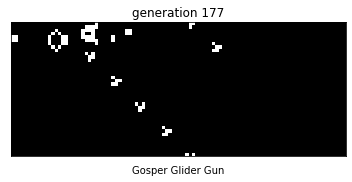

total population: 75


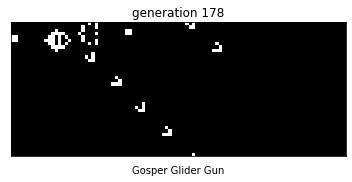

total population: 73


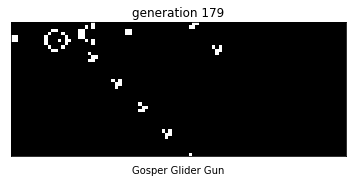

total population: 66


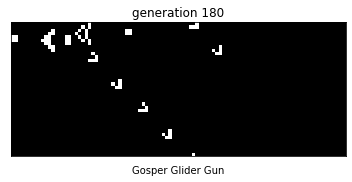

total population: 69


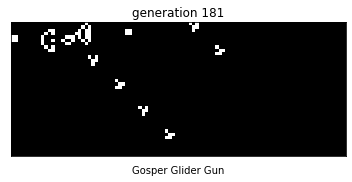

total population: 73


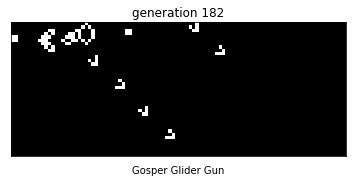

total population: 78


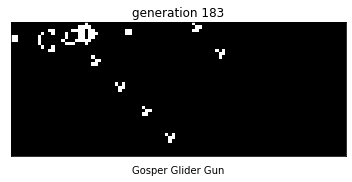

total population: 81


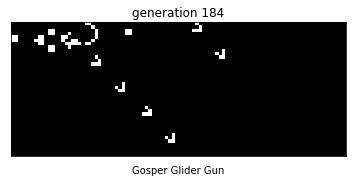

total population: 74


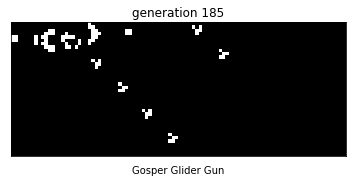

total population: 81


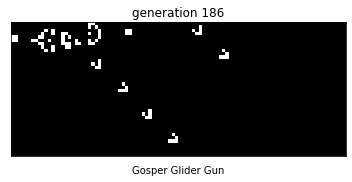

total population: 78


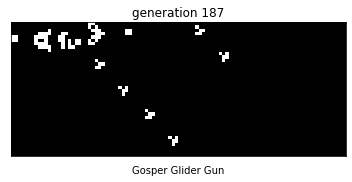

total population: 91


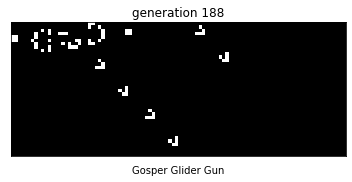

total population: 72


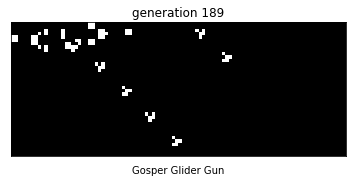

total population: 78


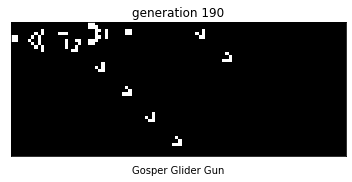

total population: 80


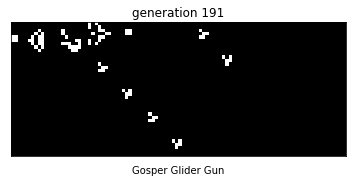

total population: 84


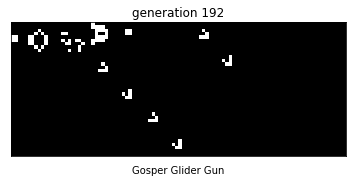

total population: 85


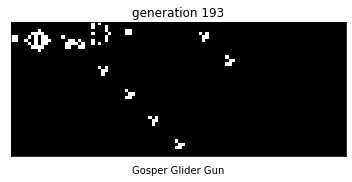

total population: 86


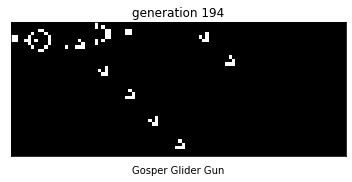

total population: 72


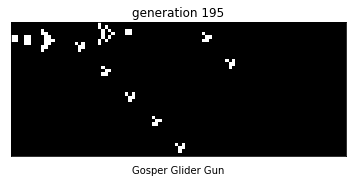

total population: 74


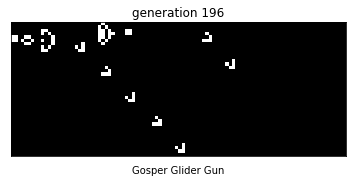

total population: 77


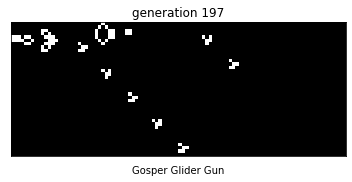

total population: 83


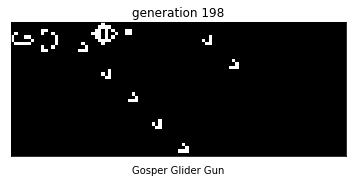

total population: 84


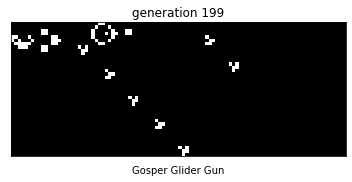

total population: 84


In [117]:
t = 200
new_generation = next_generation_p(gosper_glider_gun)
for _ in range(t):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(new_generation, cmap='gray')
    plt.title(f'generation {_}')
    plt.xticks([])
    plt.yticks([])
    caption_text = "Gosper Glider Gun"
    plt.text(0.5, -0.1, caption_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)
    plt.savefig(f'/Users/Mahyar/Desktop/conway/8/{_}.png', dpi=100)  # save to folder 8
    plt.show()
    population = np.sum(new_generation)
    print(f'total population: {population}')
    new_generation = next_generation_p(new_generation)

In [65]:
def random_next_generation(current_generation, p):
    rows, cols = len(current_generation), len(current_generation[0])

    # Create a new 2D list to store the next generation
    new_generation = [[0] * cols for _ in range(rows)]

    for i in range(rows):
        for j in range(cols):
            r = np.random.rand()
            # Count the number of alive neighbors for each cell
            neighbors_count = count_alive_neighbors_p(current_generation, i, j)

            # Apply Conway's rules to determine the next state of the cell
            if current_generation[i][j] == 1:
                # Cell is alive
                if neighbors_count == 2 or neighbors_count == 3:
                    new_generation[i][j] = 1  # Cell survives
            else:
                # Cell is dead
                if neighbors_count == 3:
                    new_generation[i][j] = 1  # Cell becomes alive
                if r > p:
                    new_generation[i][j] = 1  # there is chance for the cell to be born from nothing

    return new_generation

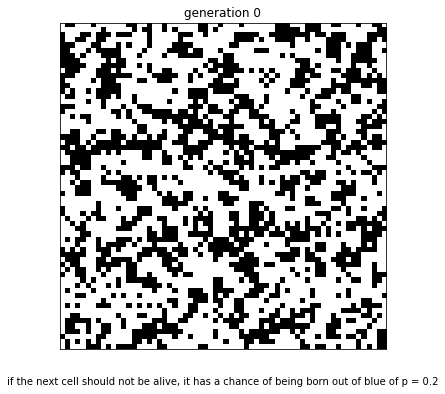

total population: 2505


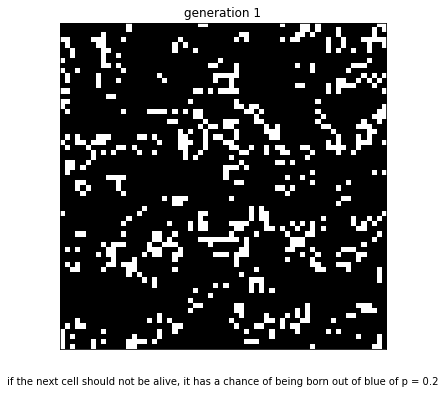

total population: 590


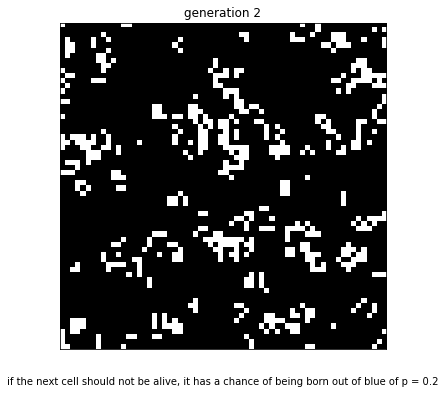

total population: 545


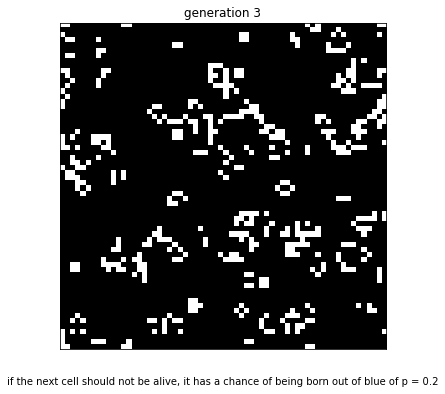

total population: 471


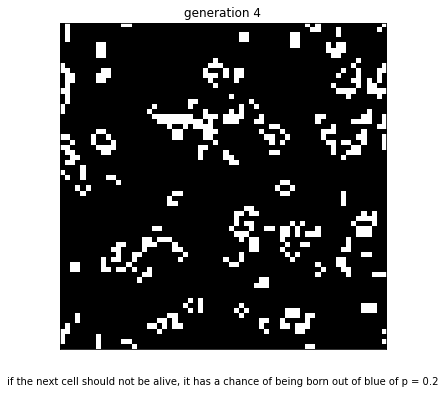

total population: 464


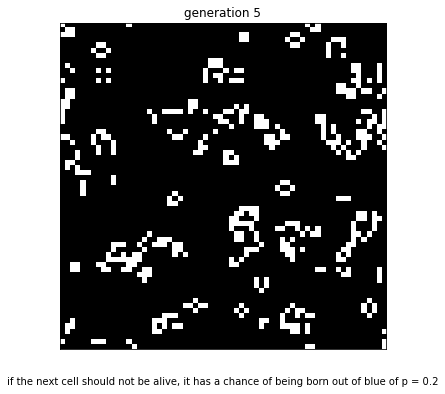

total population: 449


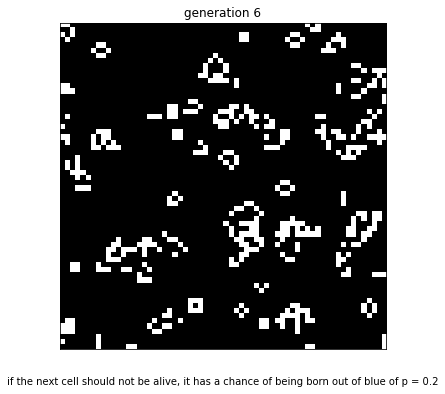

total population: 439


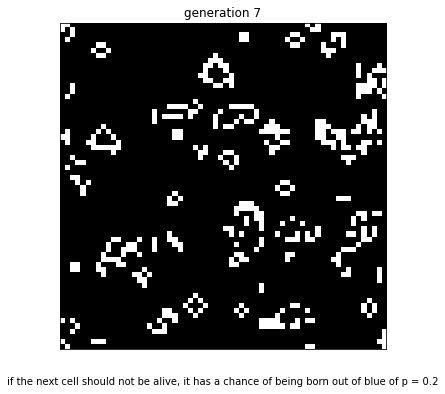

total population: 422


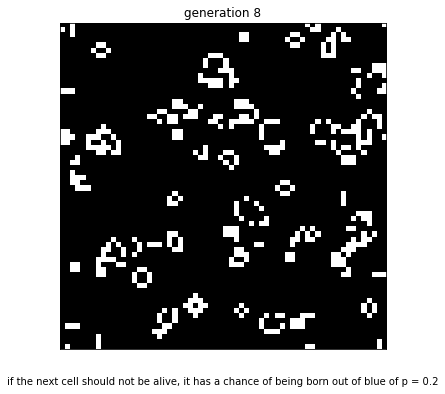

total population: 438


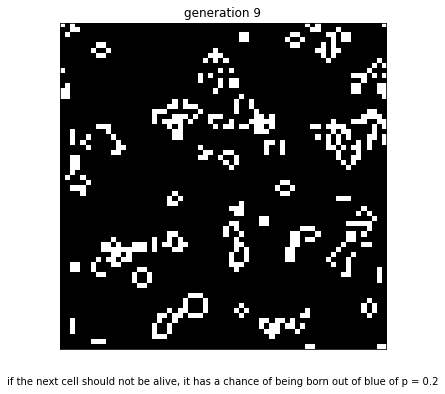

total population: 458


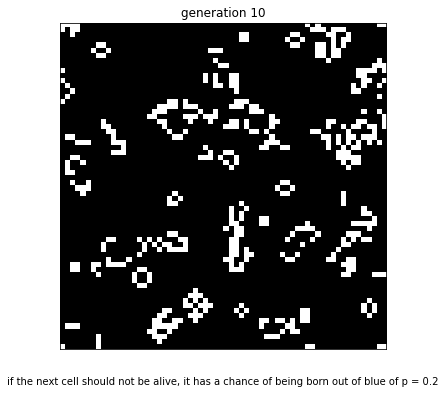

total population: 479


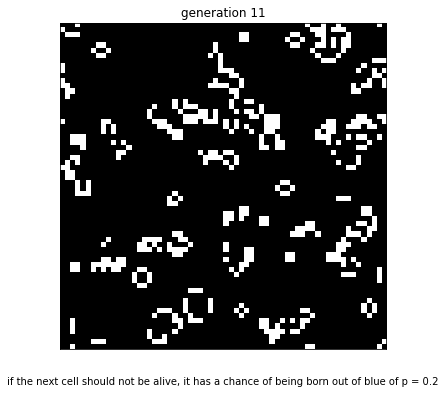

total population: 478


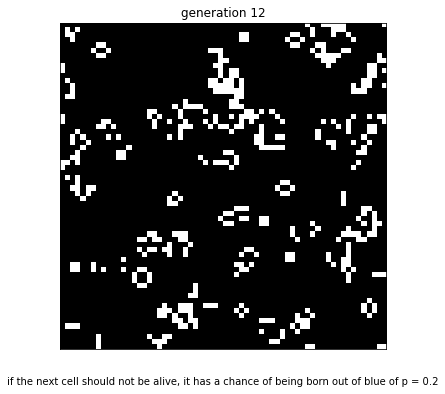

total population: 445


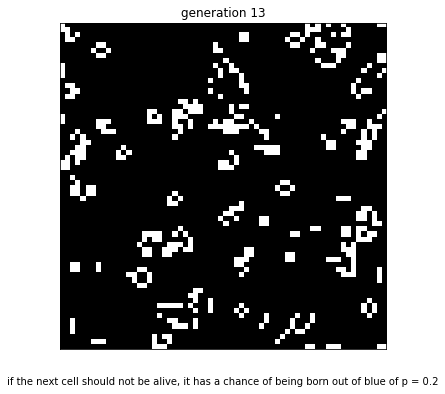

total population: 437


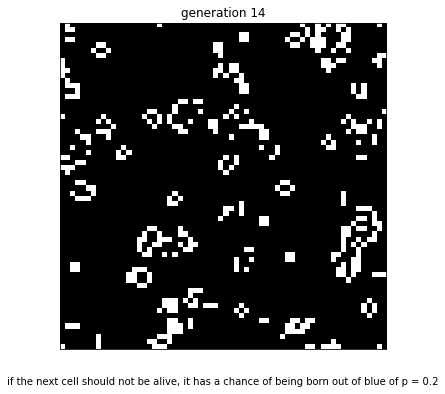

total population: 420


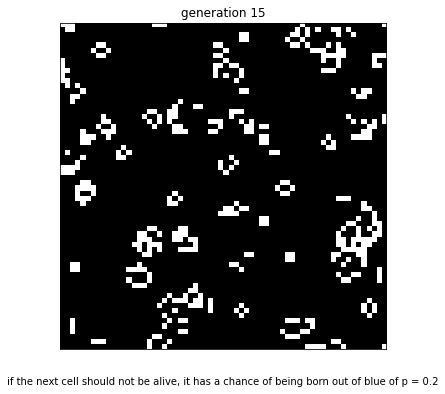

total population: 412


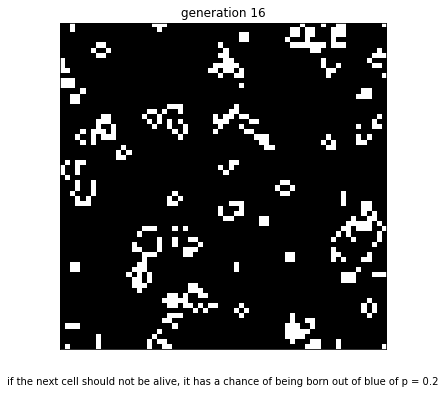

total population: 416


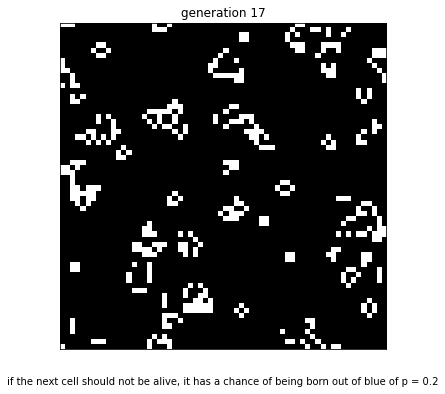

total population: 405


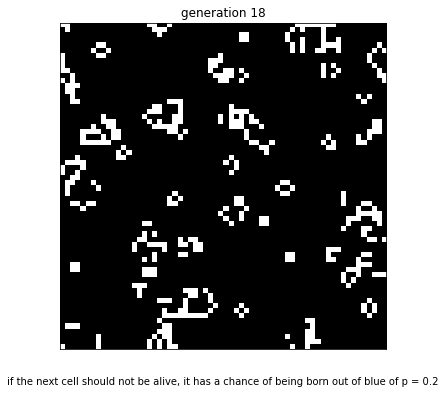

total population: 419


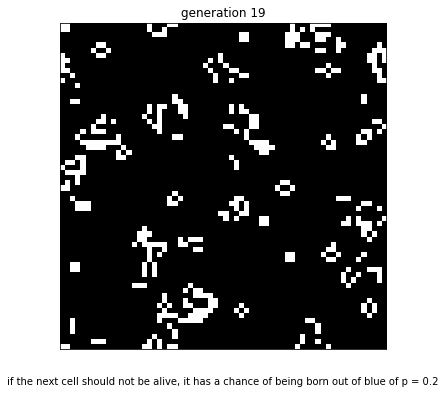

total population: 403


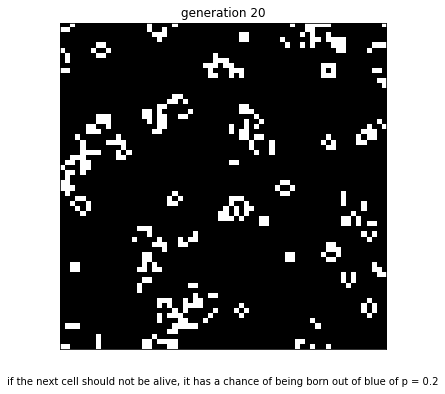

total population: 387


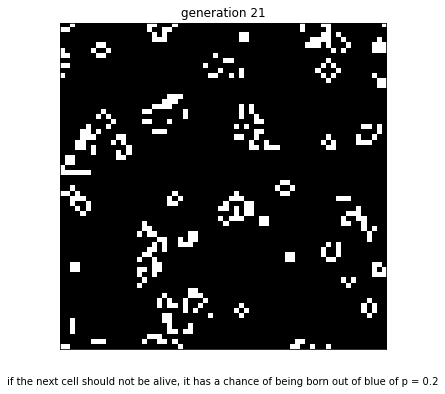

total population: 360


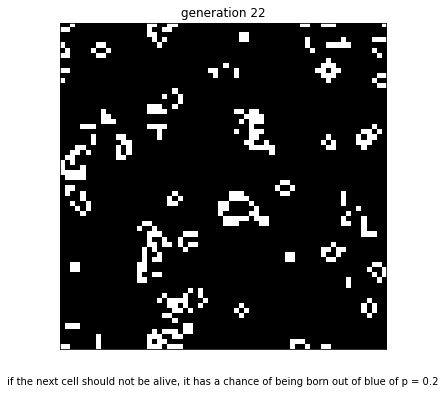

total population: 373


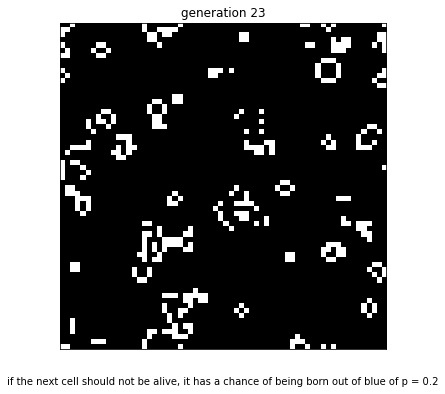

total population: 361


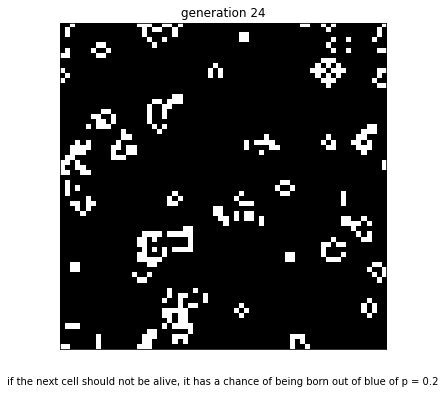

total population: 370


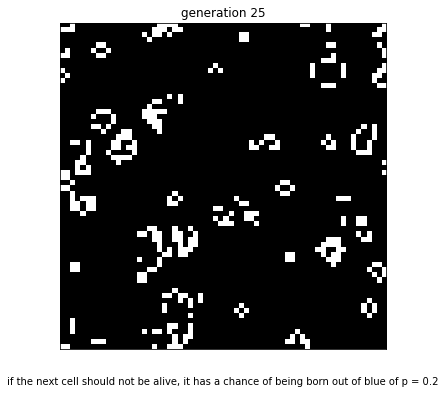

total population: 353


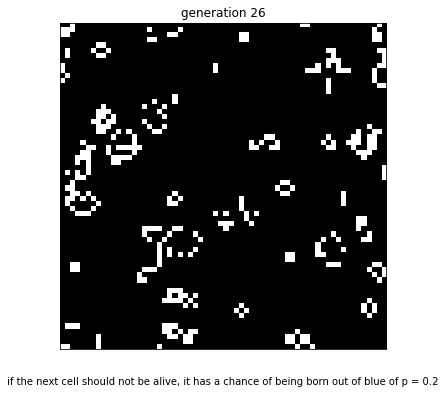

total population: 331


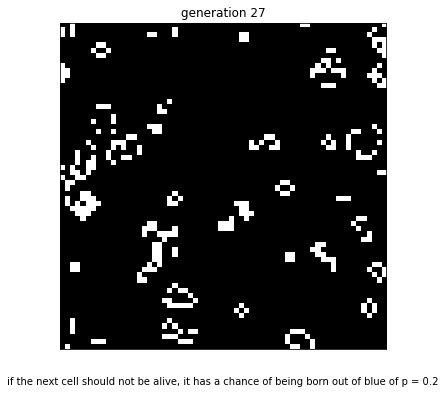

total population: 311


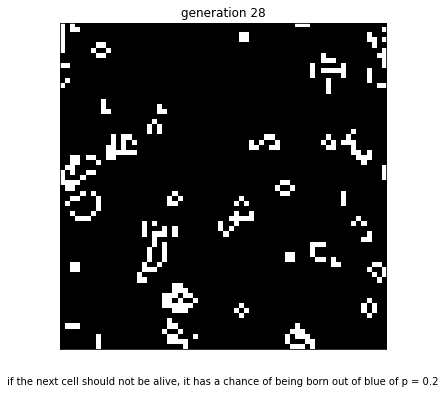

total population: 306


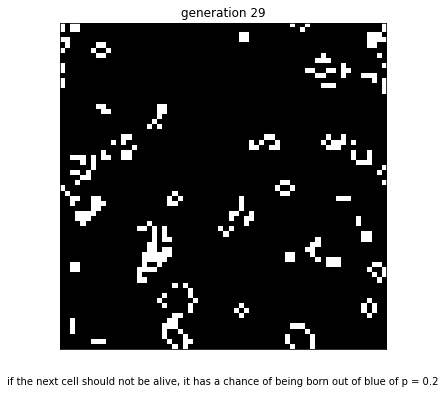

total population: 299


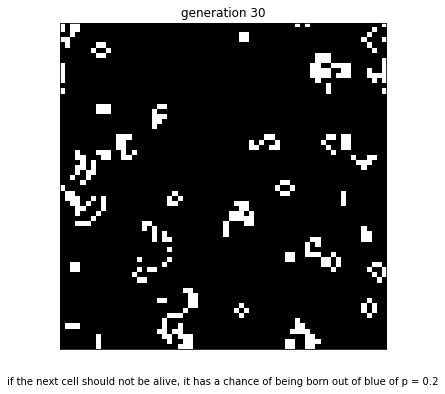

total population: 320


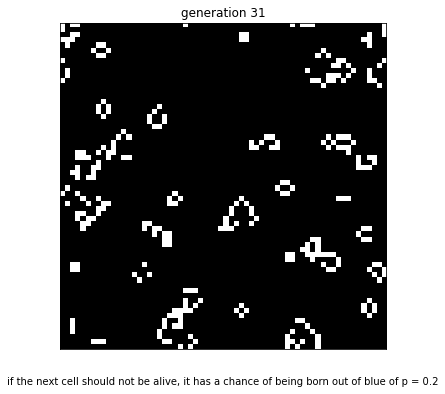

total population: 294


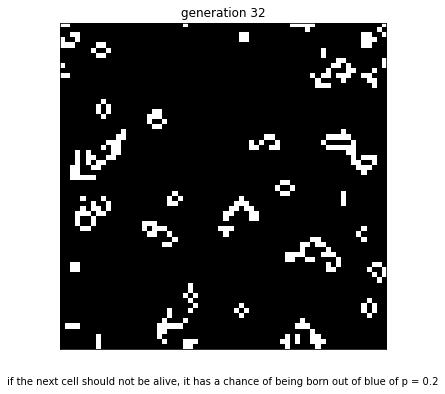

total population: 313


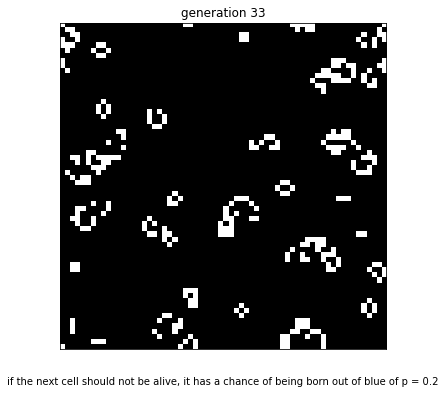

total population: 318


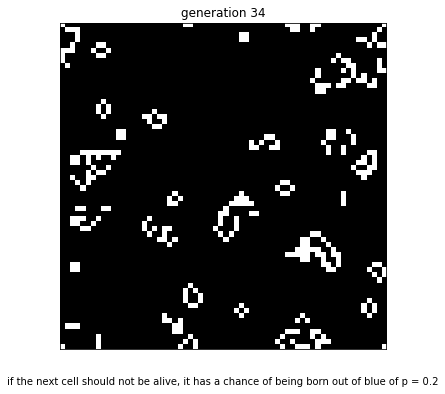

total population: 320


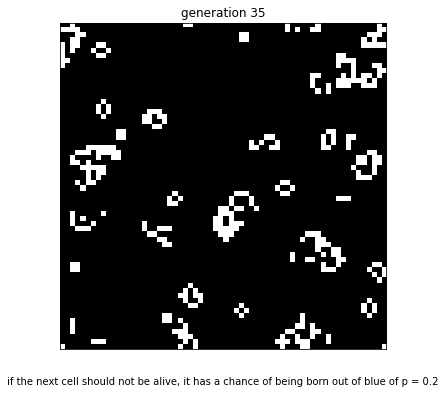

total population: 353


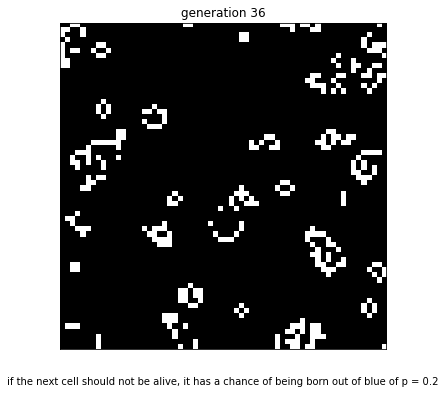

total population: 335


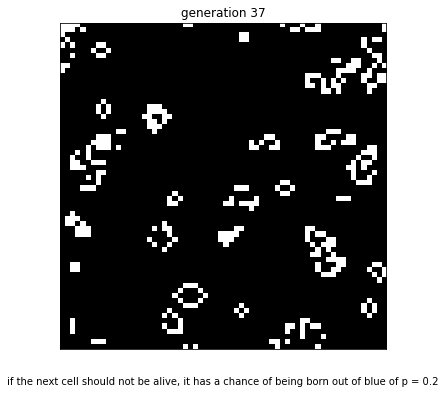

total population: 343


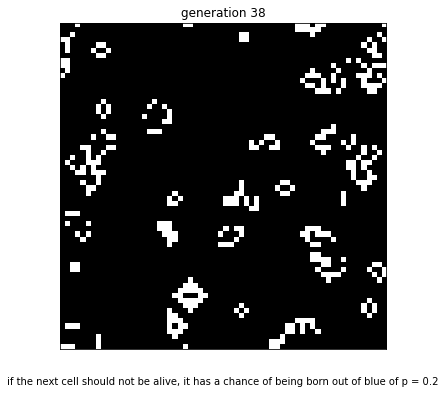

total population: 348


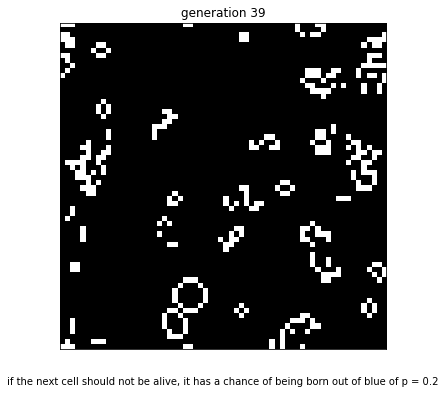

total population: 341


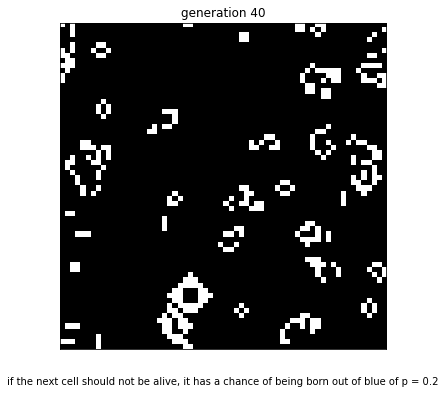

total population: 349


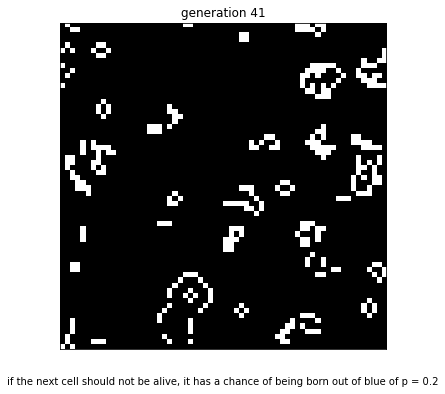

total population: 335


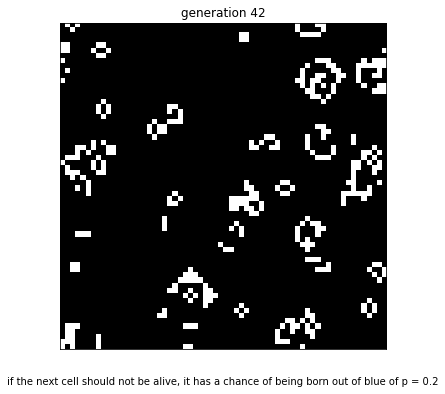

total population: 352


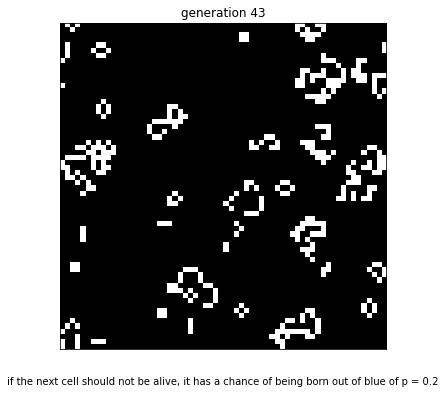

total population: 368


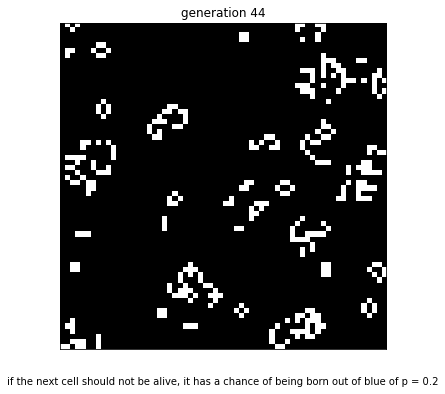

total population: 339


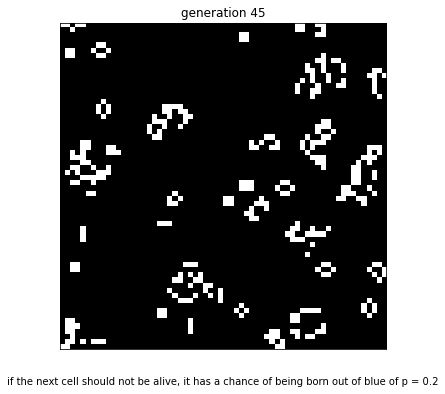

total population: 343


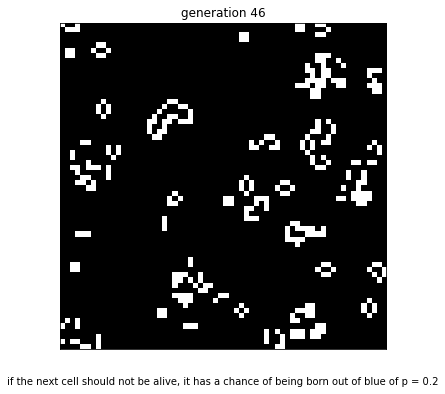

total population: 350


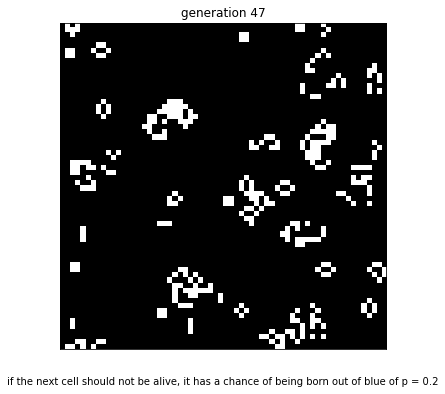

total population: 338


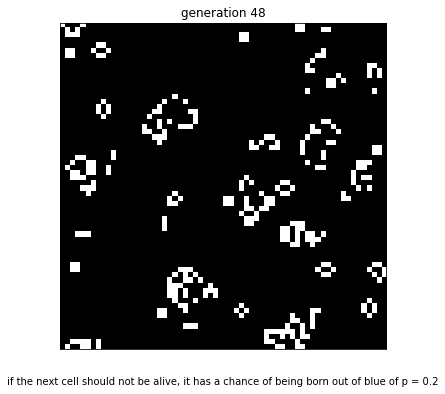

total population: 316


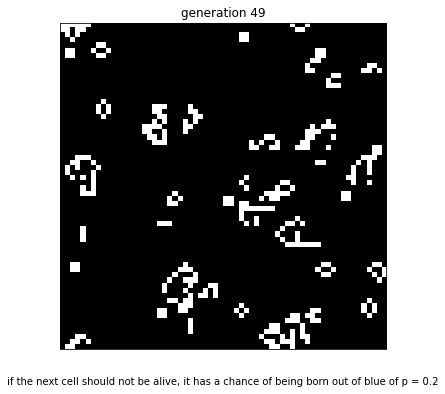

total population: 323


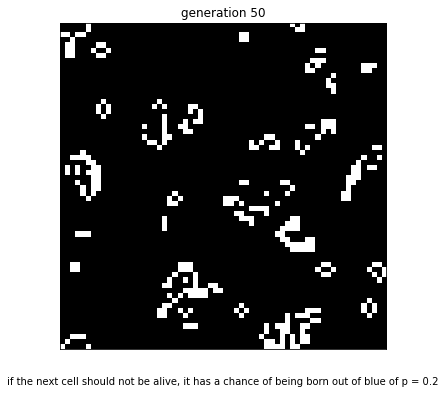

total population: 325


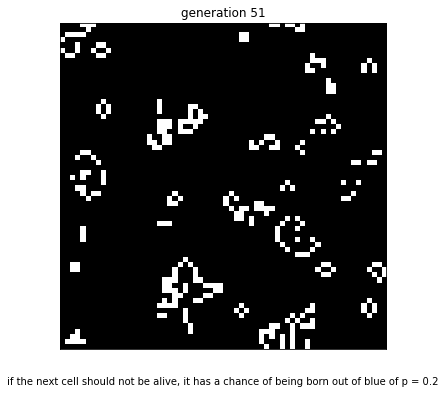

total population: 300


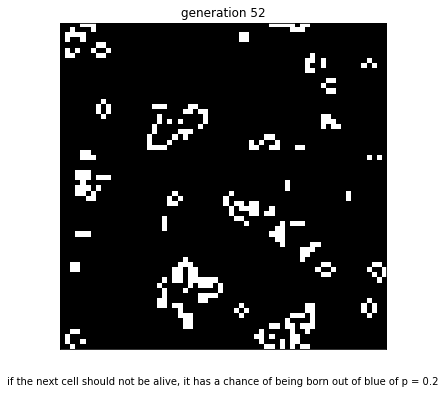

total population: 307


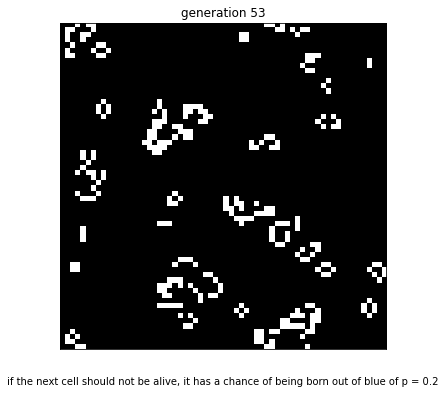

total population: 292


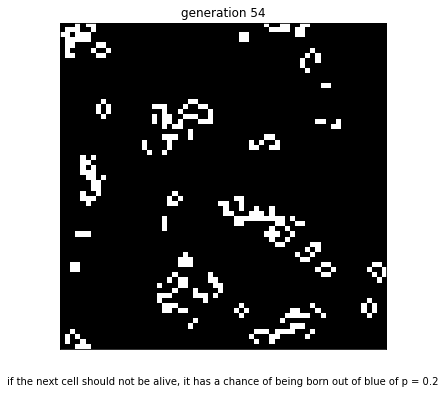

total population: 299


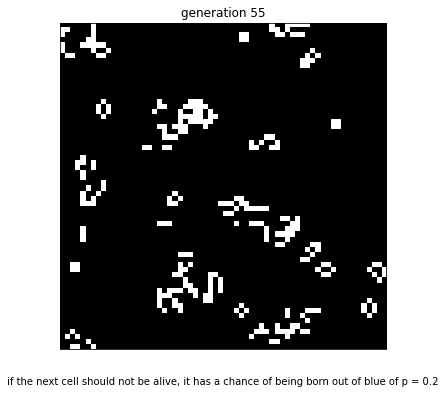

total population: 283


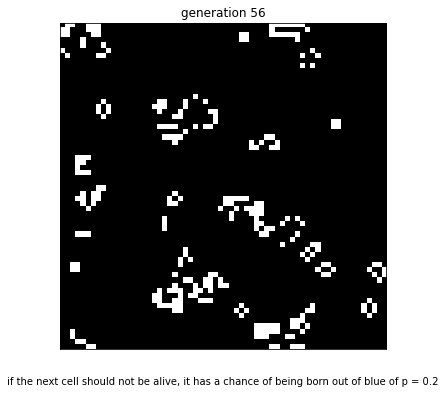

total population: 279


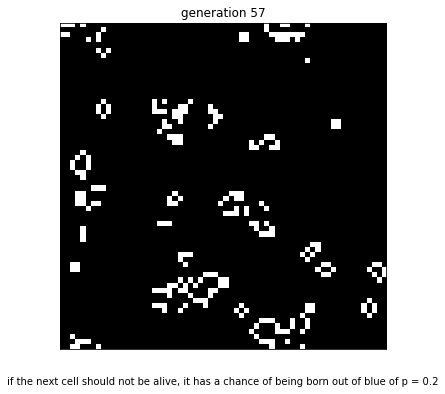

total population: 247


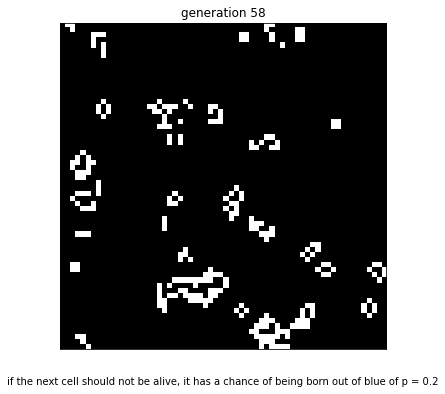

total population: 262


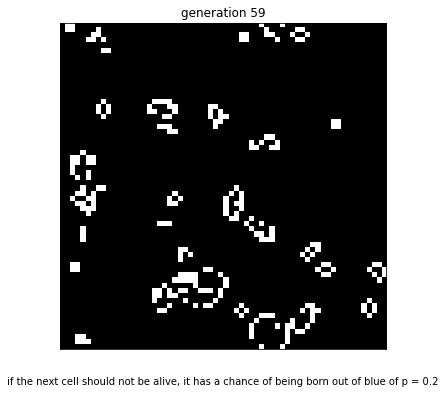

total population: 249


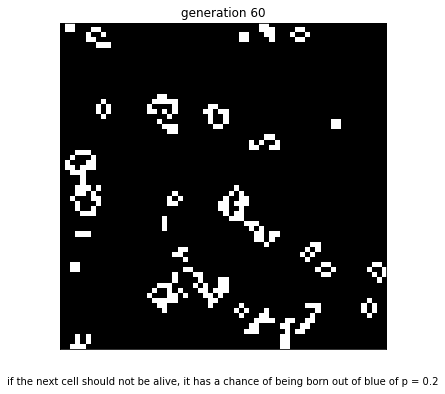

total population: 283


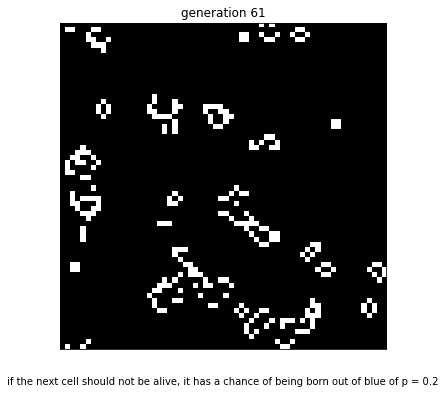

total population: 260


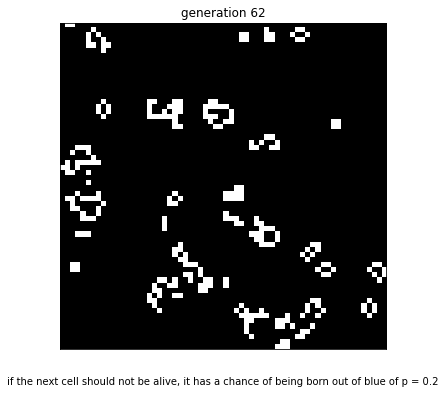

total population: 275


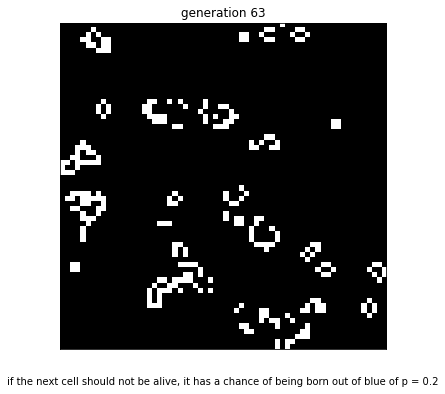

total population: 273


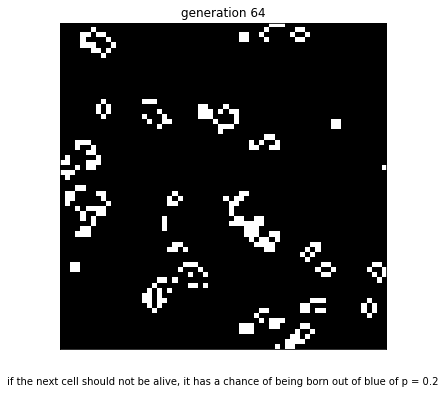

total population: 274


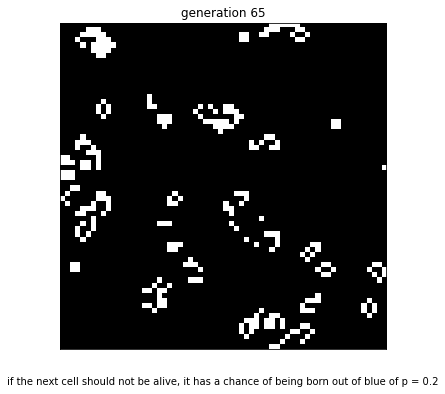

total population: 277


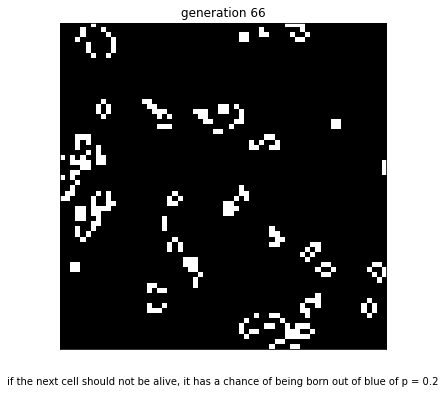

total population: 263


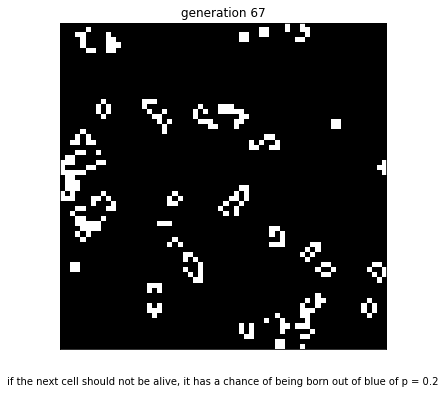

total population: 271


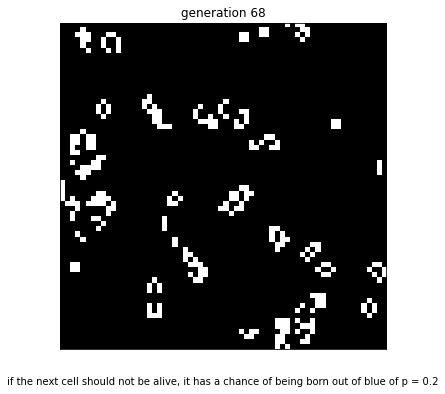

total population: 280


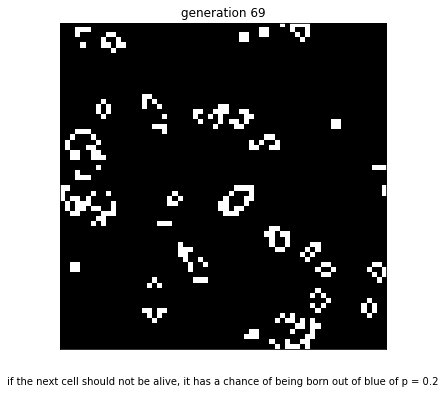

total population: 271


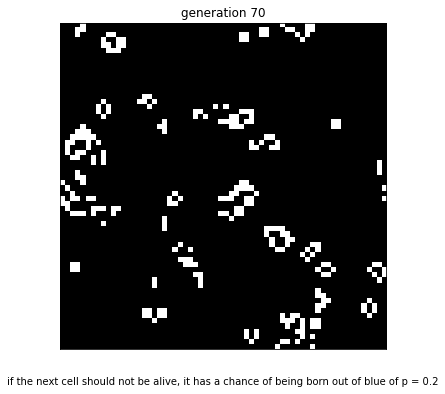

total population: 274


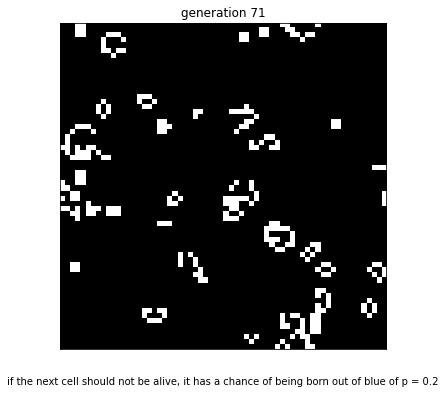

total population: 281


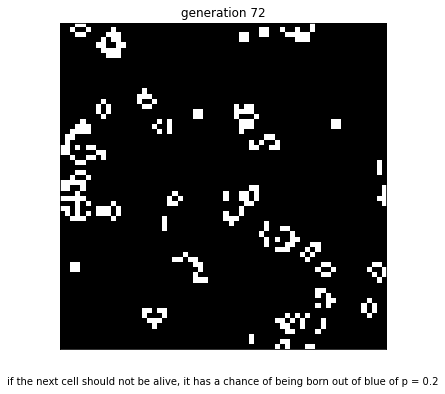

total population: 296


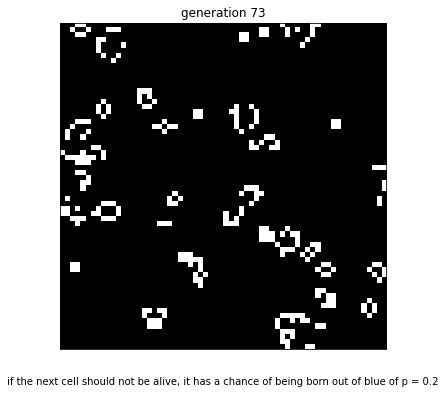

total population: 275


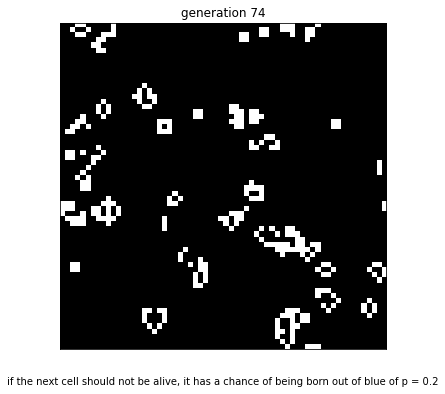

total population: 308


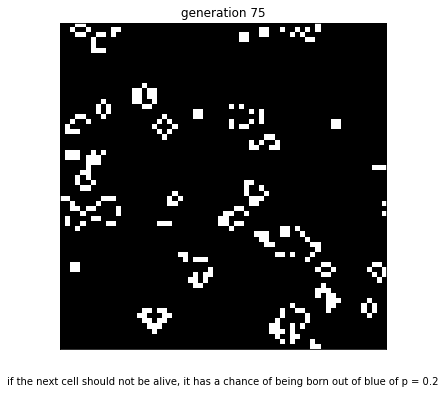

total population: 291


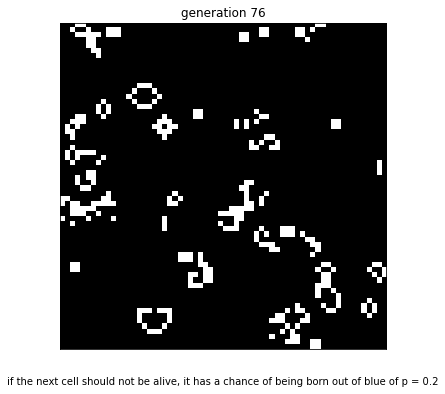

total population: 310


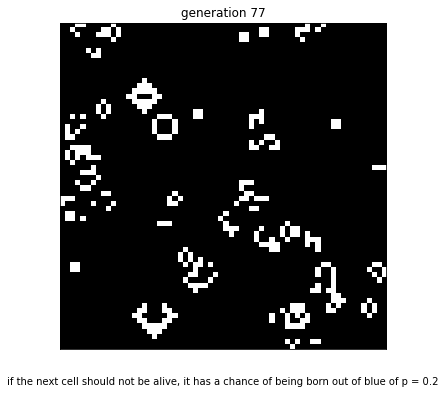

total population: 306


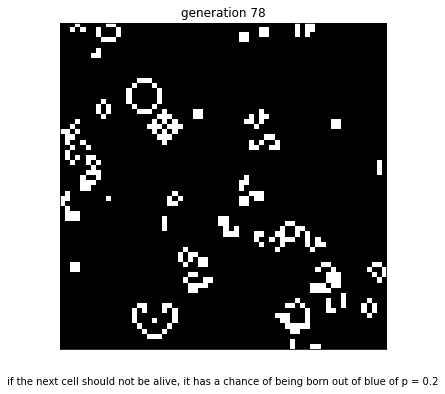

total population: 306


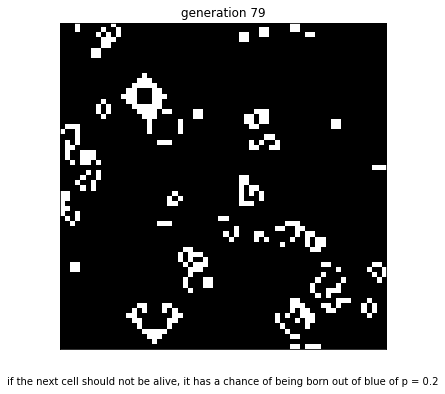

total population: 329


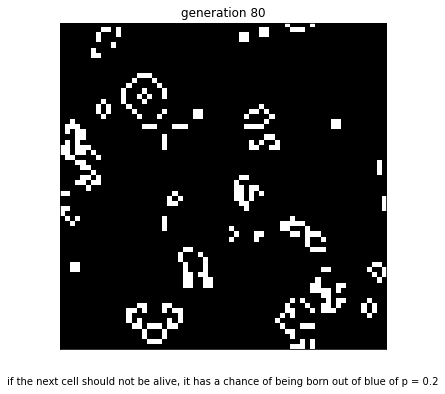

total population: 304


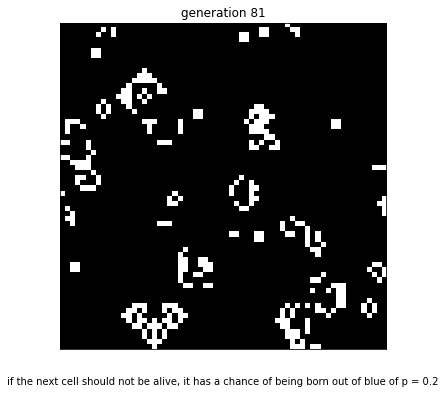

total population: 321


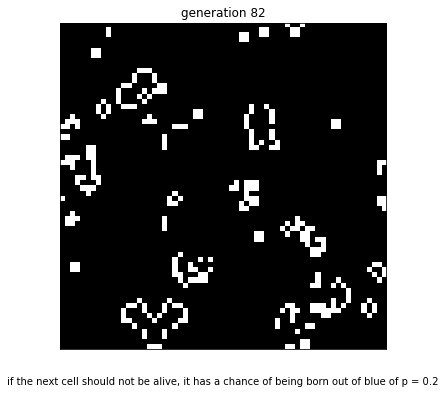

total population: 301


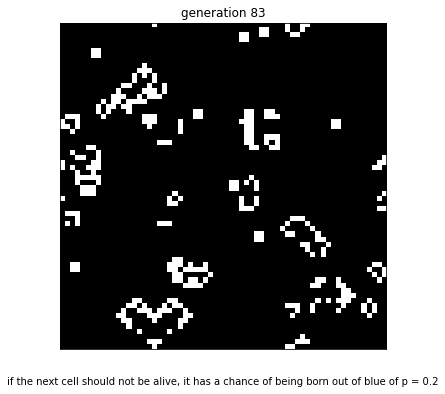

total population: 325


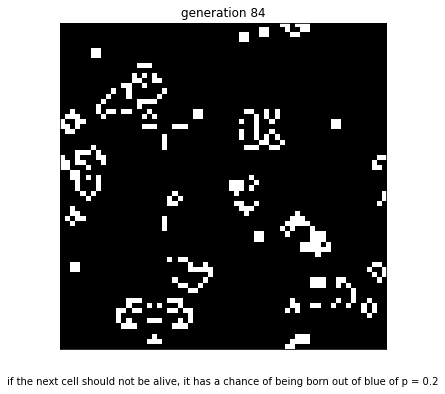

total population: 321


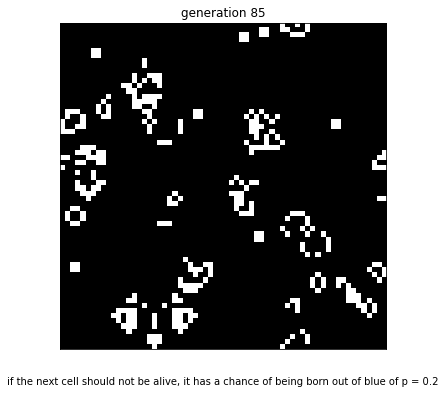

total population: 335


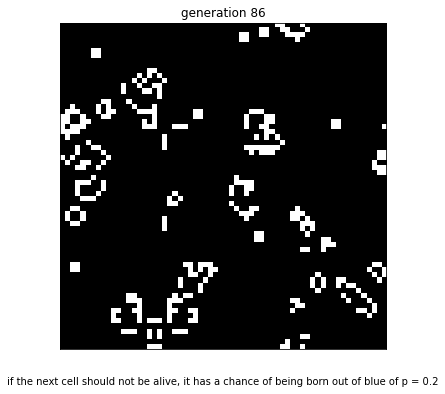

total population: 330


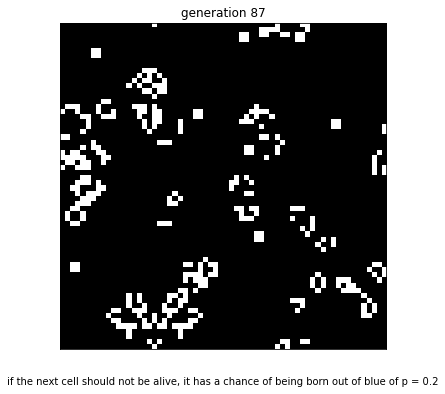

total population: 348


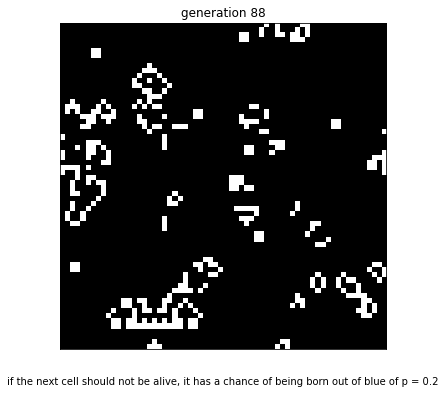

total population: 340


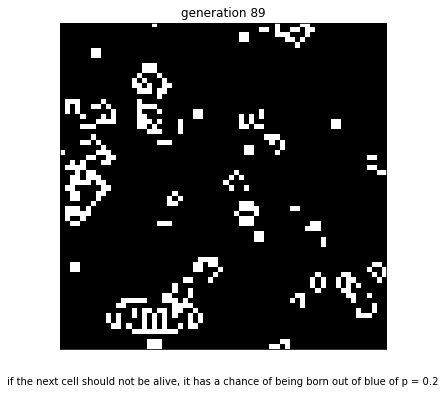

total population: 364


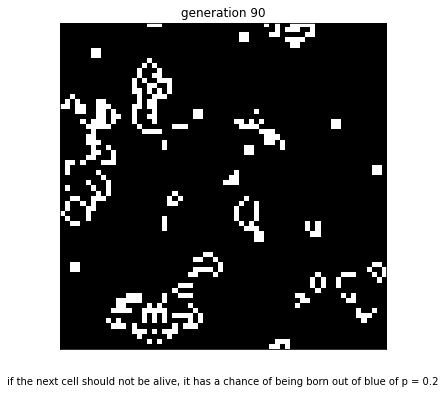

total population: 358


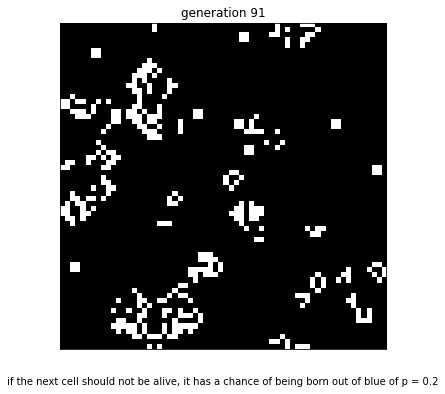

total population: 358


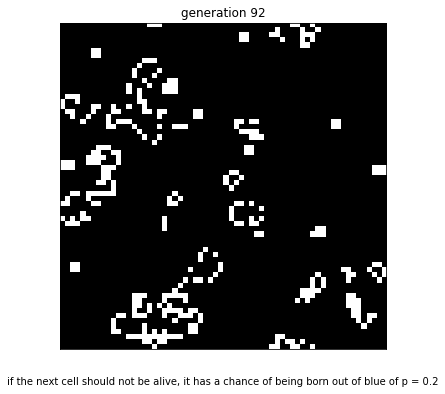

total population: 348


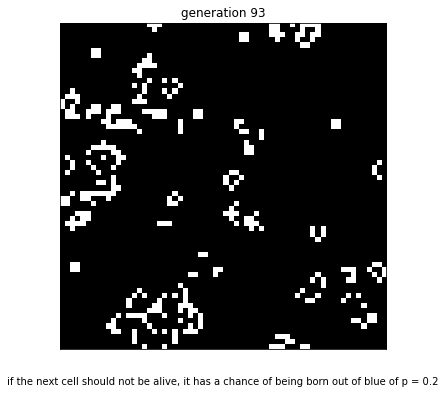

total population: 329


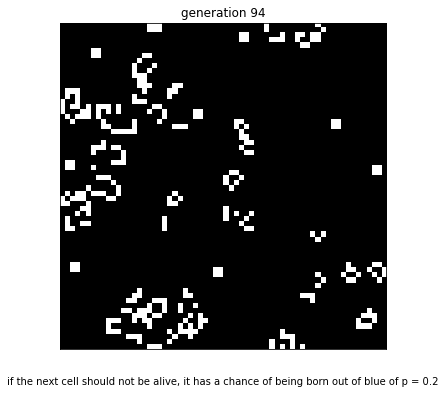

total population: 311


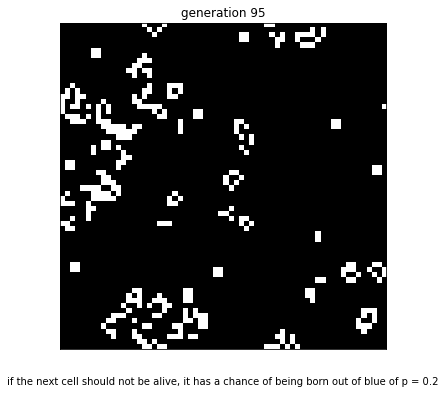

total population: 341


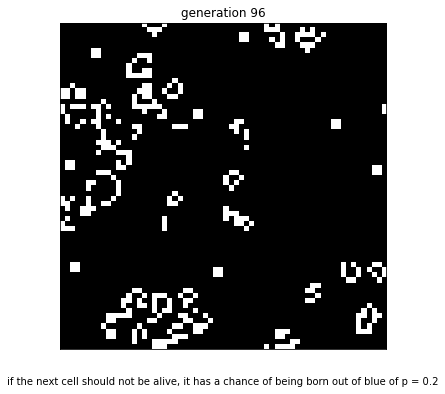

total population: 346


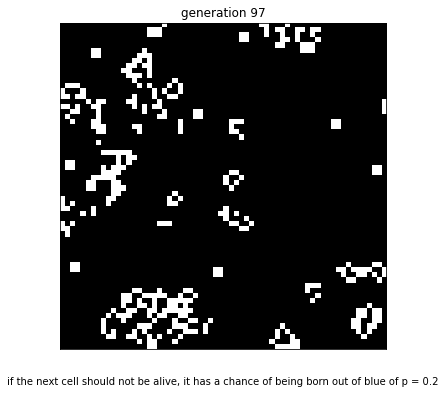

total population: 375


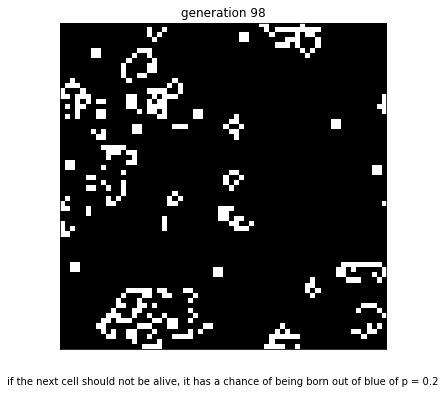

total population: 363


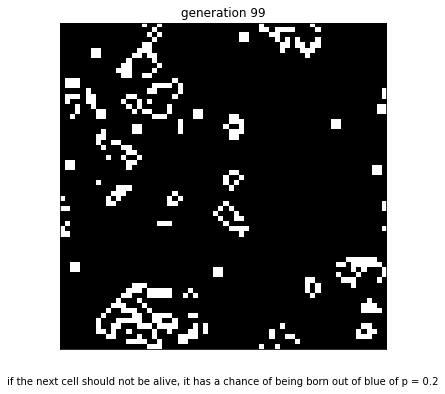

total population: 371


In [99]:
n = 64
t = 100
p = 0.2
pop2 = []
tt = [i for i in range(t)]
initial_world = np.random.randint(2, size=(n, n))
new_generation = random_next_generation(initial_world, p)
for _ in range(t):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(new_generation, cmap='gray')
    plt.title(f'generation {_}')
    plt.xticks([])
    plt.yticks([])
    caption_text = "if the next cell should not be alive, it has a chance of being born out of blue of p = 0.2"
    plt.text(0.5, -0.1, caption_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)
    plt.savefig(f'/Users/Mahyar/Desktop/conway/9/{_}.png', dpi=100)  # save to folder 9
    plt.show()
    population = np.sum(new_generation)
    pop2.append(population)
    print(f'total population: {population}')
    new_generation = next_generation_p(new_generation)

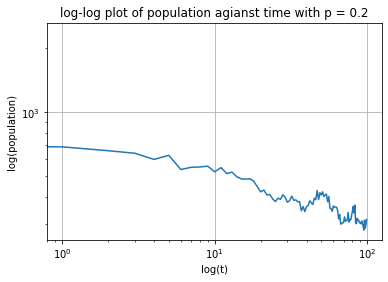

In [164]:
plt.loglog(tt, pop2,)
plt.xlabel('log(t)')
plt.ylabel('log(population)')
plt.grid();
plt.title('log-log plot of population agianst time with p = 0.2')
plt.show()

Text(0.5, 1.0, 'linear plot of population agianst time with p = 0.2')

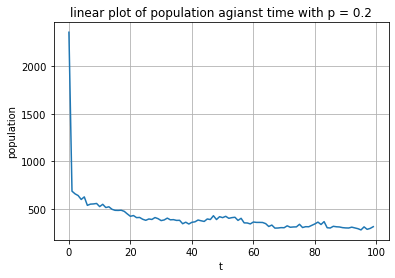

In [165]:
plt.plot(tt, pop2,)
plt.xlabel('t')
plt.ylabel('population')
plt.grid();
plt.title('linear plot of population agianst time with p = 0.2')

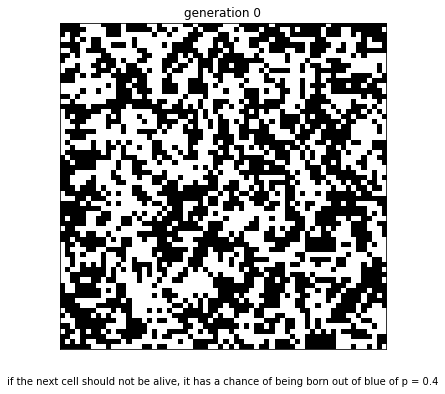

total population: 2043


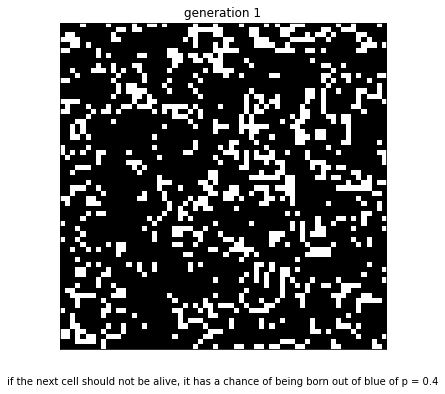

total population: 864


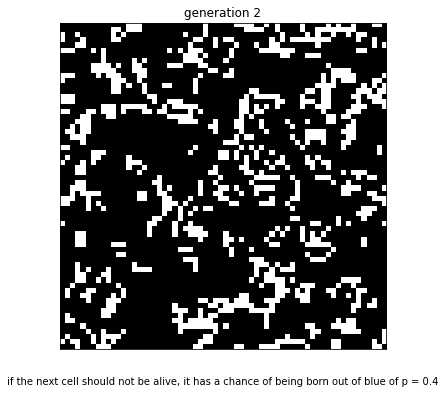

total population: 870


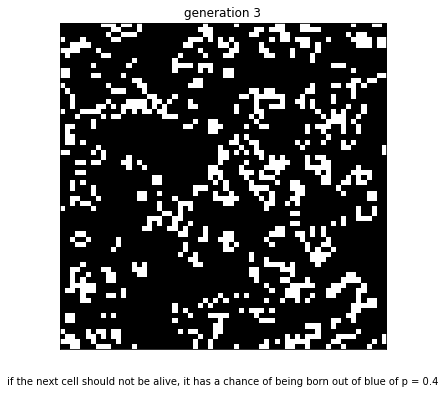

total population: 784


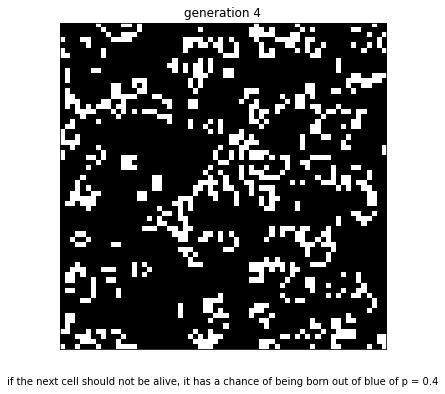

total population: 749


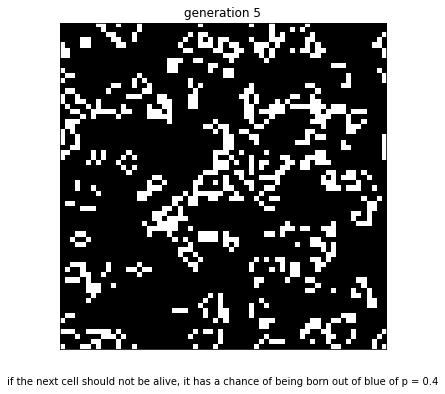

total population: 728


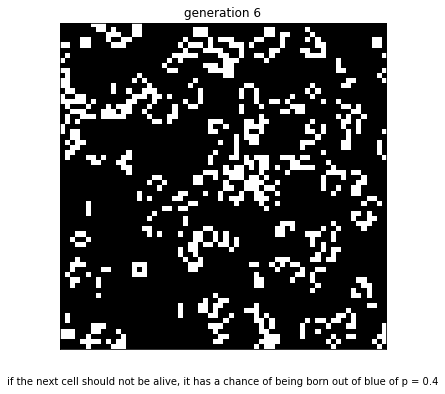

total population: 704


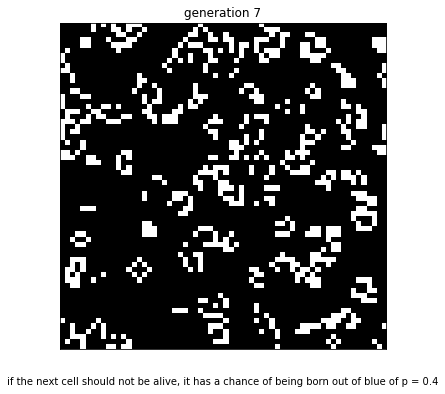

total population: 671


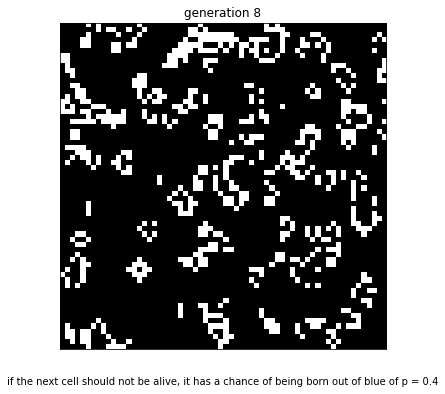

total population: 666


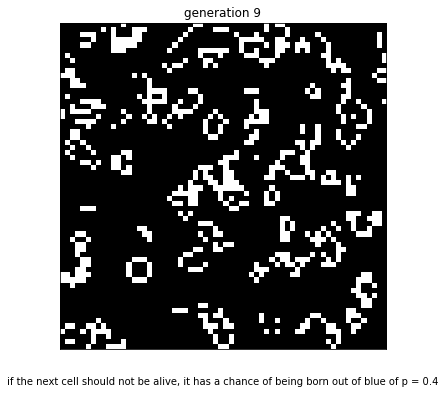

total population: 638


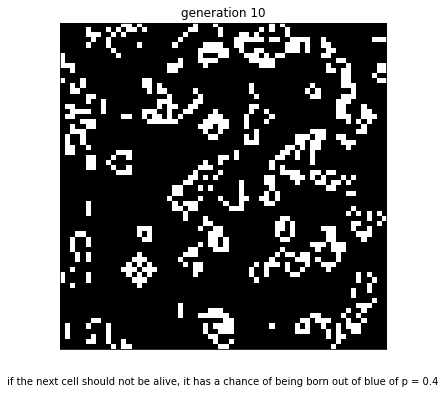

total population: 666


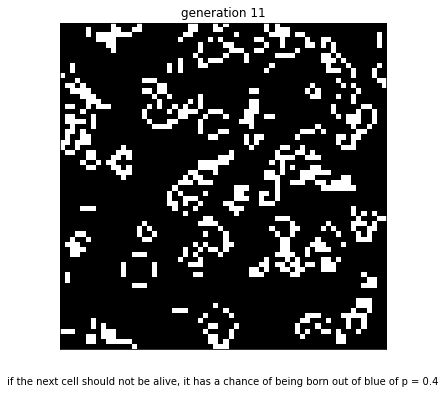

total population: 658


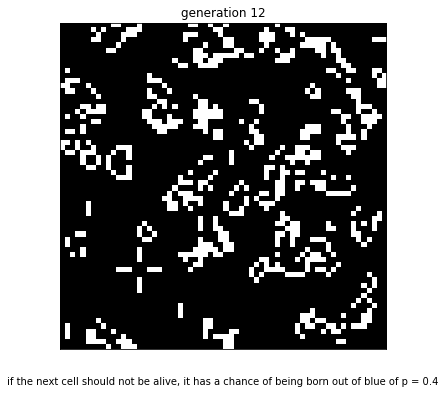

total population: 637


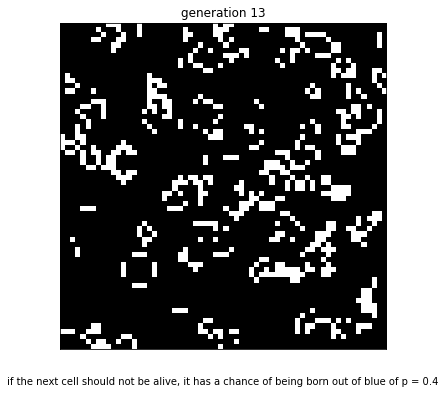

total population: 585


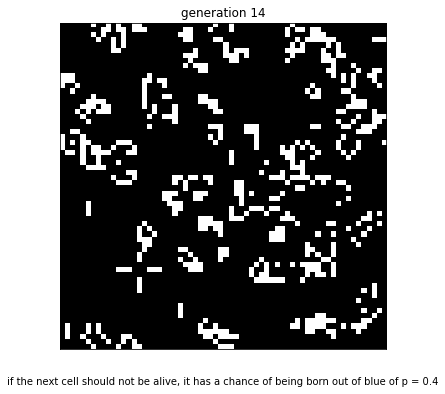

total population: 569


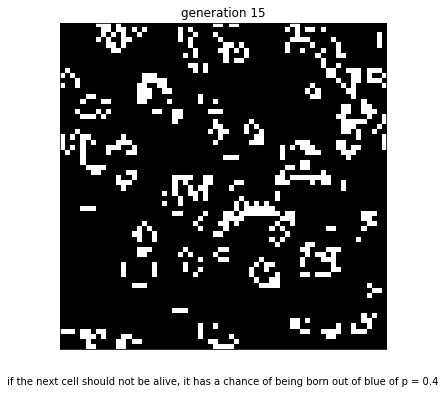

total population: 544


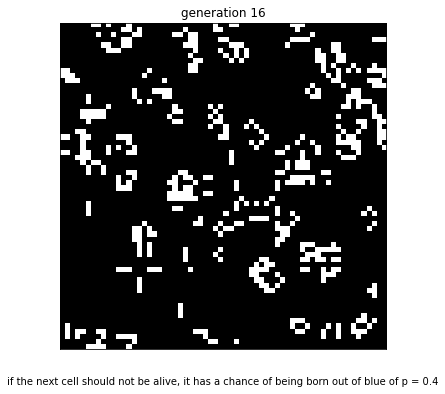

total population: 509


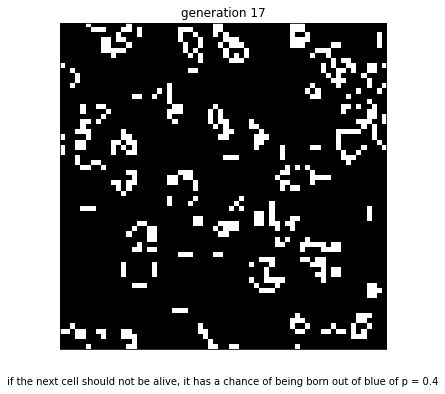

total population: 474


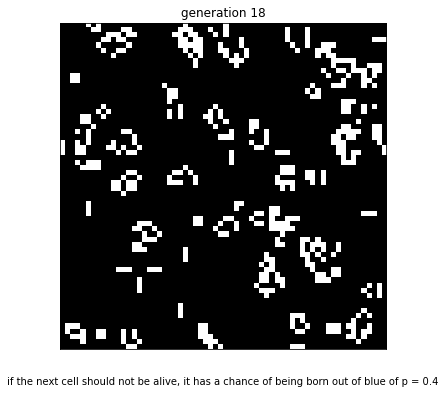

total population: 493


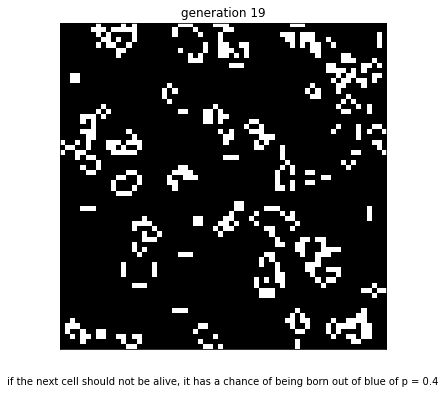

total population: 491


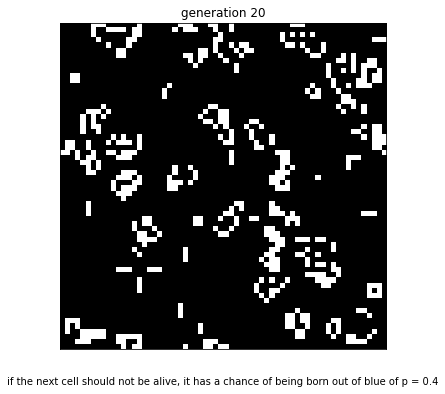

total population: 505


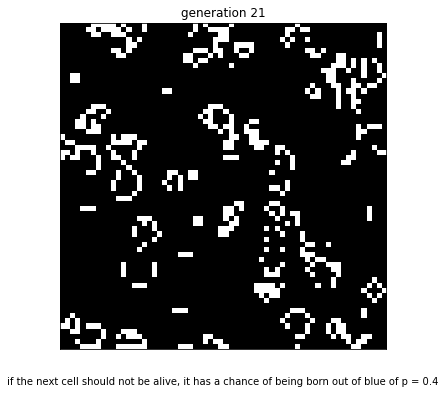

total population: 491


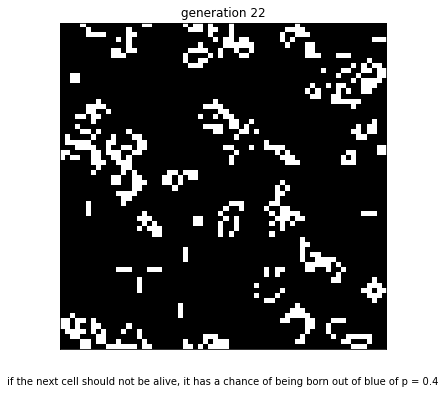

total population: 524


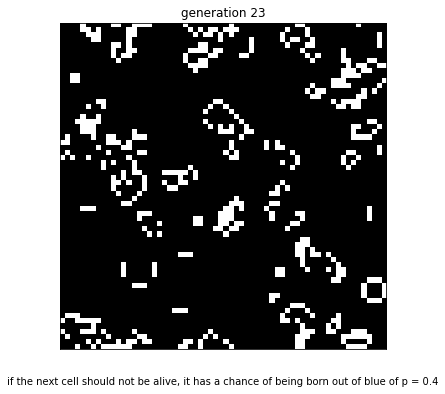

total population: 479


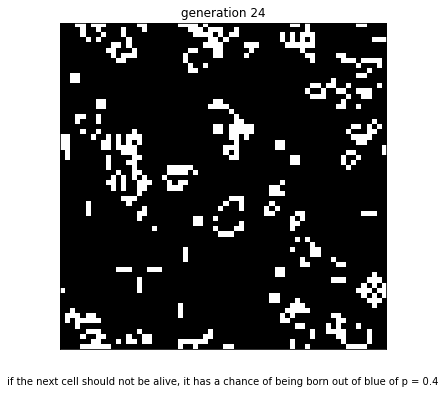

total population: 493


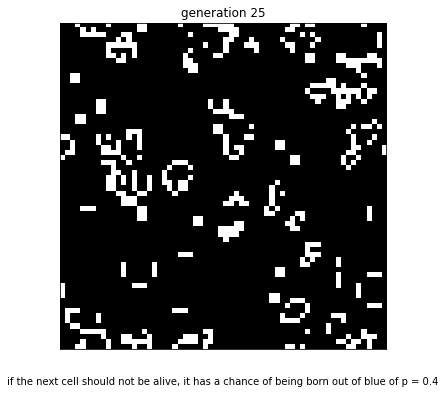

total population: 470


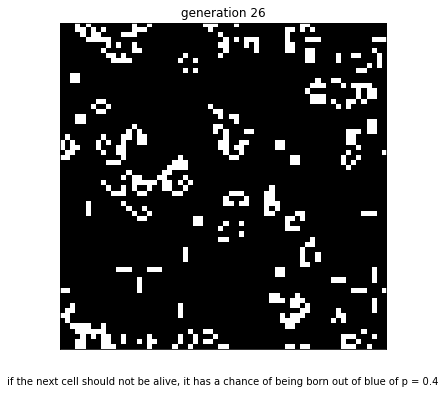

total population: 458


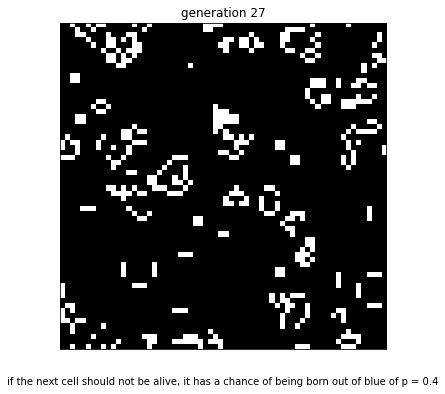

total population: 440


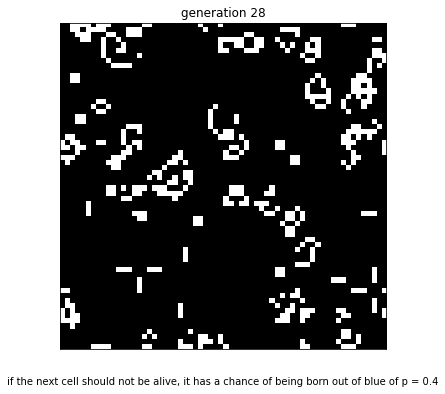

total population: 460


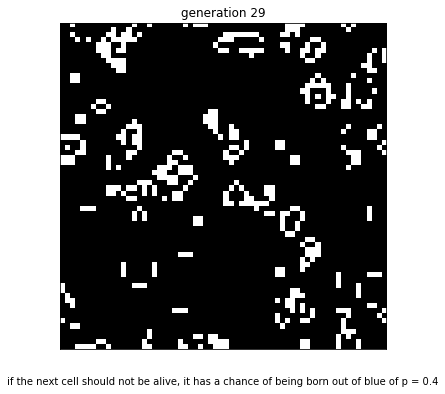

total population: 463


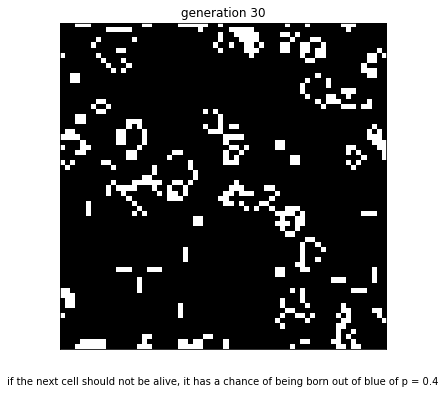

total population: 447


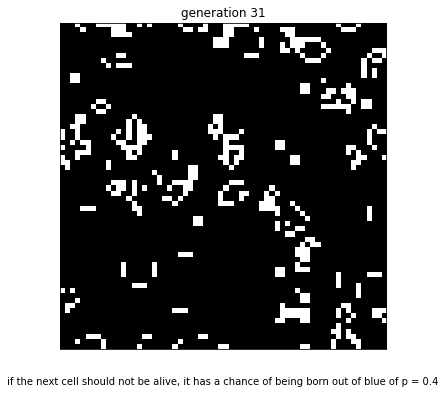

total population: 438


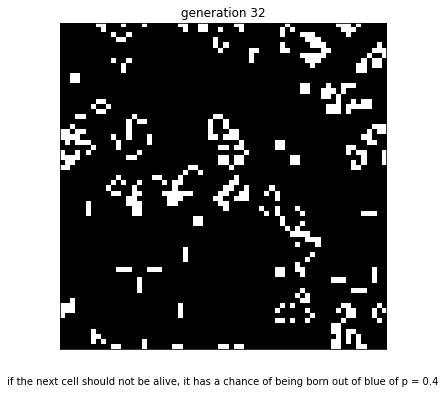

total population: 419


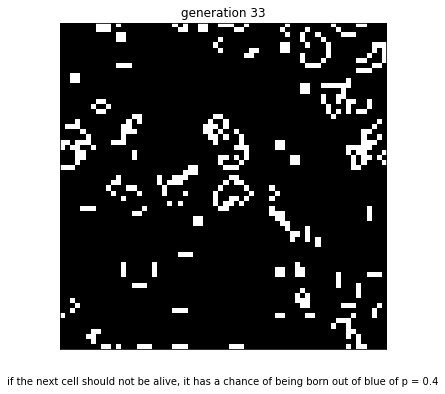

total population: 387


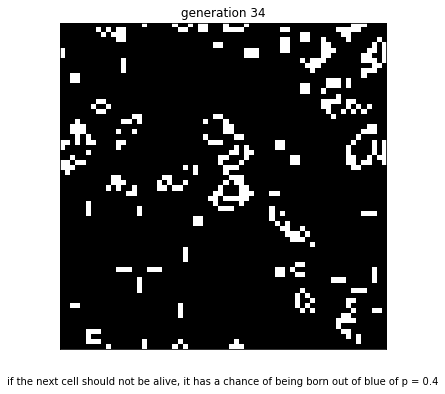

total population: 393


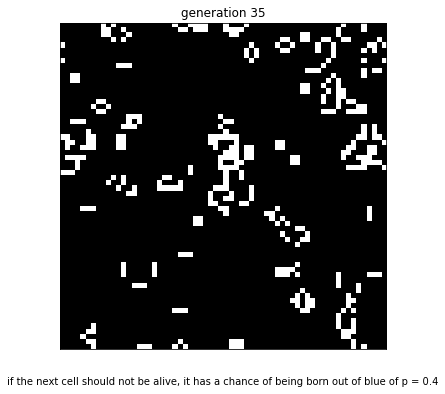

total population: 383


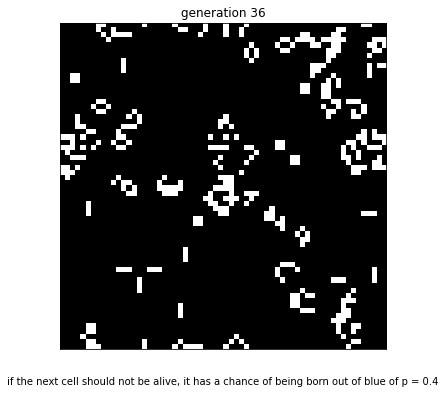

total population: 387


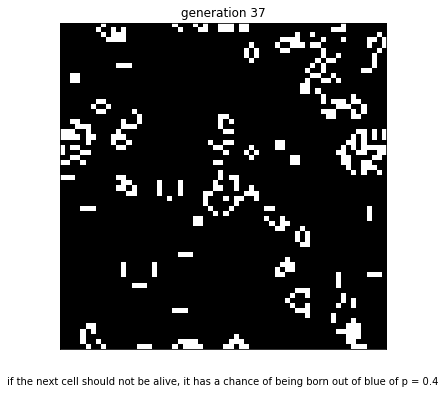

total population: 396


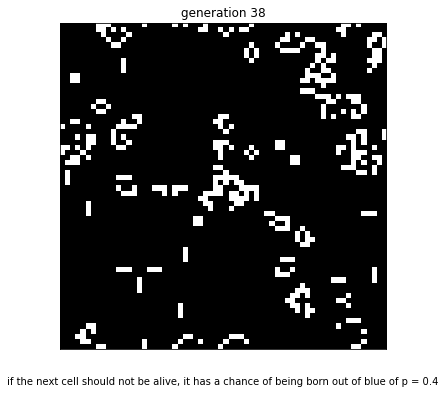

total population: 387


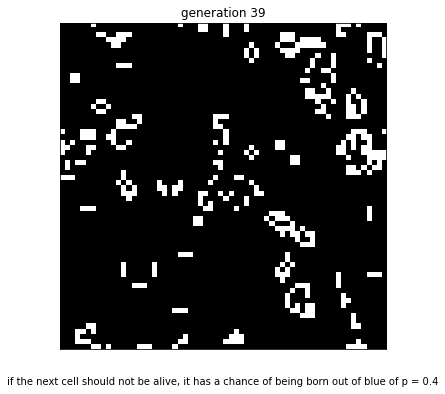

total population: 391


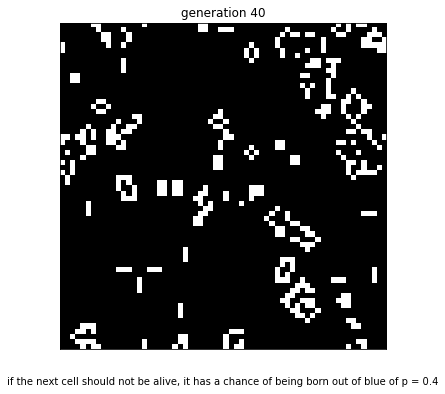

total population: 403


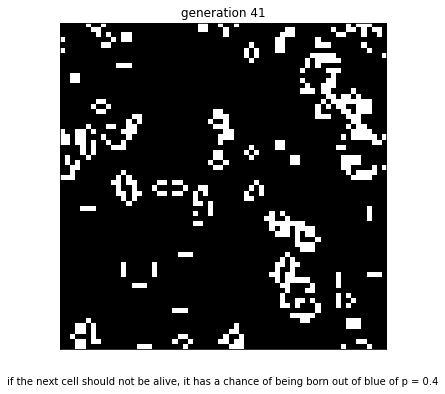

total population: 461


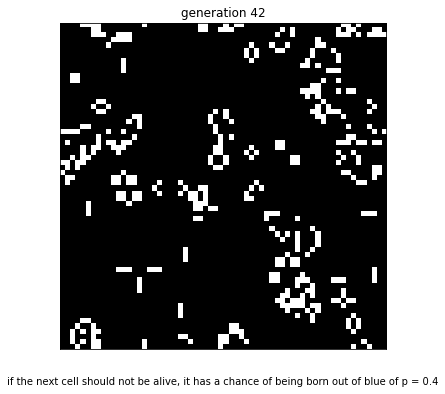

total population: 406


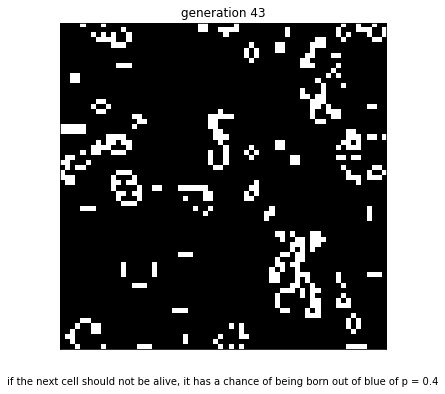

total population: 413


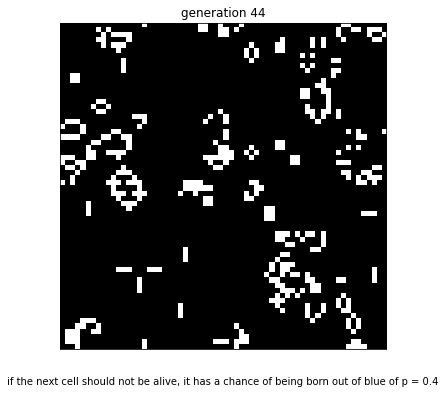

total population: 401


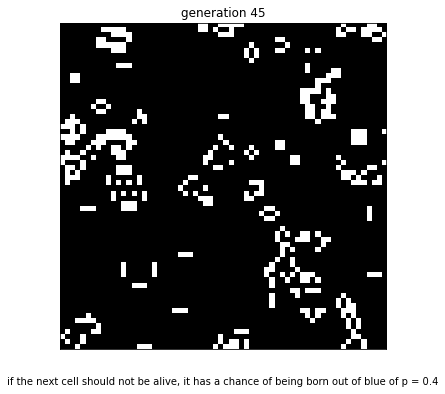

total population: 416


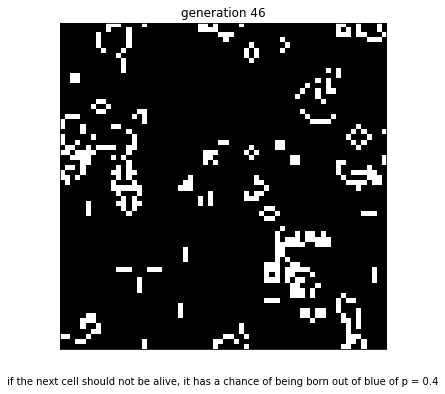

total population: 400


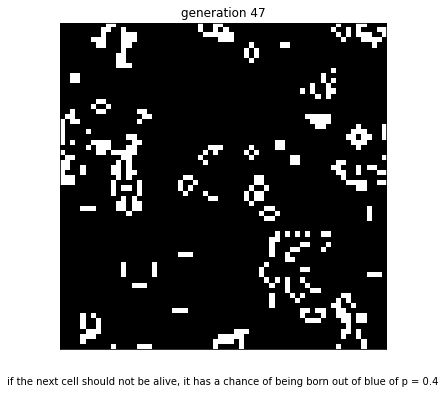

total population: 407


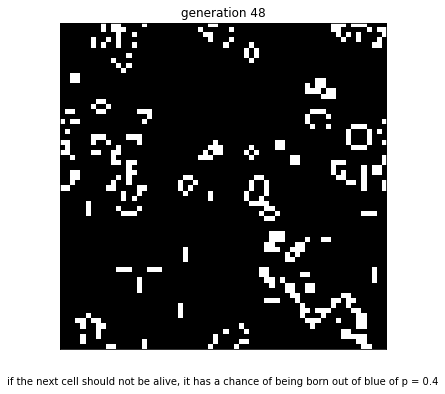

total population: 376


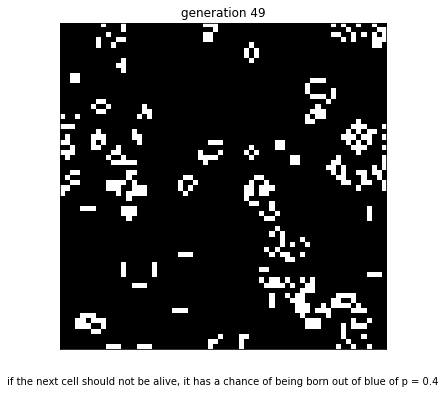

total population: 394


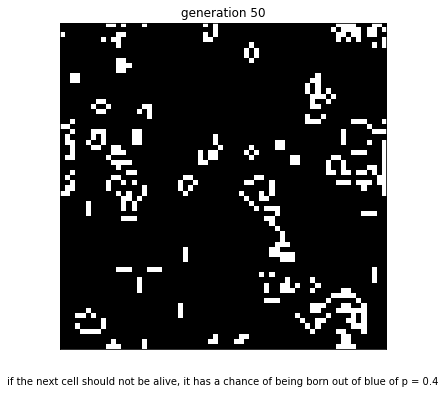

total population: 391


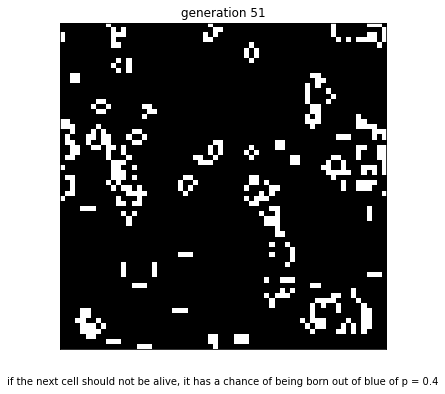

total population: 400


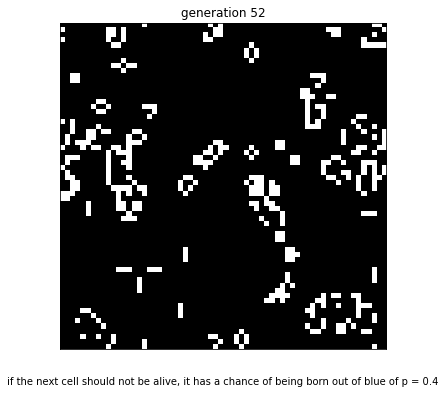

total population: 395


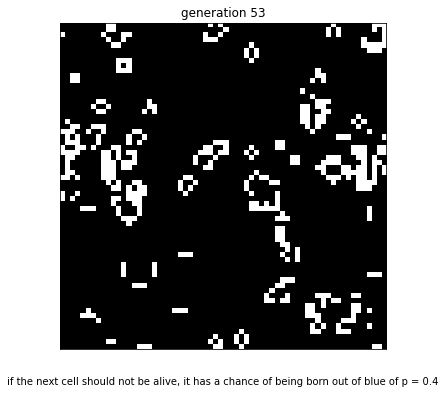

total population: 433


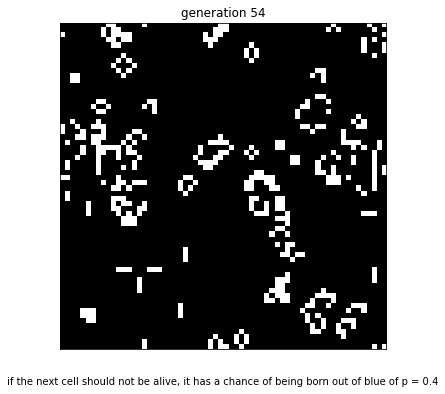

total population: 403


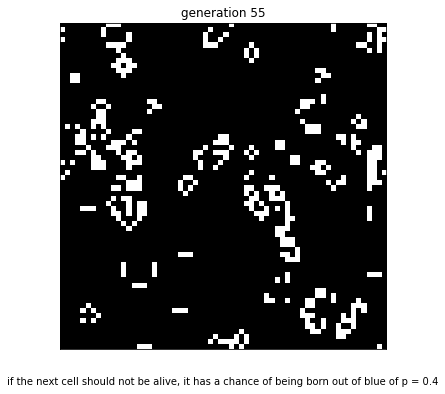

total population: 403


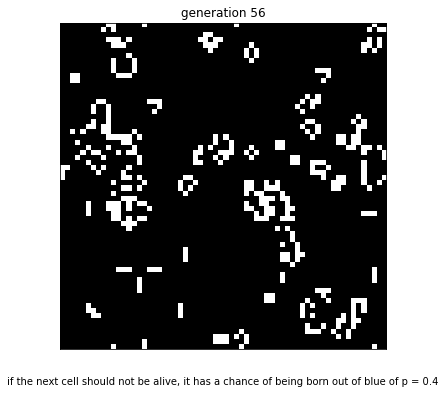

total population: 384


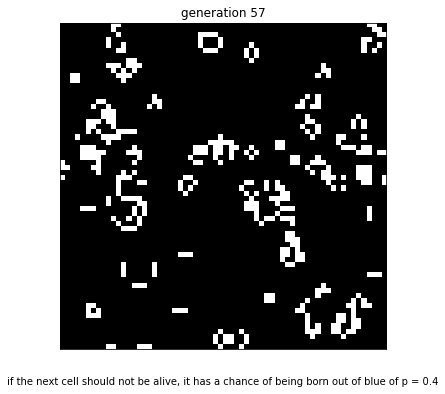

total population: 410


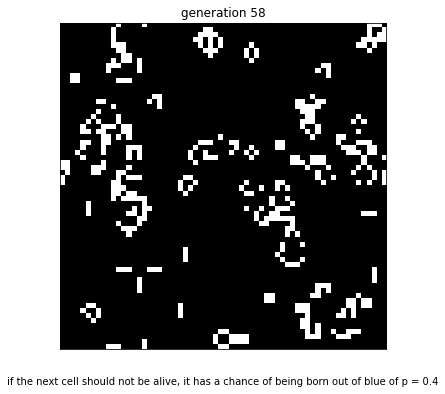

total population: 417


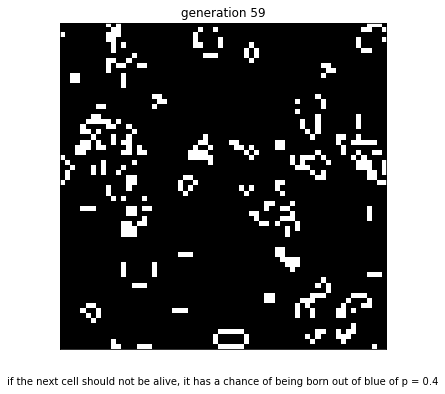

total population: 383


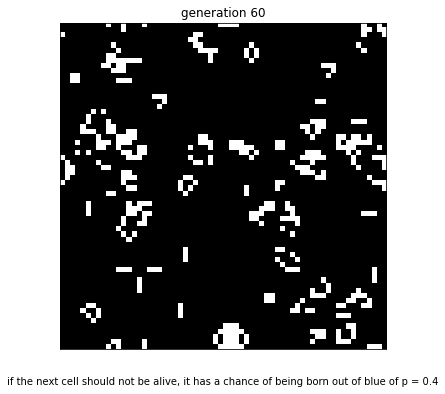

total population: 399


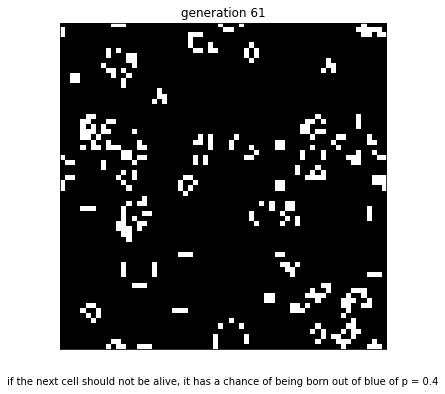

total population: 346


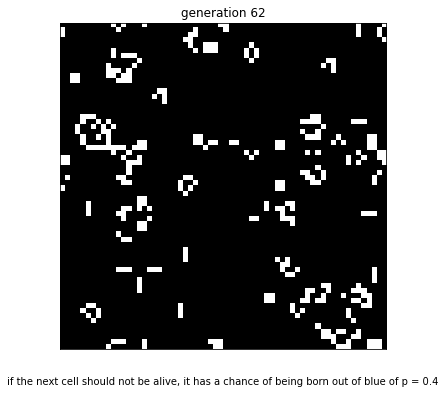

total population: 332


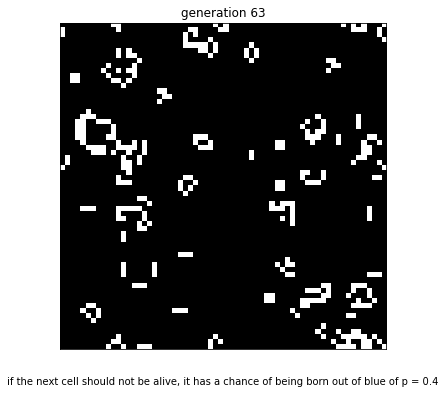

total population: 332


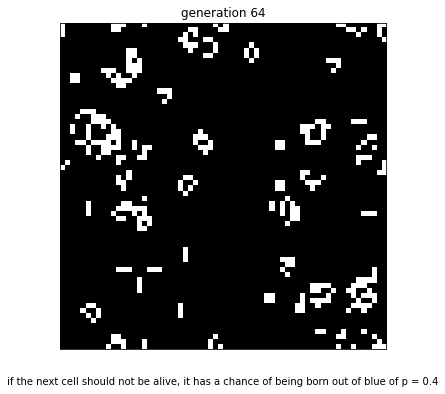

total population: 348


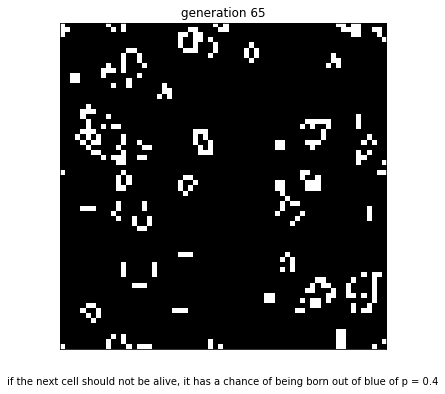

total population: 313


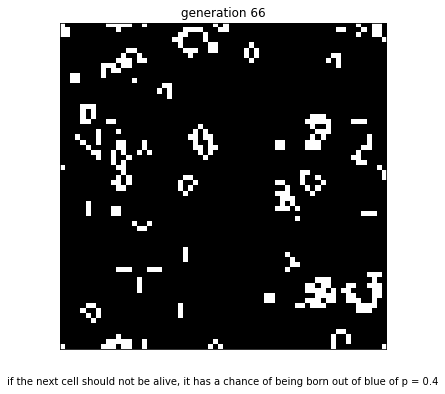

total population: 344


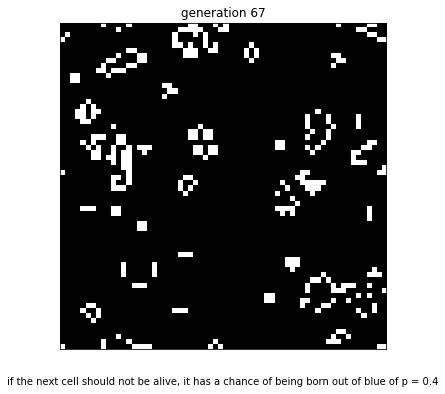

total population: 322


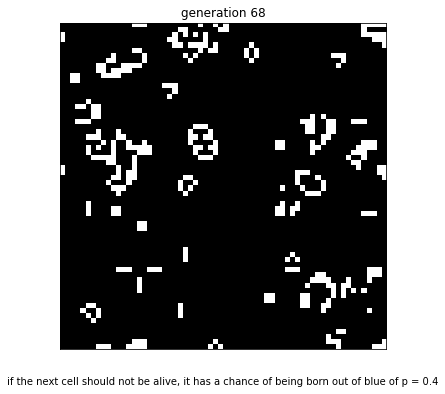

total population: 356


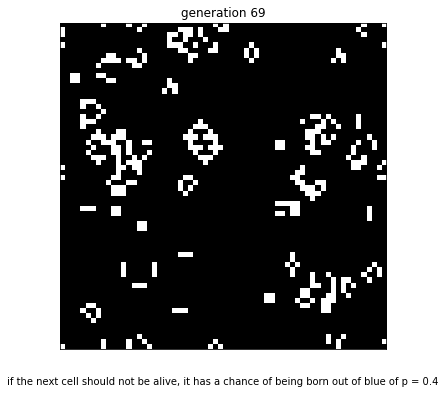

total population: 353


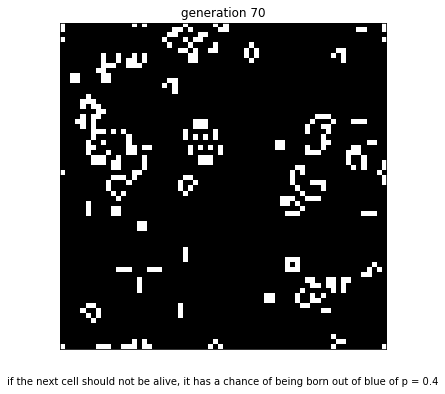

total population: 338


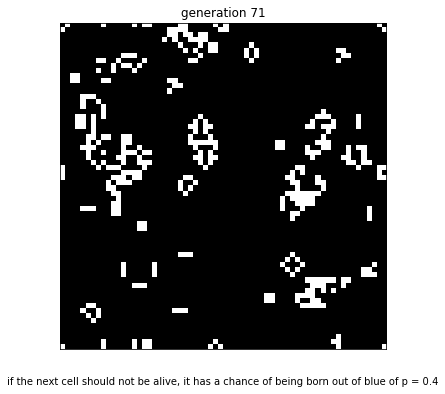

total population: 374


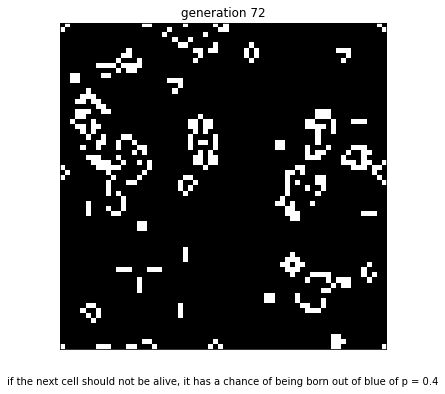

total population: 356


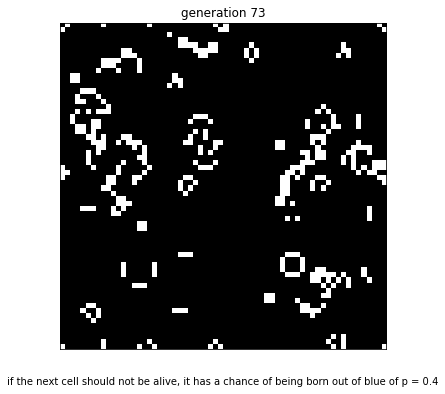

total population: 353


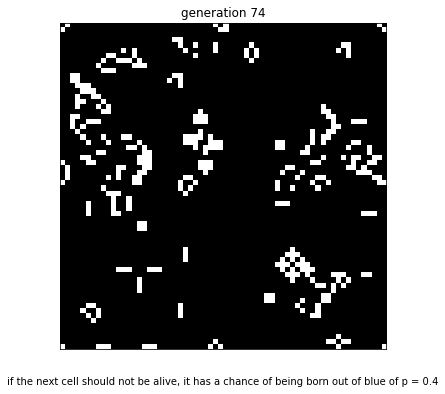

total population: 340


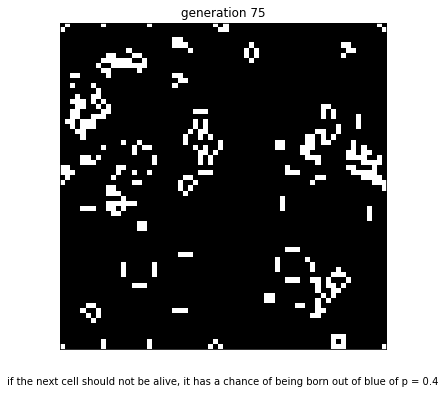

total population: 343


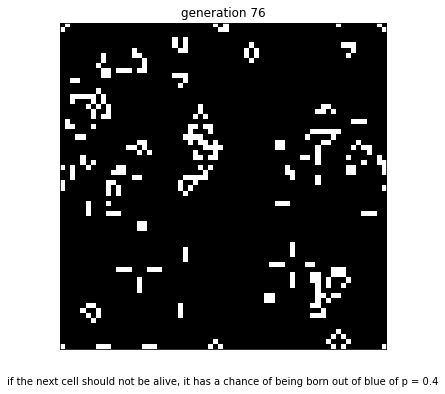

total population: 296


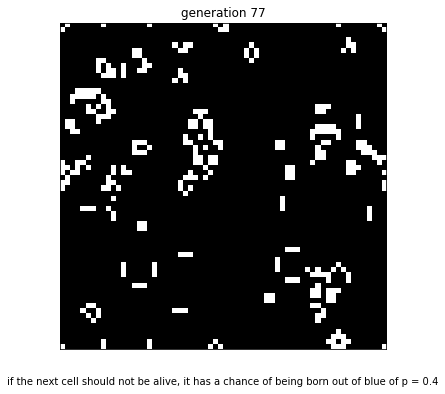

total population: 324


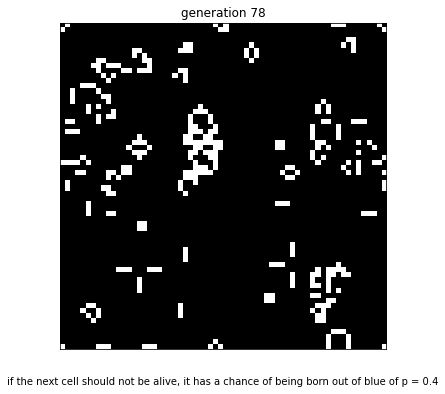

total population: 321


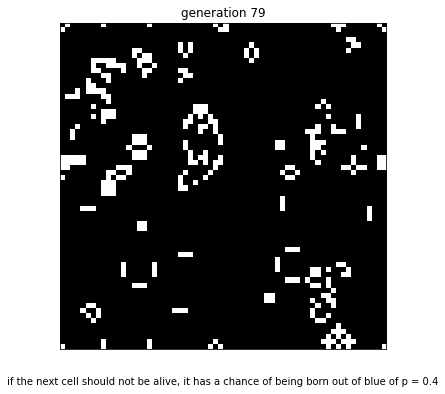

total population: 328


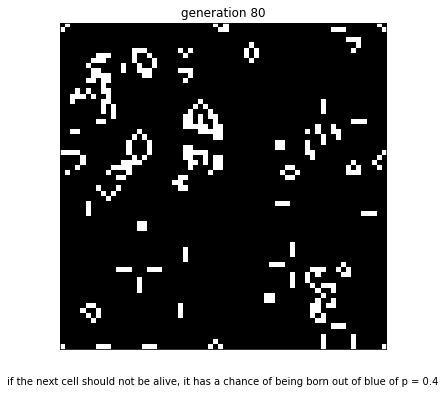

total population: 314


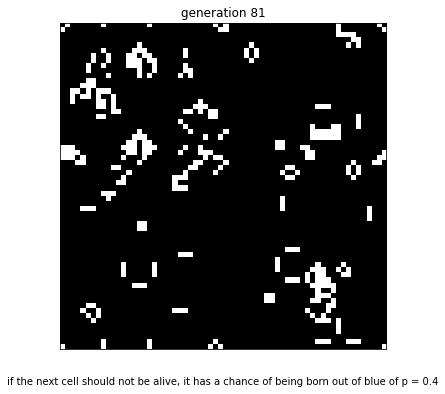

total population: 327


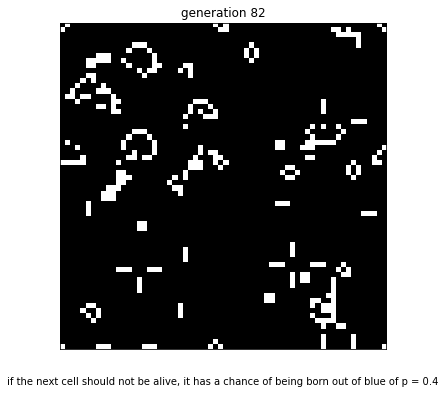

total population: 299


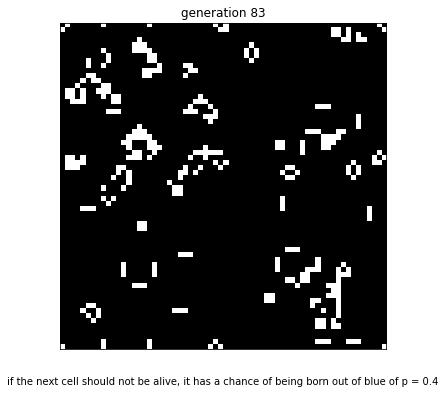

total population: 314


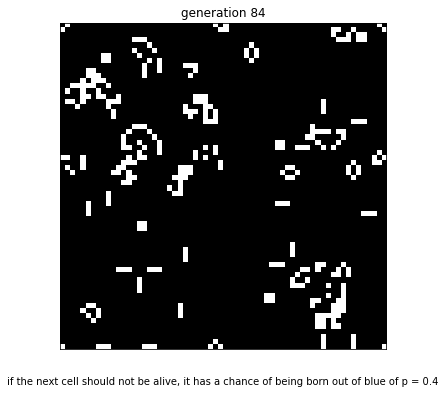

total population: 316


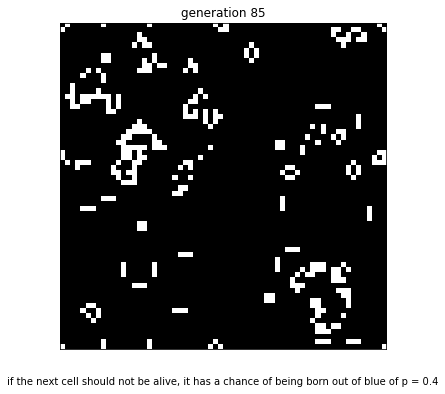

total population: 316


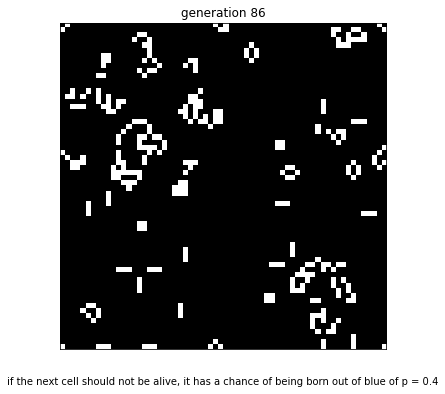

total population: 310


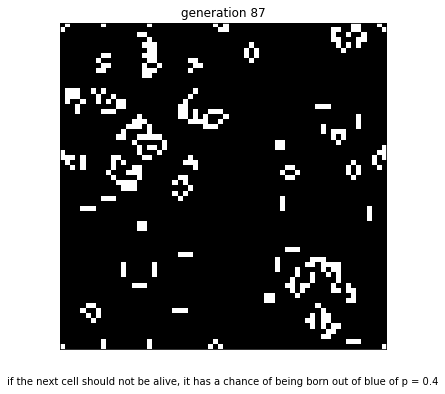

total population: 331


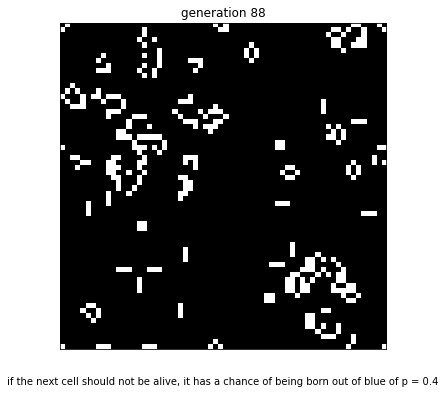

total population: 332


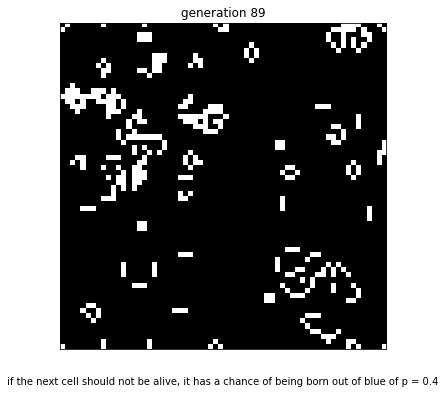

total population: 353


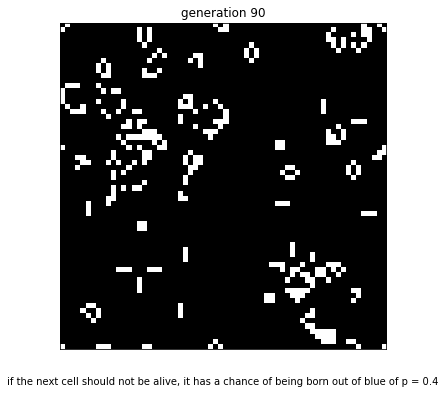

total population: 324


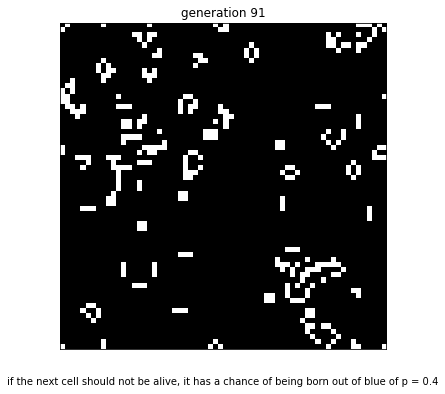

total population: 318


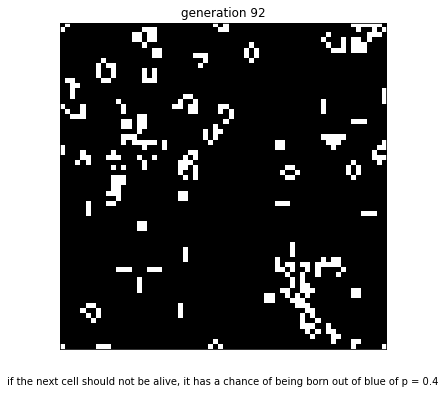

total population: 350


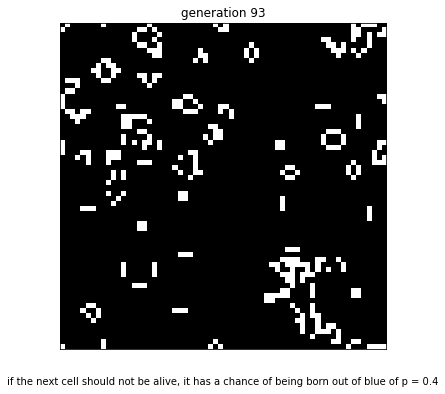

total population: 353


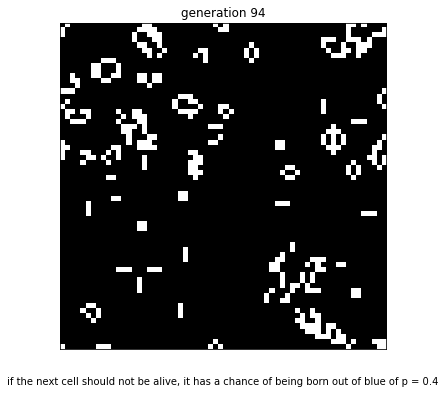

total population: 373


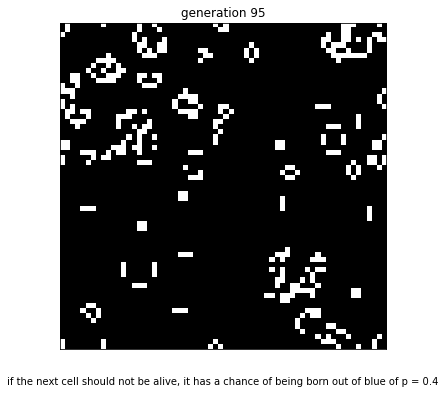

total population: 366


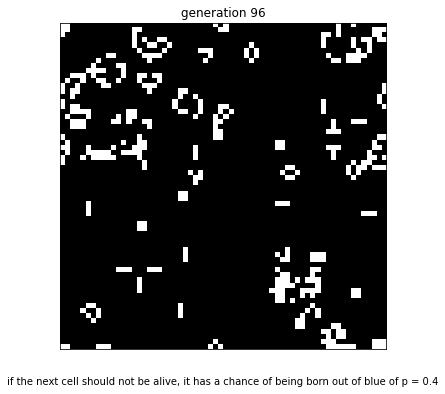

total population: 382


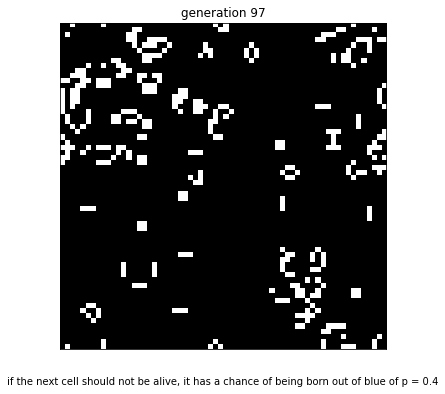

total population: 362


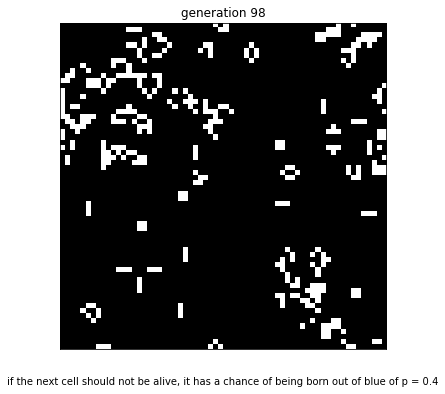

total population: 365


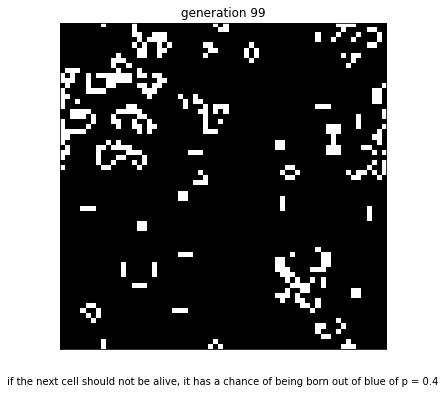

total population: 382


In [100]:
n = 64
t = 100
p = 0.4
pop4 = []
tt = [i for i in range(t)]
initial_world = np.random.randint(2, size=(n, n))
new_generation = random_next_generation(initial_world, p)
for _ in range(t):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(new_generation, cmap='gray')
    plt.title(f'generation {_}')
    plt.xticks([])
    plt.yticks([])
    caption_text = "if the next cell should not be alive, it has a chance of being born out of blue of p = 0.4"
    plt.text(0.5, -0.1, caption_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)
    plt.savefig(f'/Users/Mahyar/Desktop/conway/10/{_}.png', dpi=100)  # save to folder 10
    plt.show()
    population = np.sum(new_generation)
    pop4.append(population)
    print(f'total population: {population}')
    new_generation = next_generation_p(new_generation)

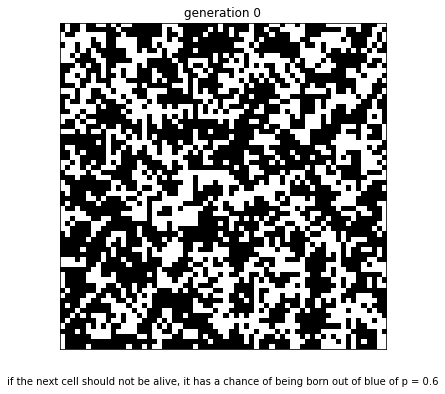

total population: 1743


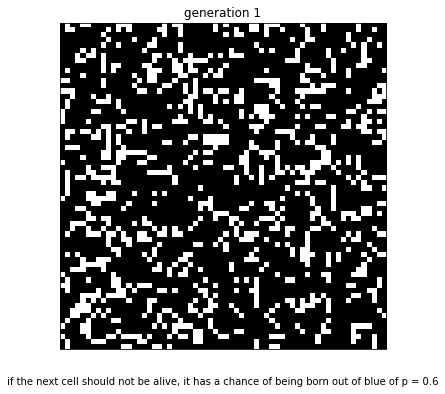

total population: 943


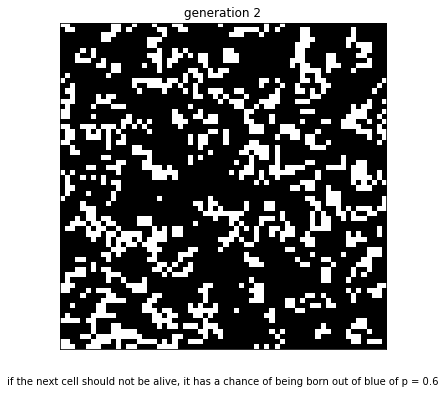

total population: 1012


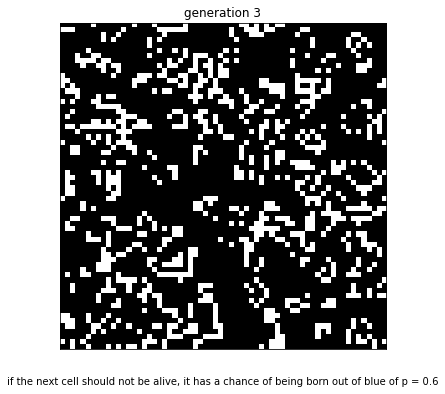

total population: 876


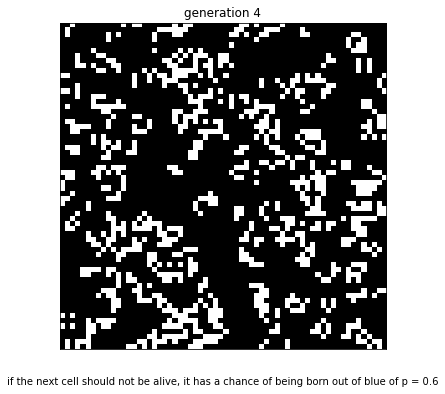

total population: 880


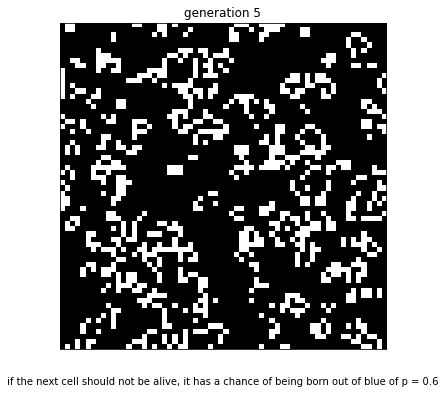

total population: 851


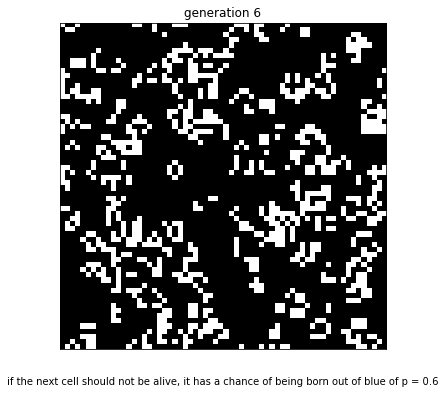

total population: 870


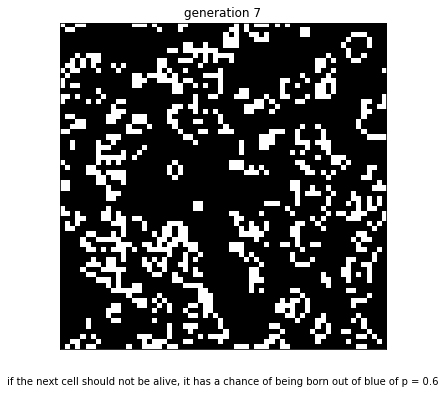

total population: 844


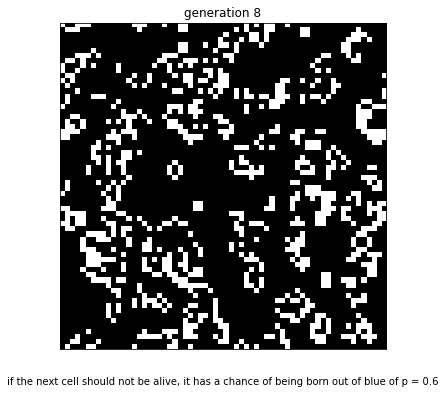

total population: 824


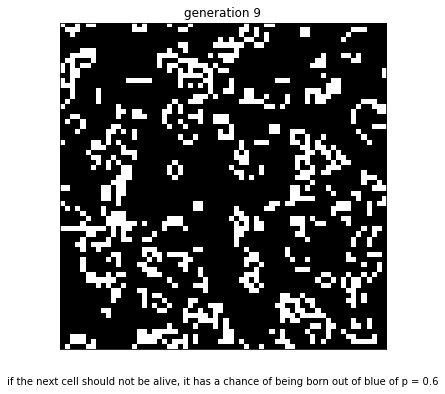

total population: 817


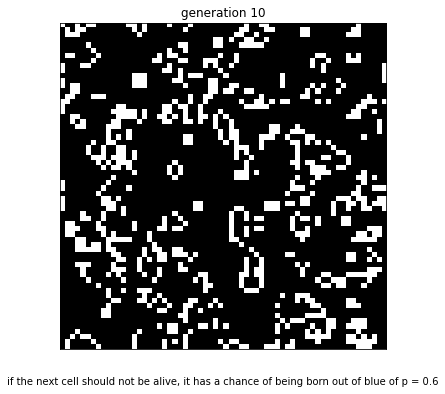

total population: 780


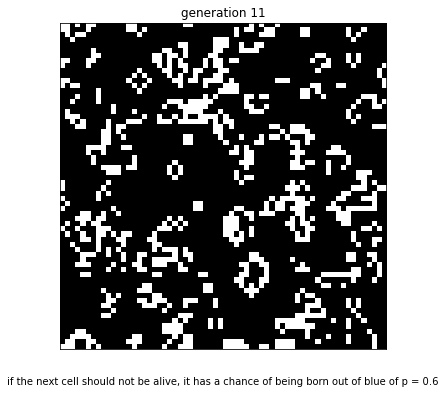

total population: 811


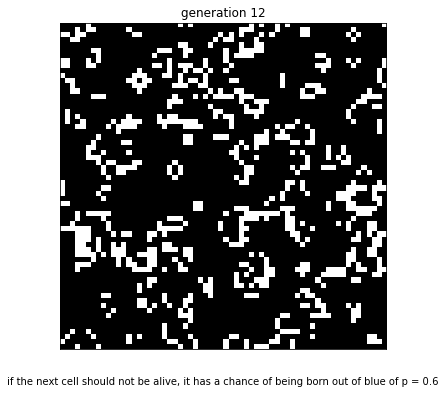

total population: 735


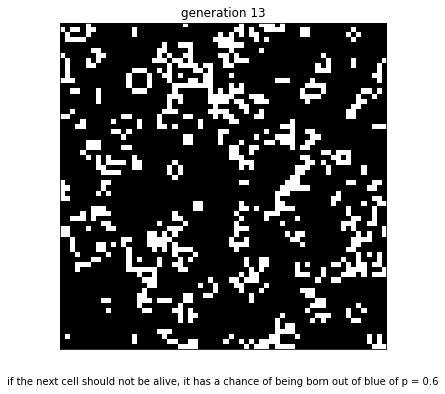

total population: 741


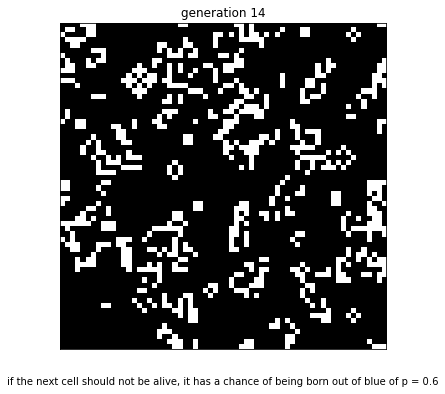

total population: 725


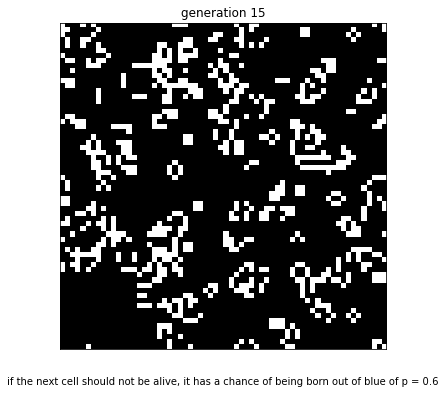

total population: 714


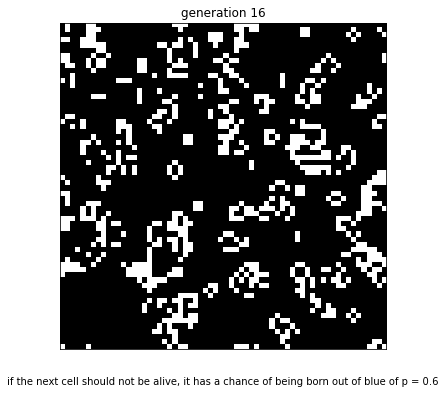

total population: 722


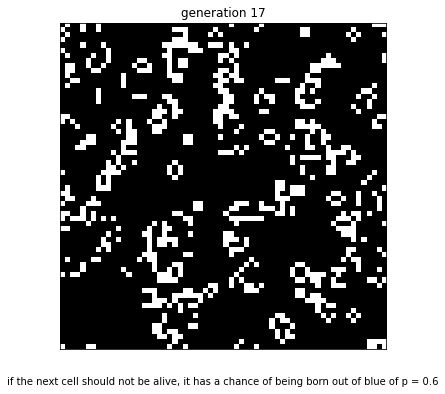

total population: 663


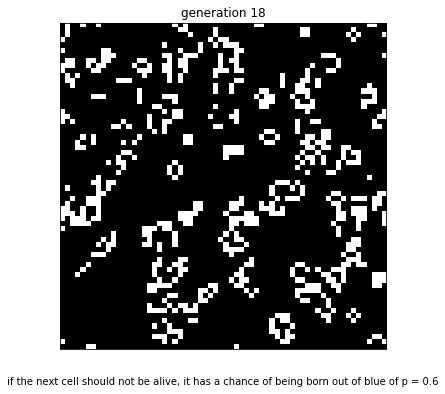

total population: 641


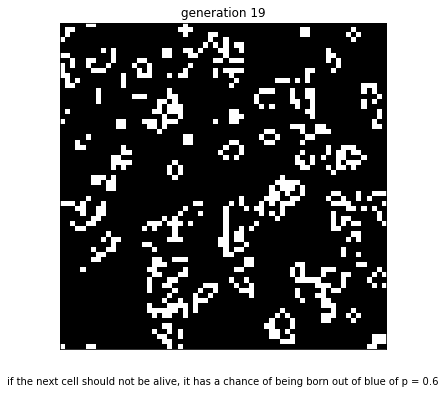

total population: 599


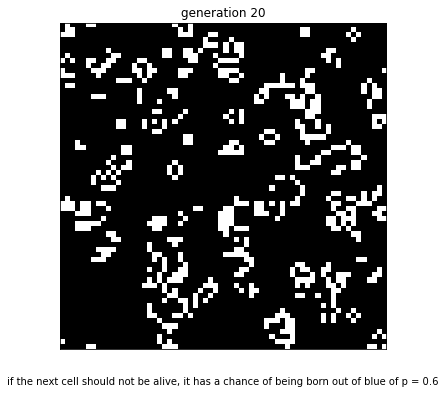

total population: 609


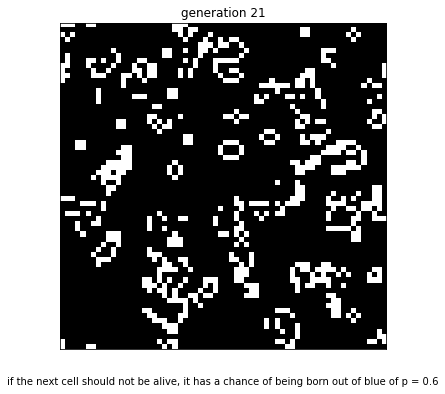

total population: 626


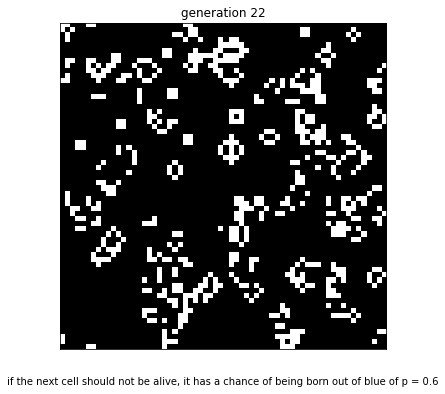

total population: 600


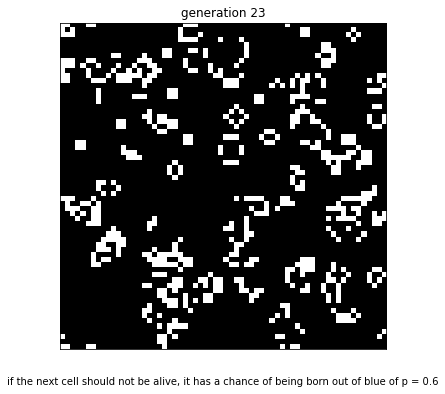

total population: 598


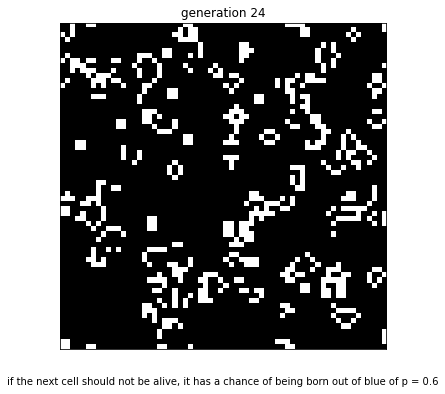

total population: 583


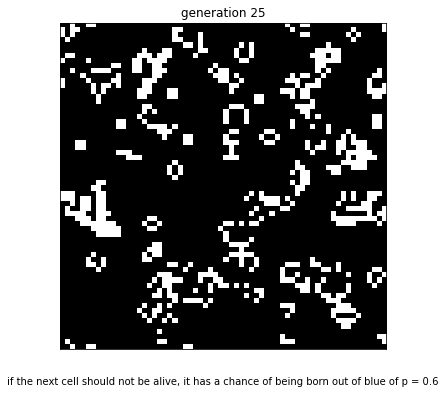

total population: 617


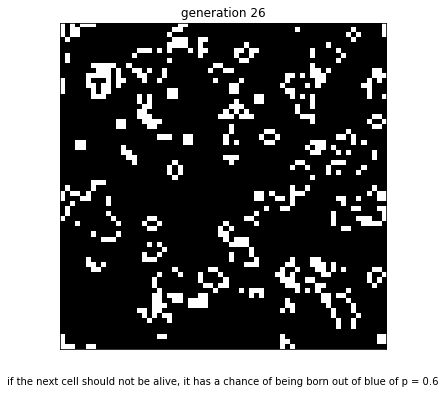

total population: 529


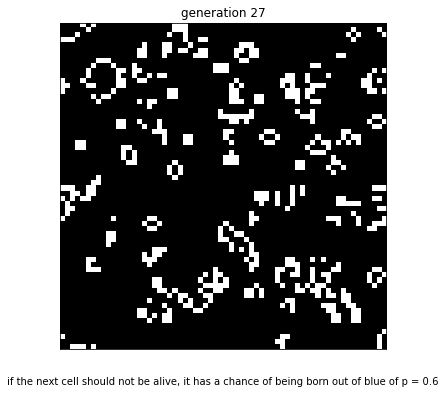

total population: 517


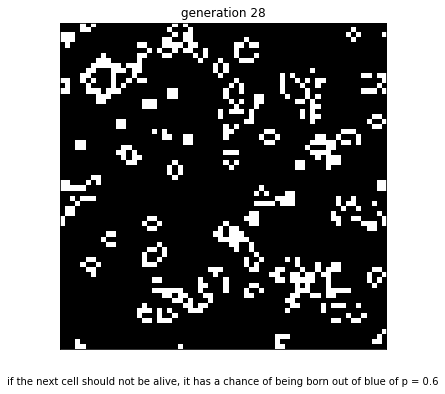

total population: 541


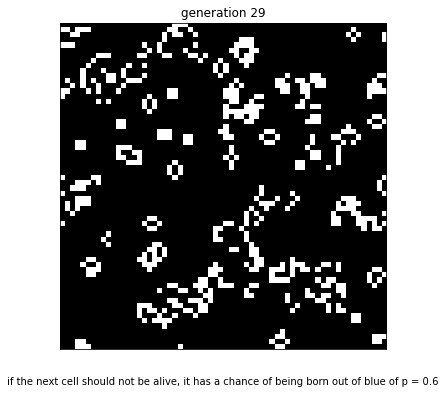

total population: 540


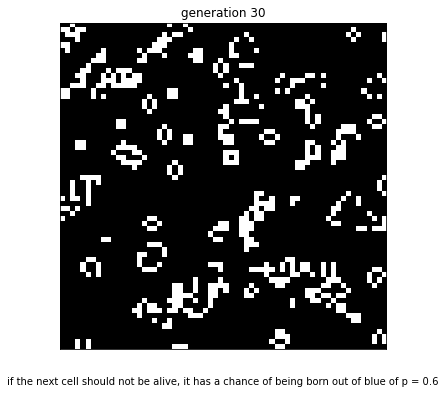

total population: 538


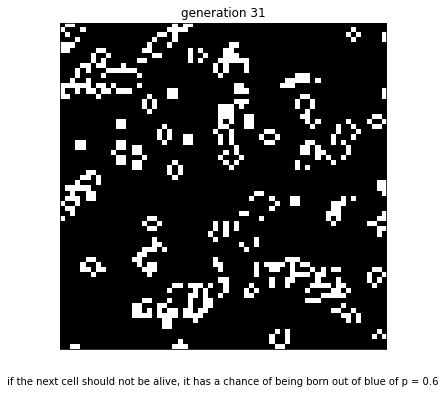

total population: 529


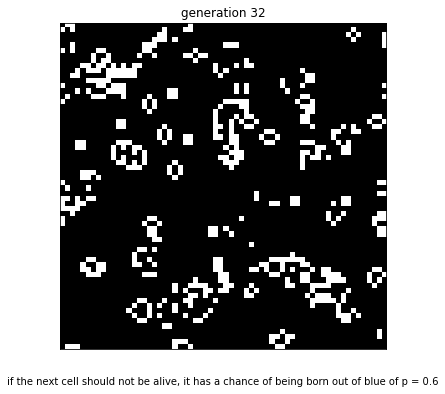

total population: 517


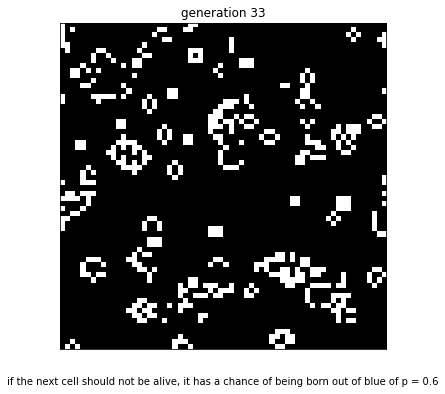

total population: 498


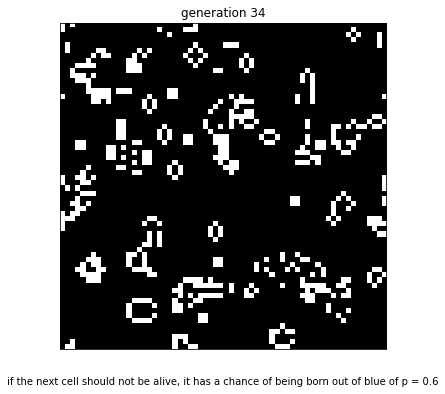

total population: 490


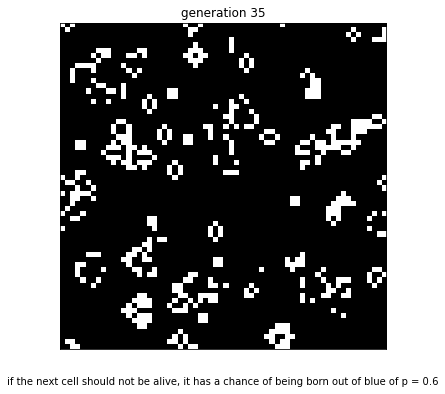

total population: 475


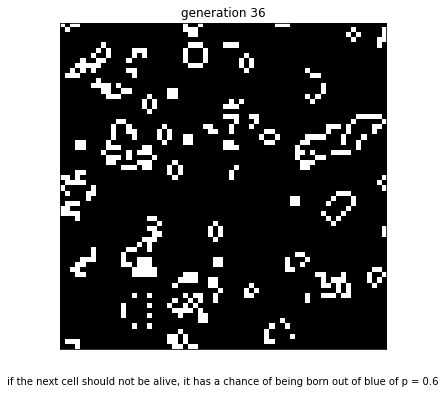

total population: 443


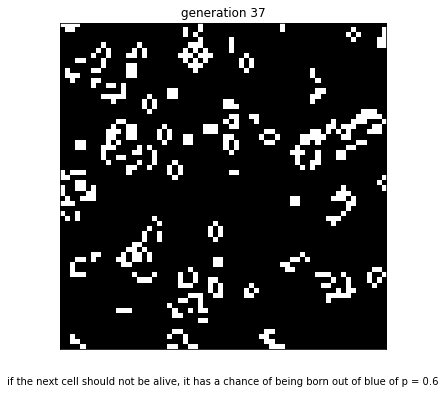

total population: 452


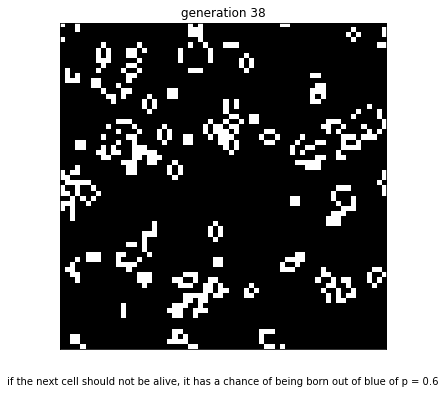

total population: 479


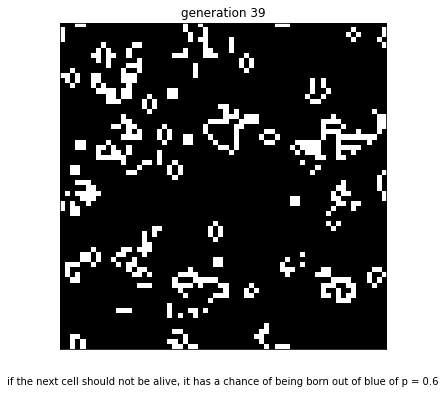

total population: 489


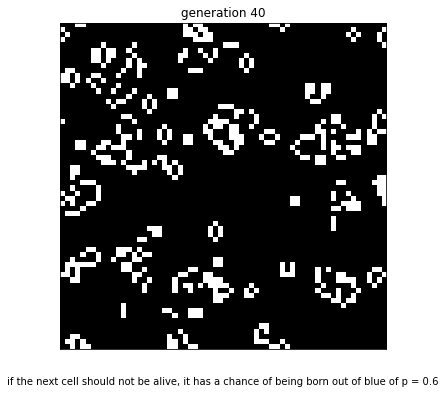

total population: 507


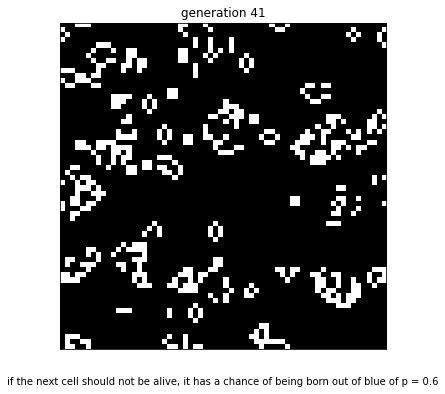

total population: 527


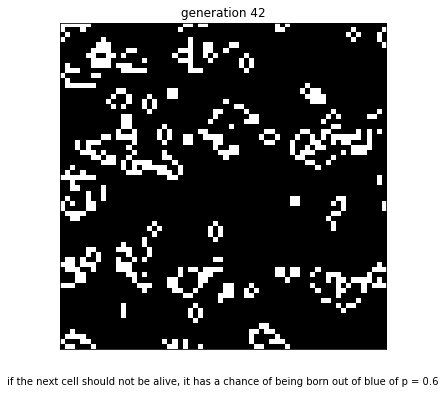

total population: 532


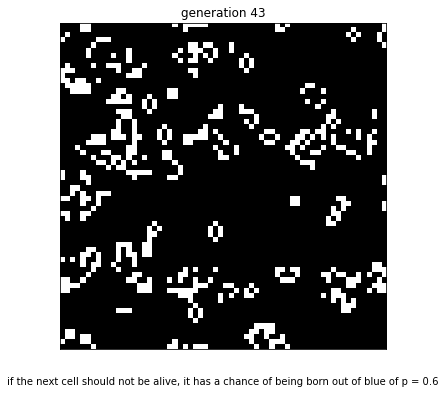

total population: 514


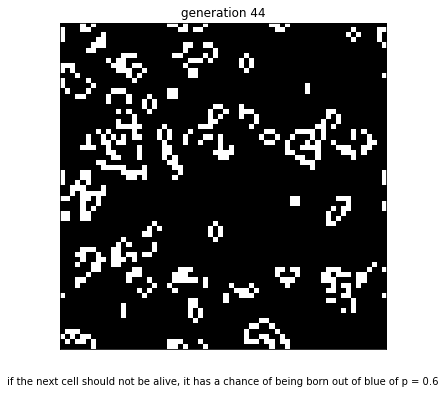

total population: 516


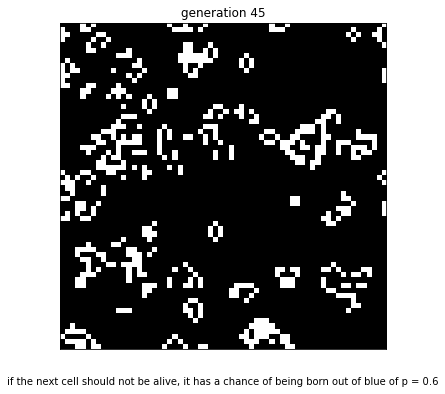

total population: 536


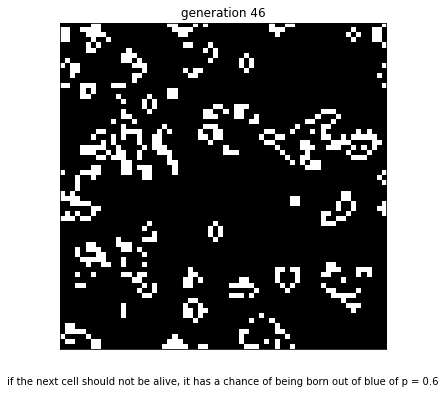

total population: 517


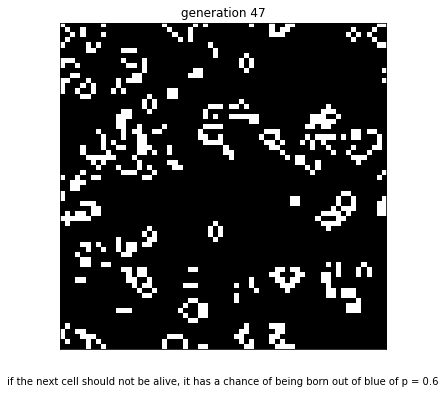

total population: 504


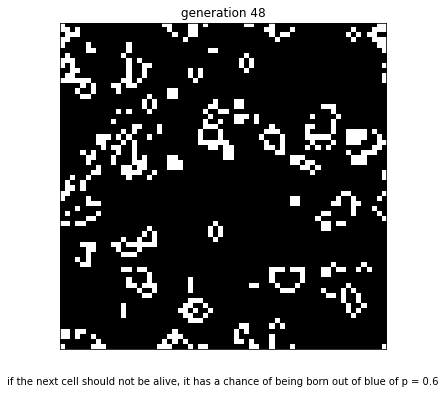

total population: 505


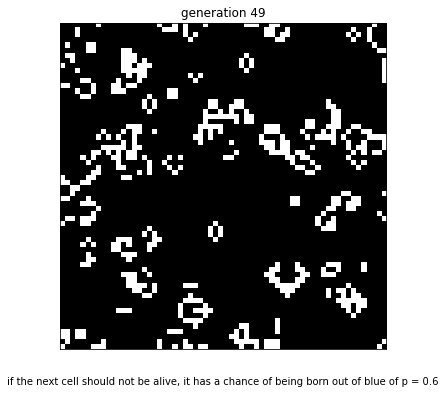

total population: 531


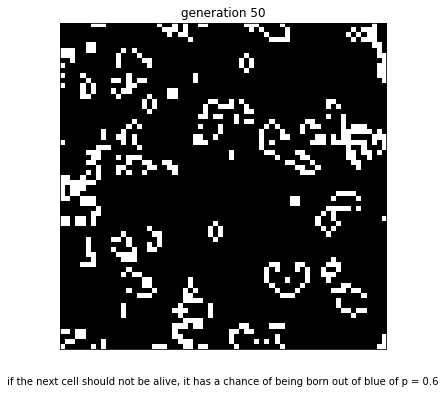

total population: 513


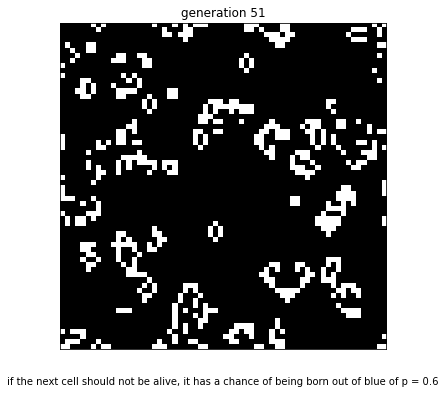

total population: 547


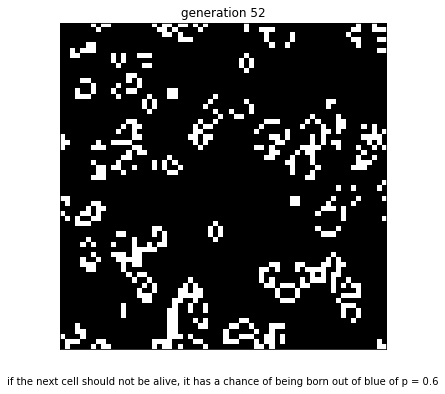

total population: 526


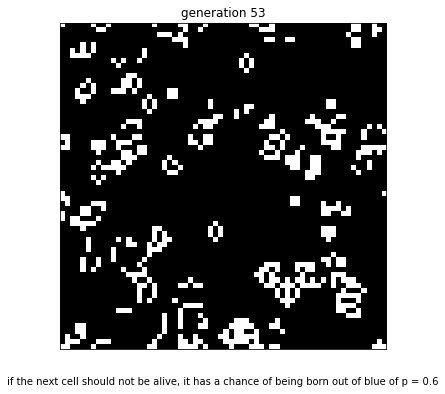

total population: 536


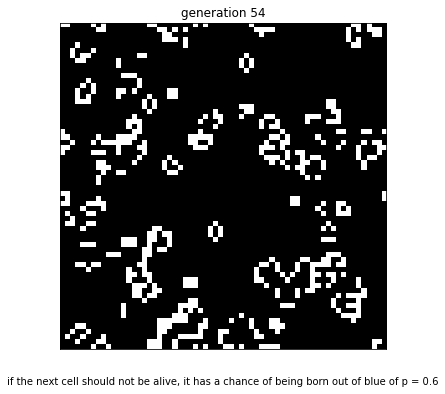

total population: 514


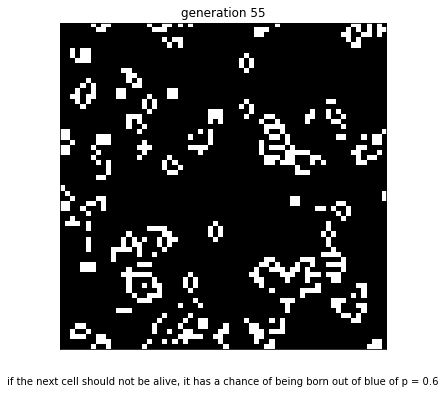

total population: 501


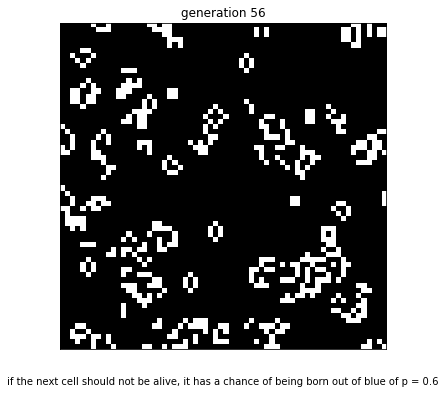

total population: 532


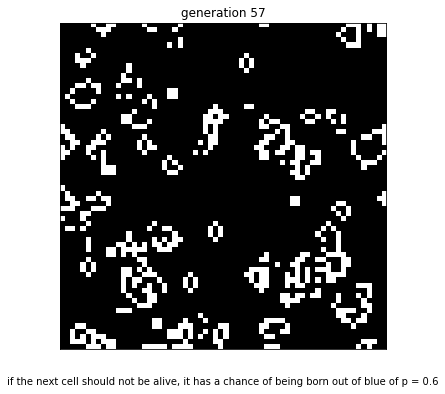

total population: 559


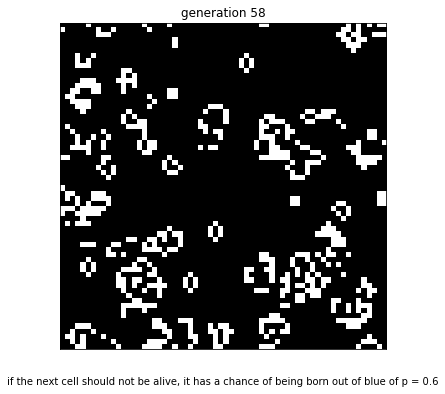

total population: 570


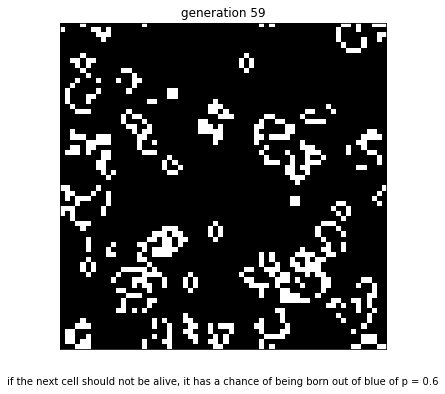

total population: 555


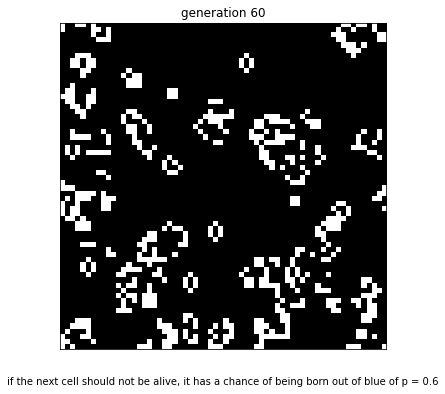

total population: 567


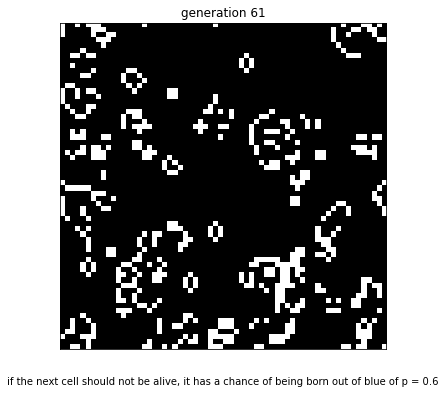

total population: 531


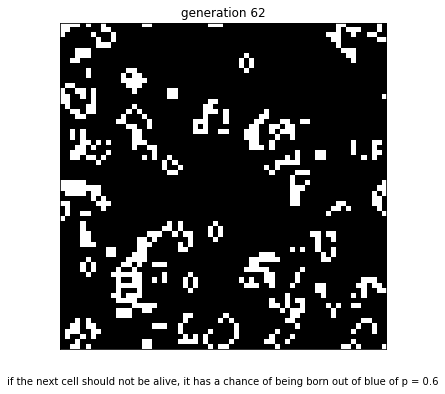

total population: 565


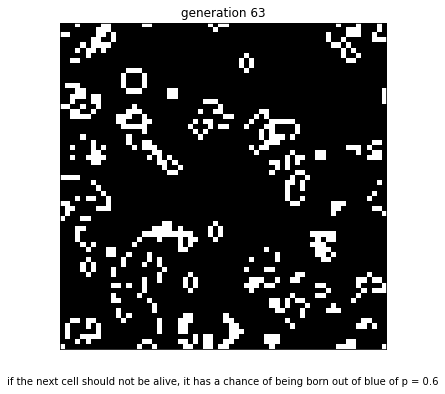

total population: 525


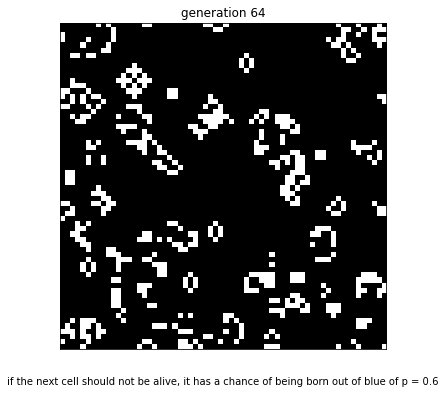

total population: 529


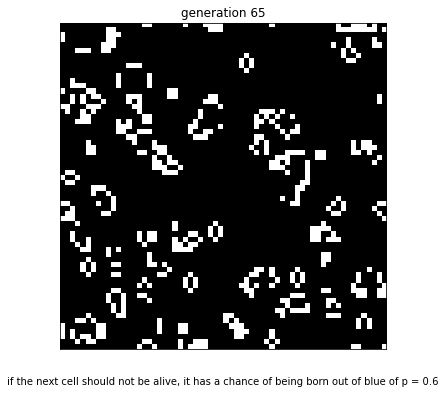

total population: 501


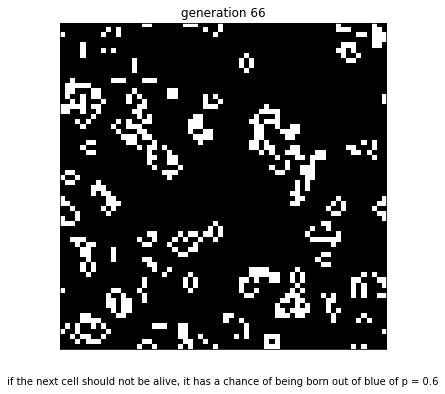

total population: 538


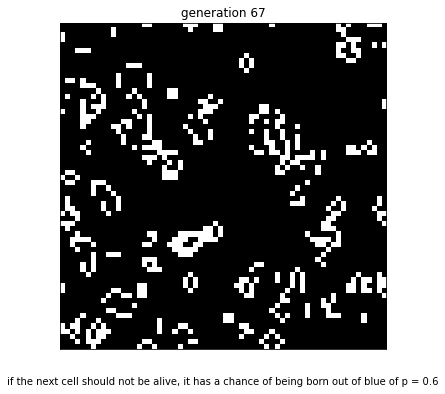

total population: 501


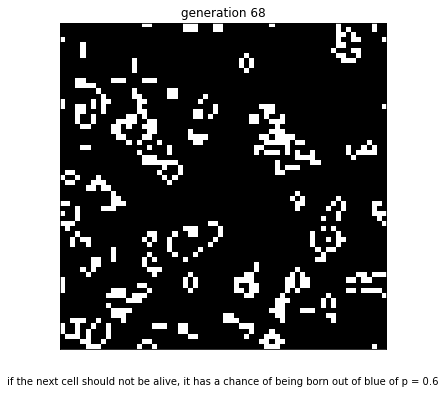

total population: 503


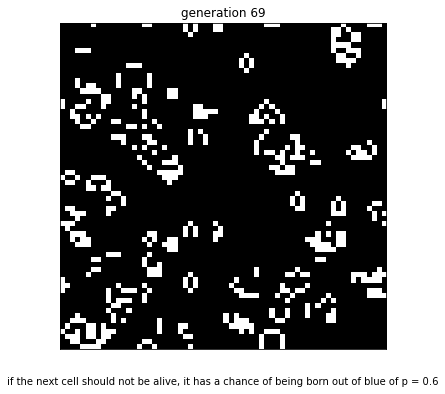

total population: 497


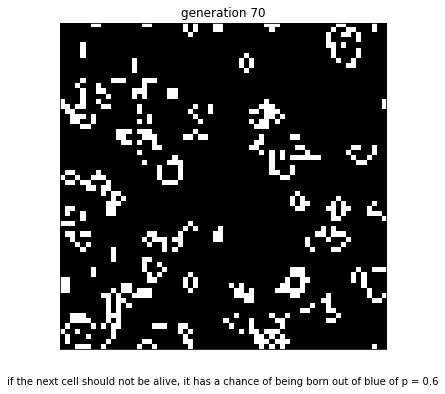

total population: 492


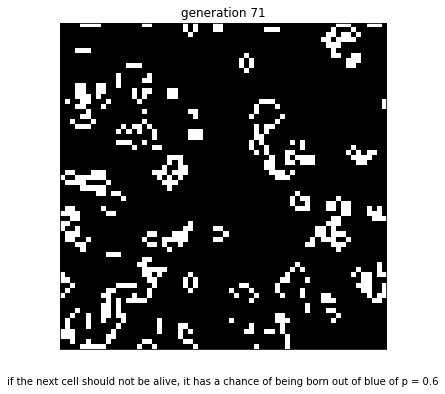

total population: 510


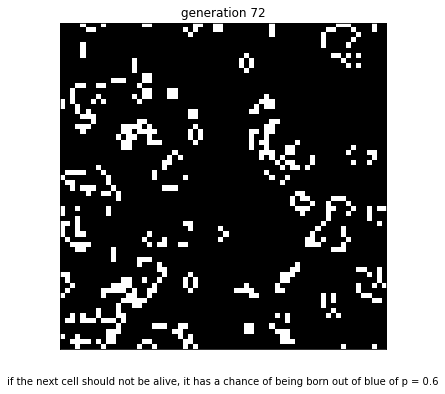

total population: 453


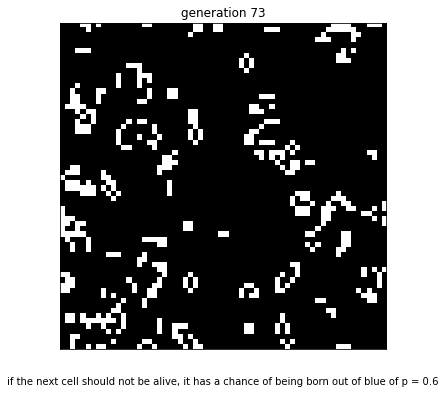

total population: 456


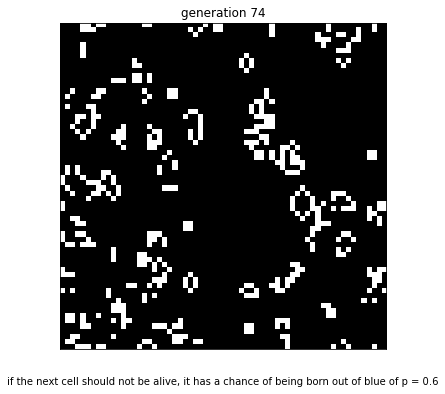

total population: 440


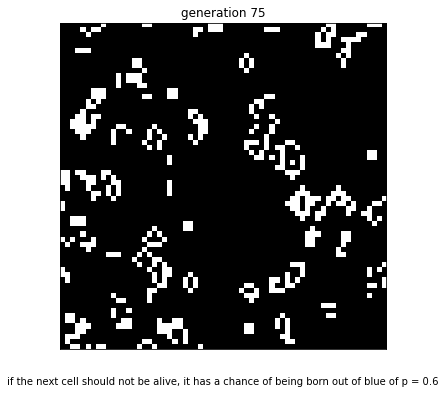

total population: 450


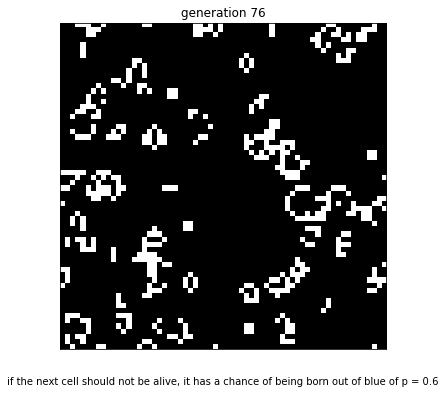

total population: 464


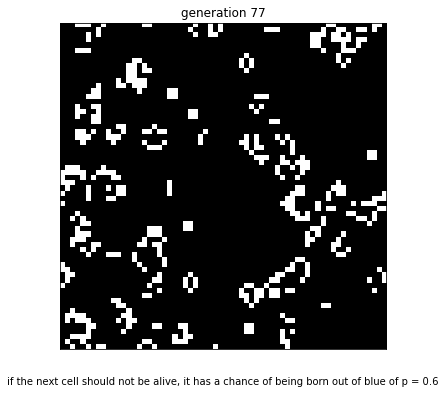

total population: 456


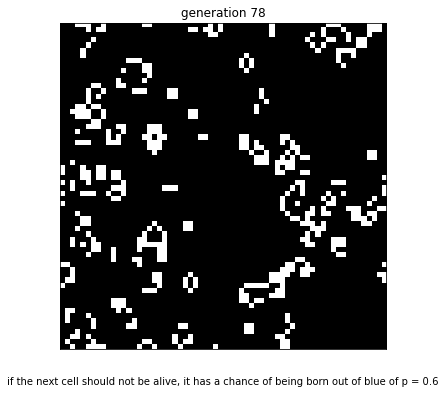

total population: 471


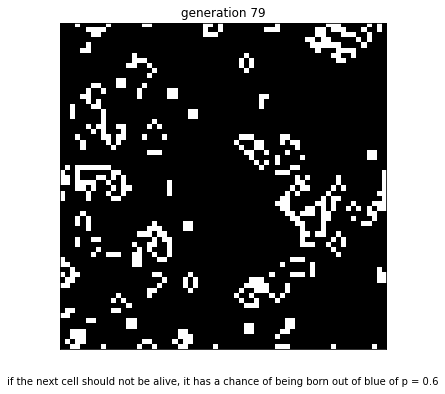

total population: 476


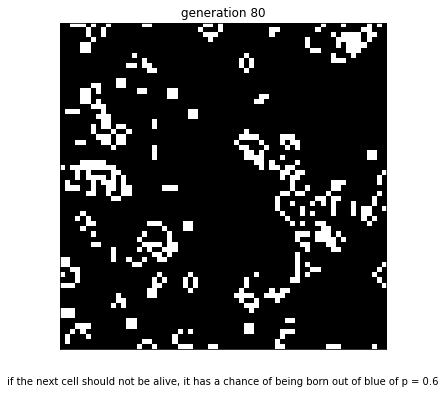

total population: 476


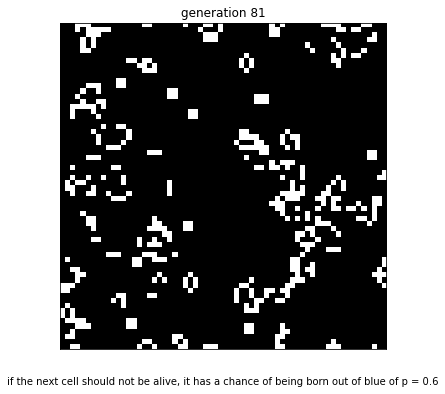

total population: 447


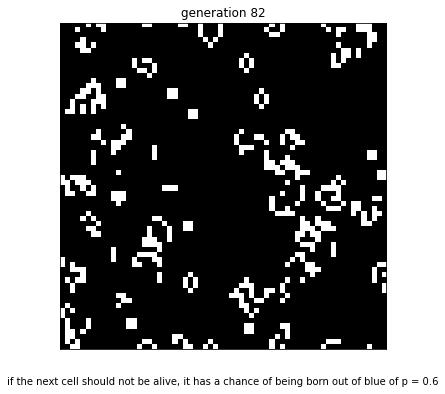

total population: 443


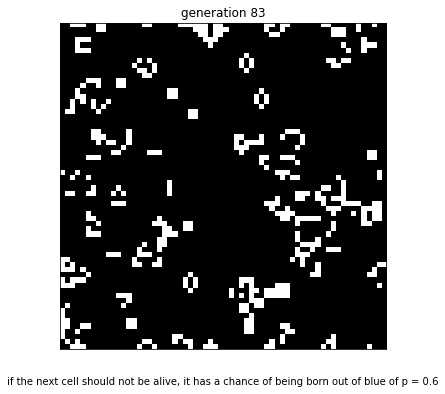

total population: 445


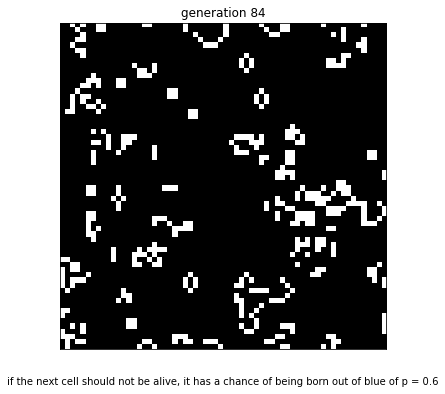

total population: 433


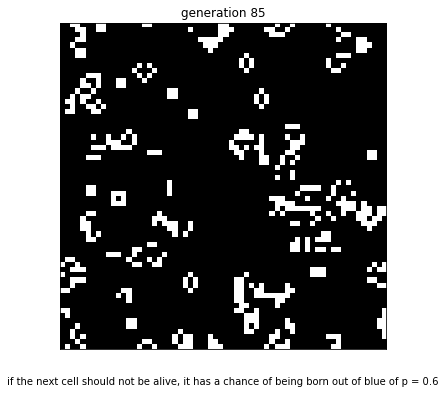

total population: 467


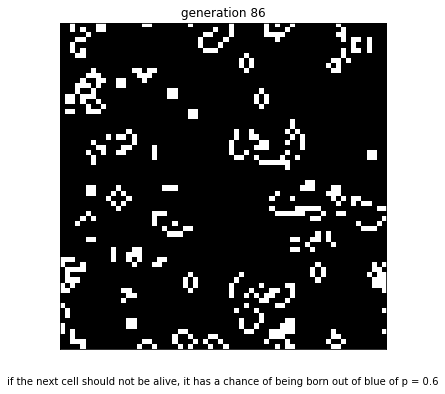

total population: 430


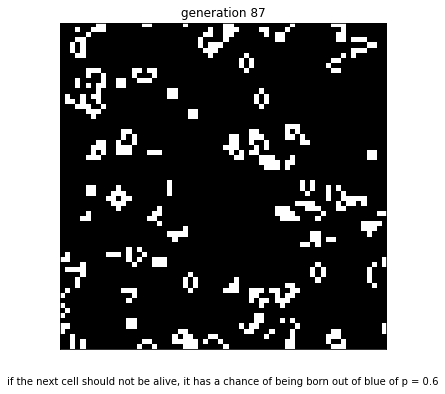

total population: 450


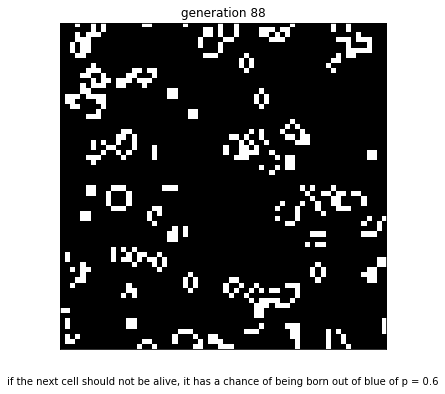

total population: 452


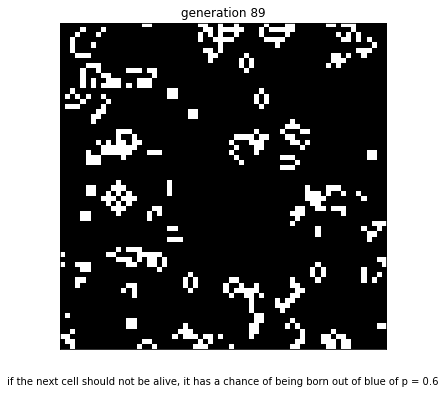

total population: 465


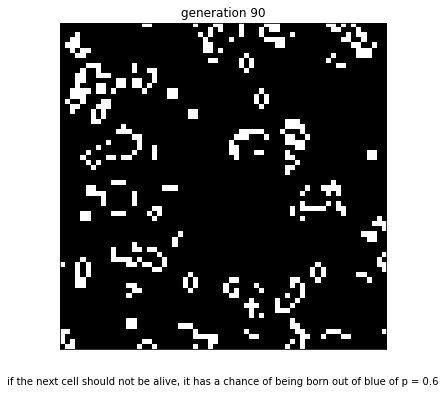

total population: 420


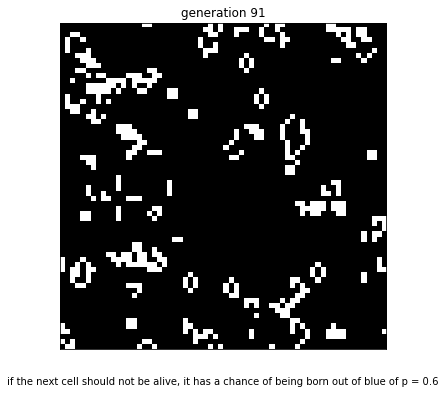

total population: 442


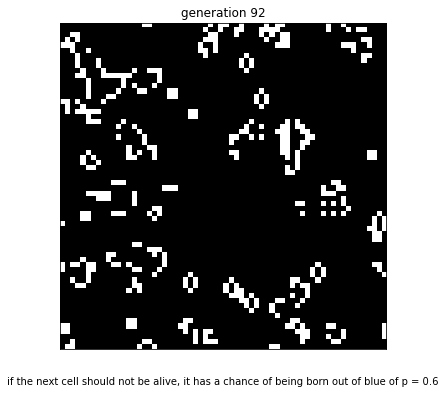

total population: 404


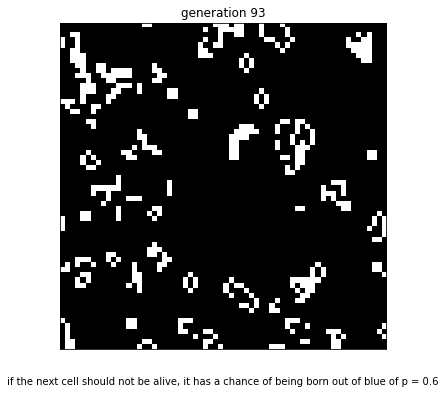

total population: 432


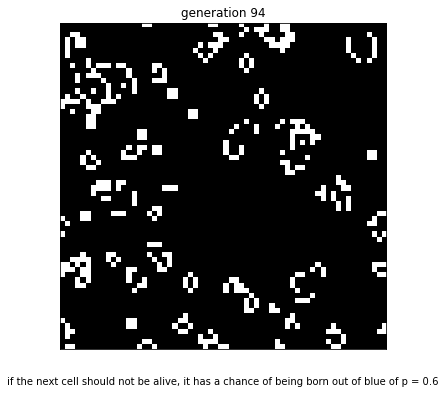

total population: 407


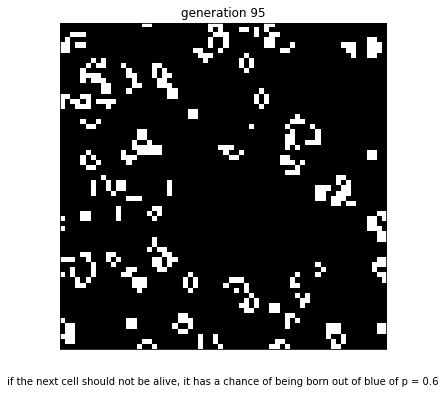

total population: 432


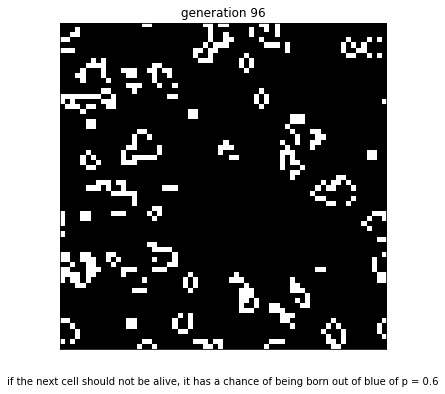

total population: 435


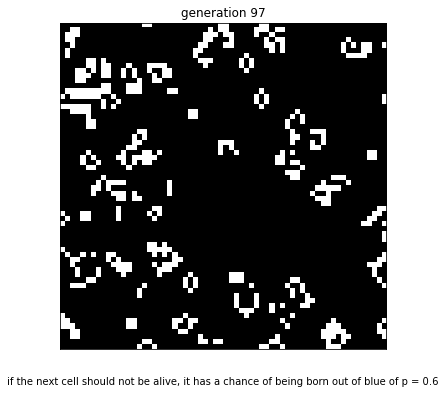

total population: 470


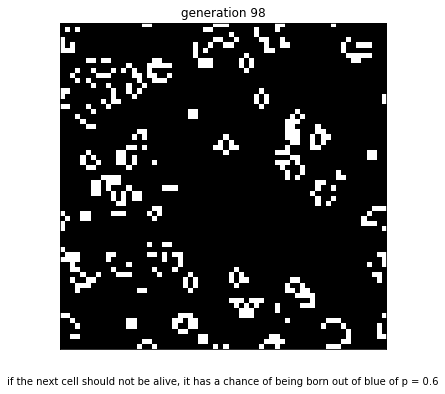

total population: 433


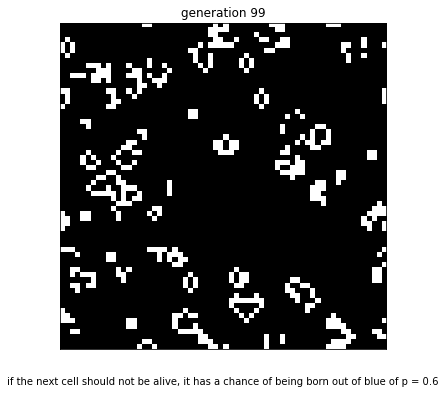

total population: 452


In [101]:
n = 64
t = 100
p = 0.6
pop6 = []
tt = [i for i in range(t)]
initial_world = np.random.randint(2, size=(n, n))
new_generation = random_next_generation(initial_world, p)
for _ in range(t):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(new_generation, cmap='gray')
    plt.title(f'generation {_}')
    plt.xticks([])
    plt.yticks([])
    caption_text = "if the next cell should not be alive, it has a chance of being born out of blue of p = 0.6"
    plt.text(0.5, -0.1, caption_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)
    plt.savefig(f'/Users/Mahyar/Desktop/conway/11/{_}.png', dpi=100)  # save to folder 11
    plt.show()
    population = np.sum(new_generation)
    pop6.append(population)
    print(f'total population: {population}')
    new_generation = next_generation_p(new_generation)

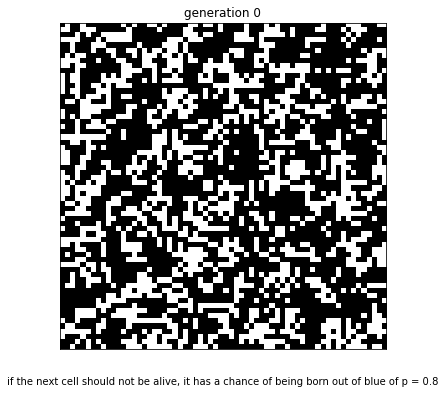

total population: 1528


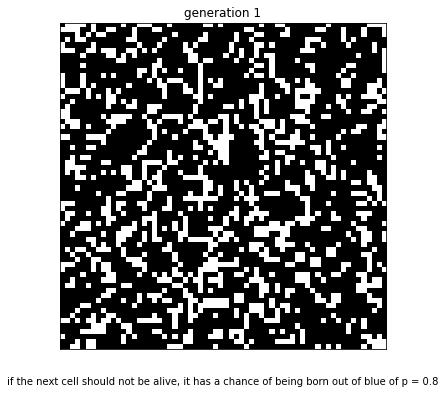

total population: 1133


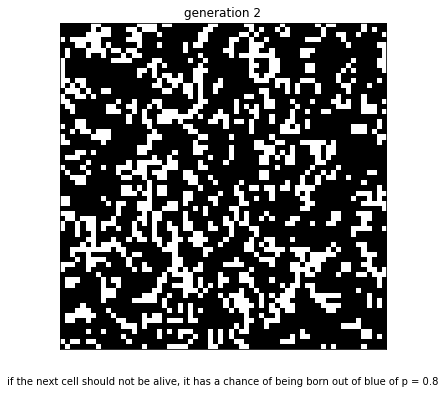

total population: 1134


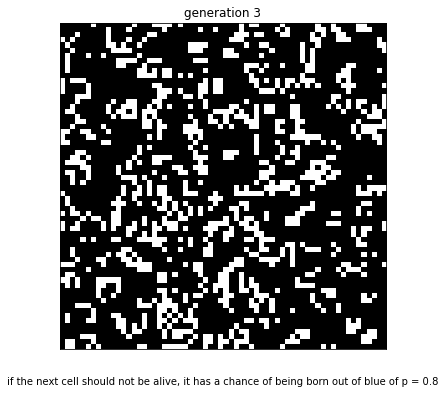

total population: 1003


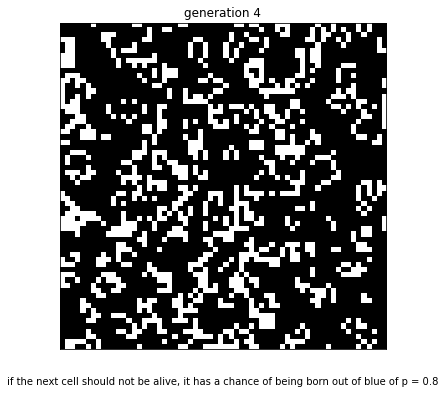

total population: 1026


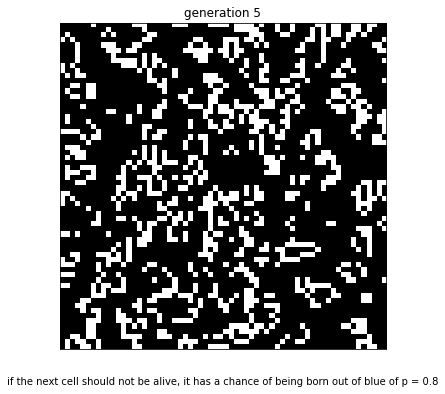

total population: 998


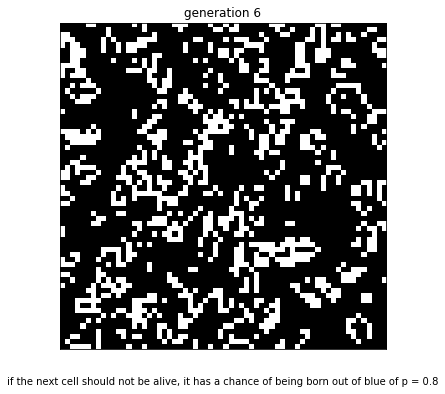

total population: 1008


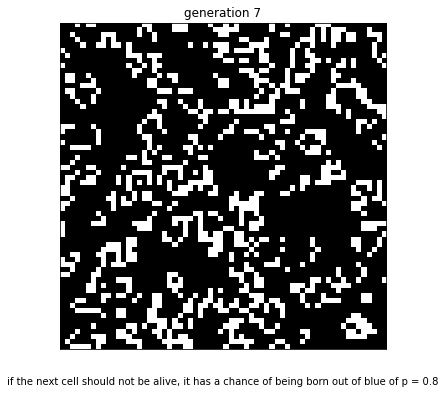

total population: 942


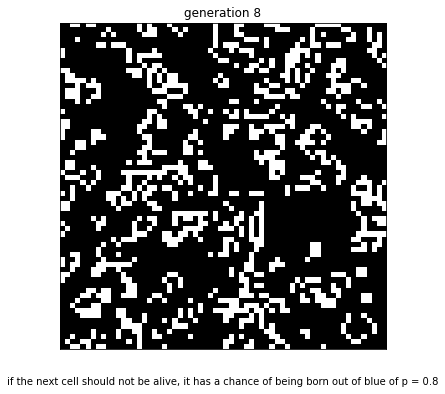

total population: 943


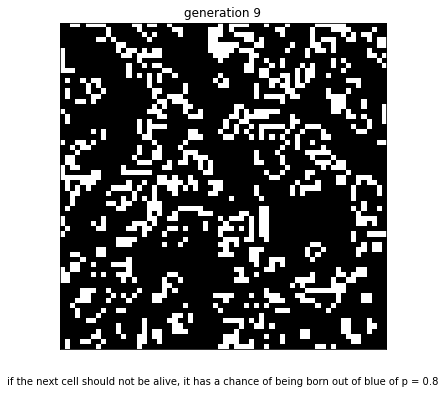

total population: 915


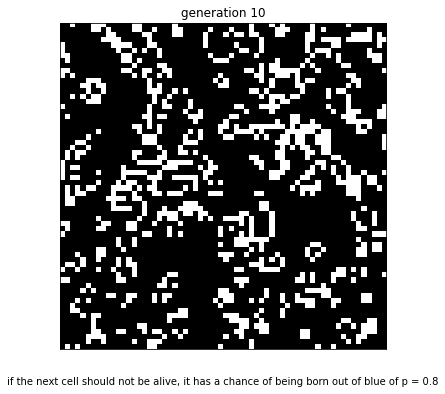

total population: 888


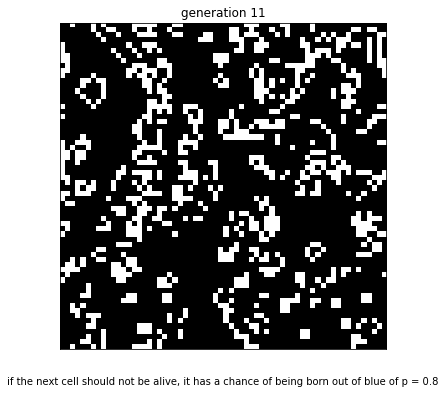

total population: 868


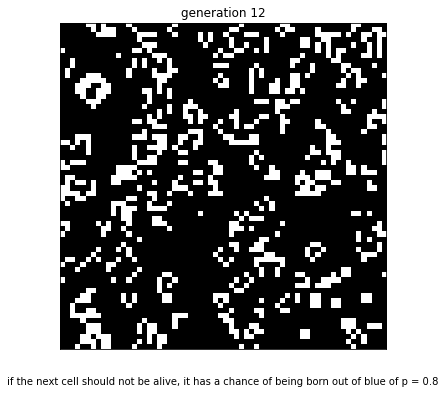

total population: 791


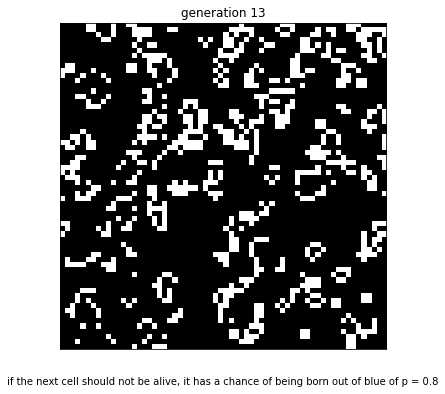

total population: 785


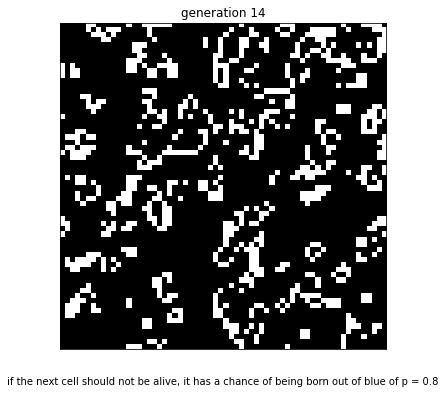

total population: 766


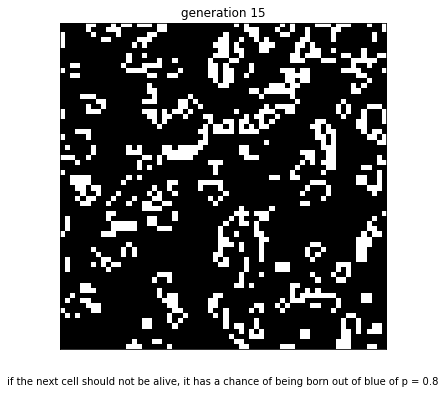

total population: 775


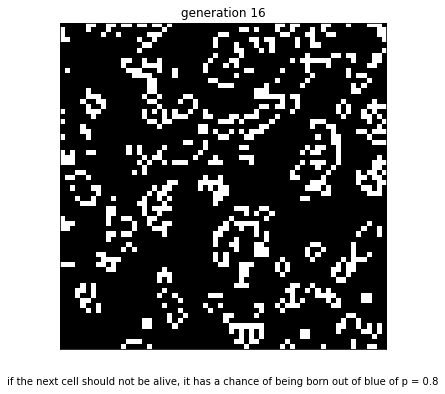

total population: 711


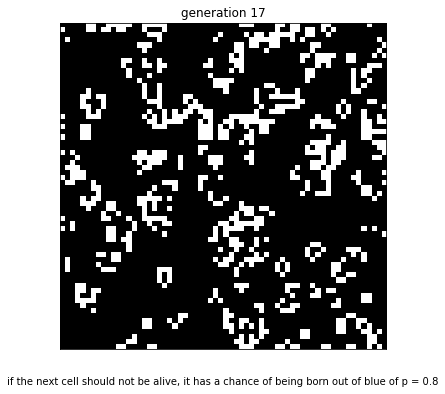

total population: 754


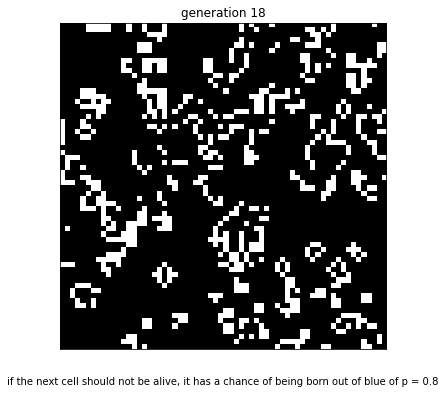

total population: 704


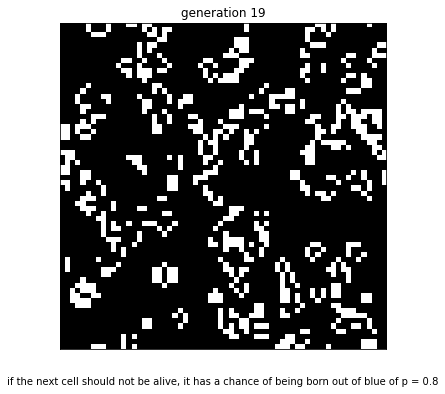

total population: 710


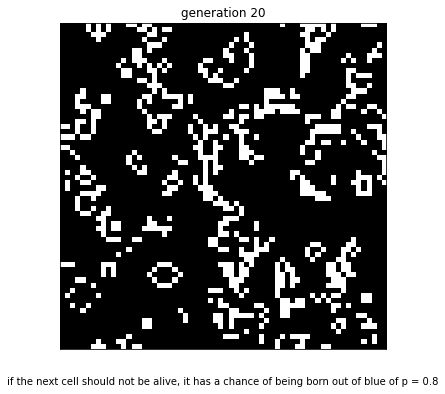

total population: 718


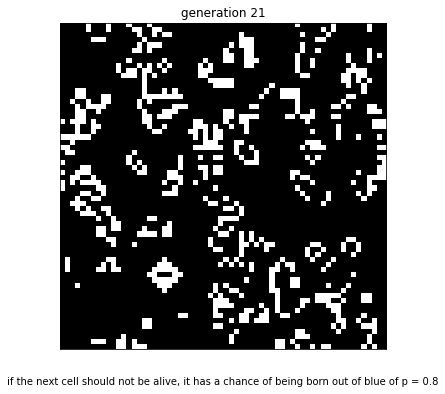

total population: 665


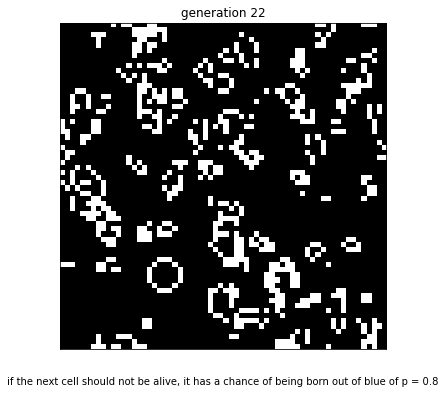

total population: 660


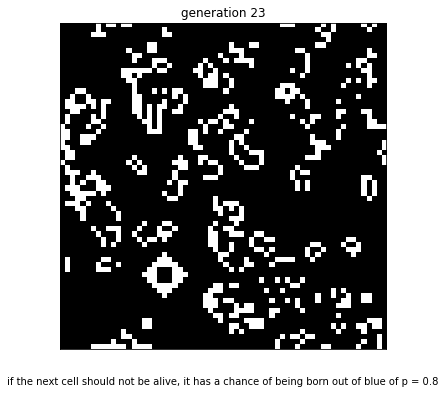

total population: 638


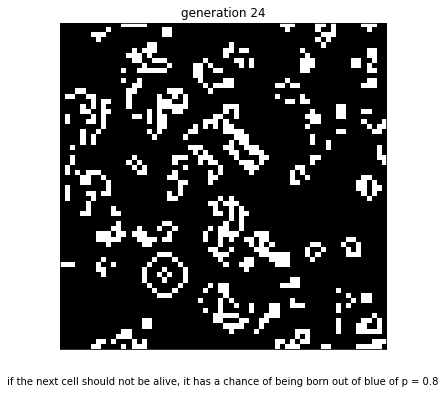

total population: 646


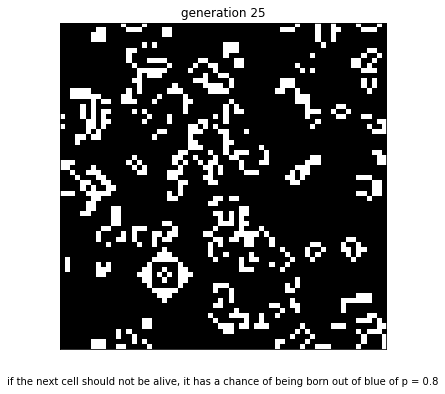

total population: 648


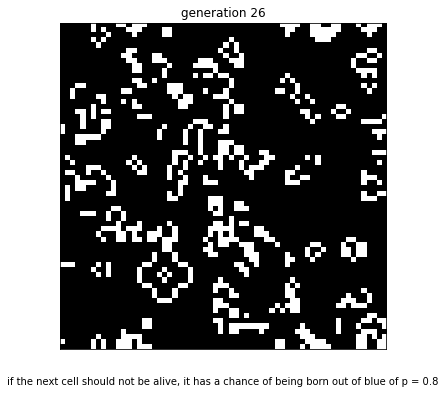

total population: 661


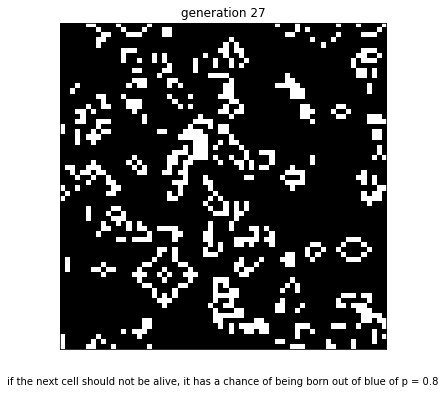

total population: 649


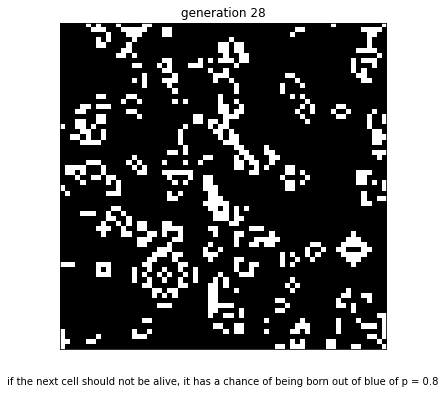

total population: 641


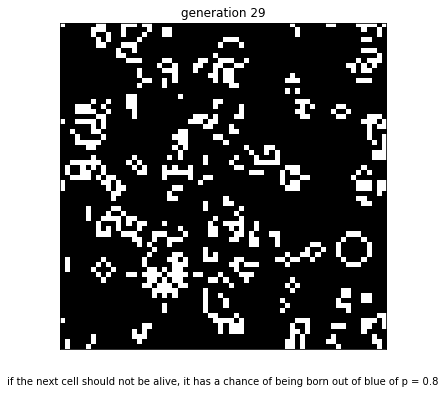

total population: 640


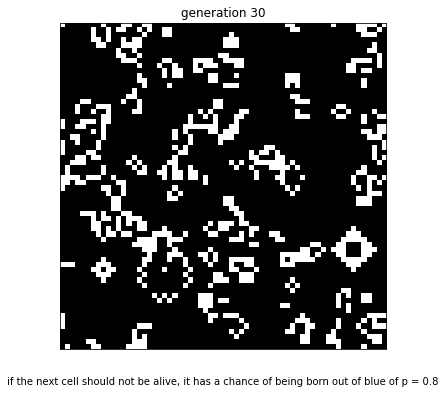

total population: 687


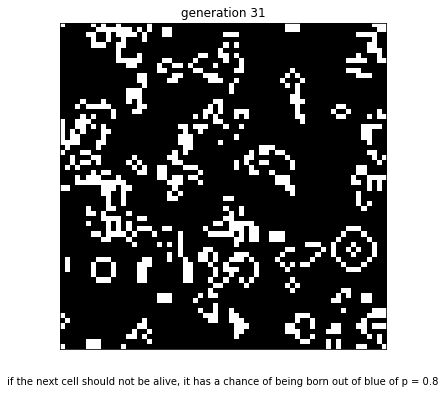

total population: 688


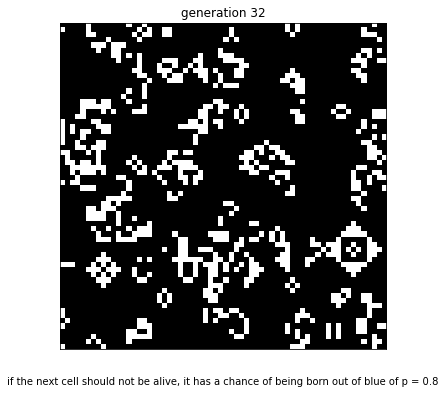

total population: 714


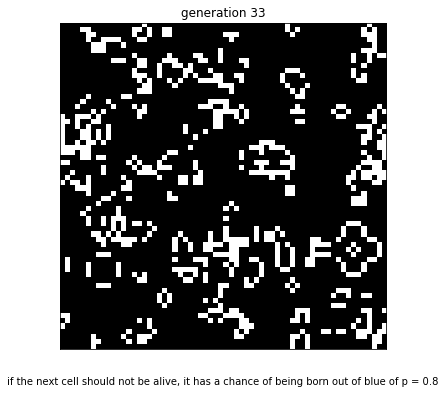

total population: 674


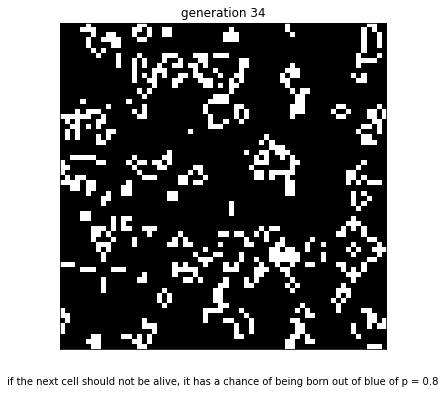

total population: 653


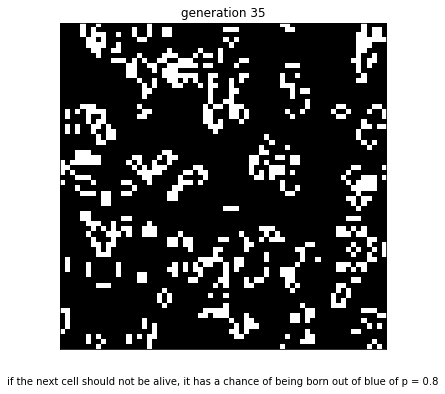

total population: 677


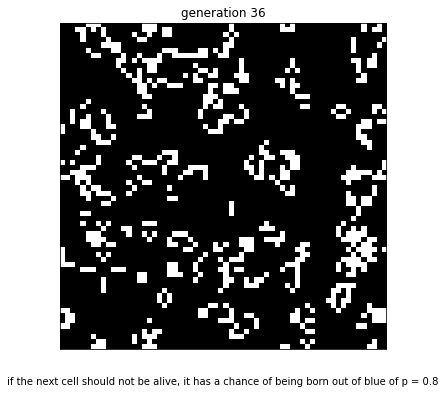

total population: 654


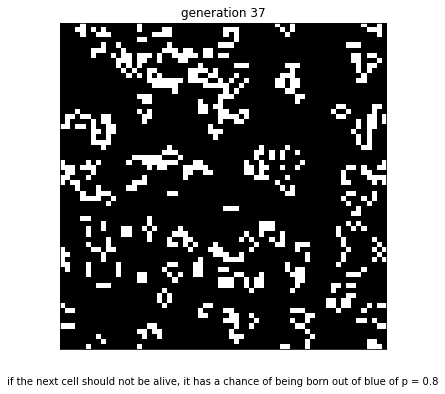

total population: 645


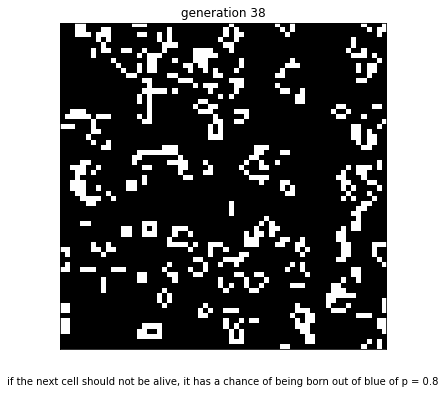

total population: 625


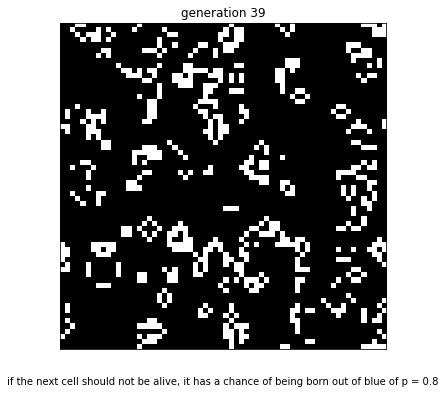

total population: 628


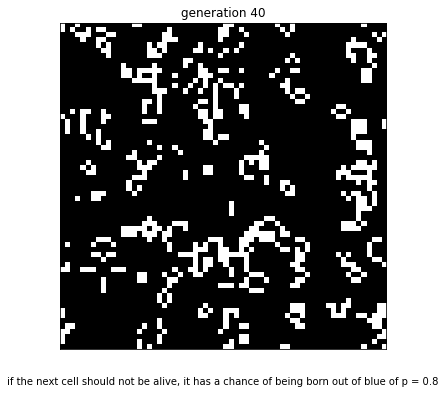

total population: 623


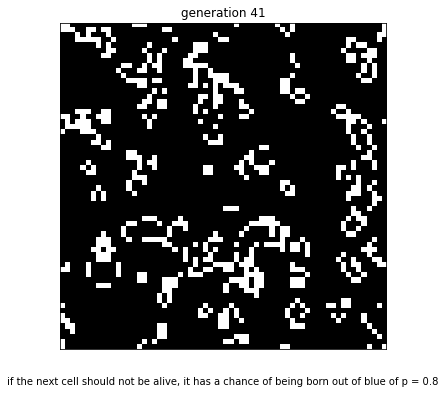

total population: 605


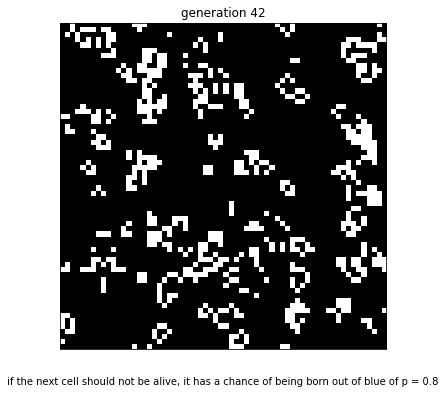

total population: 623


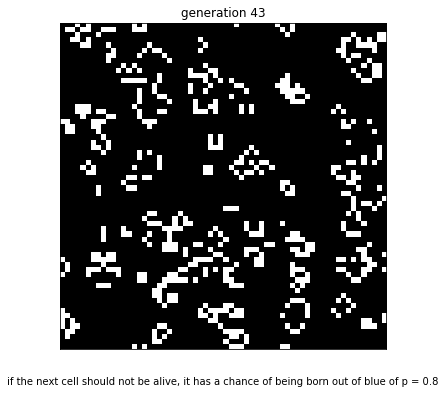

total population: 554


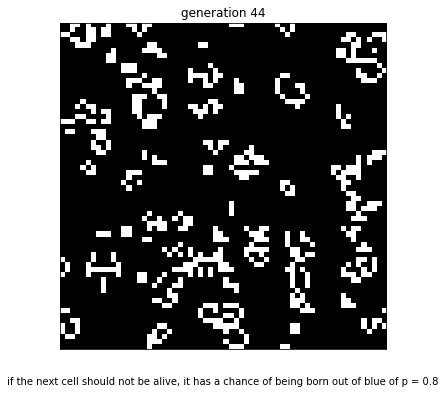

total population: 582


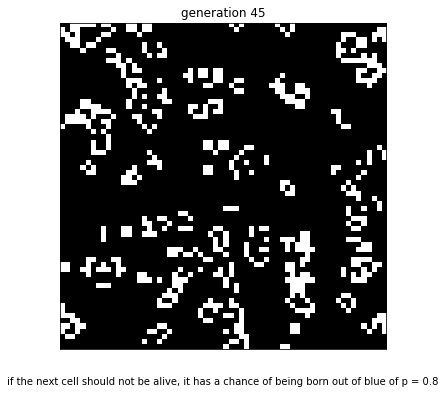

total population: 590


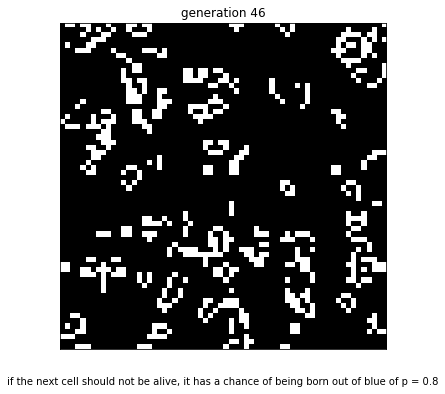

total population: 577


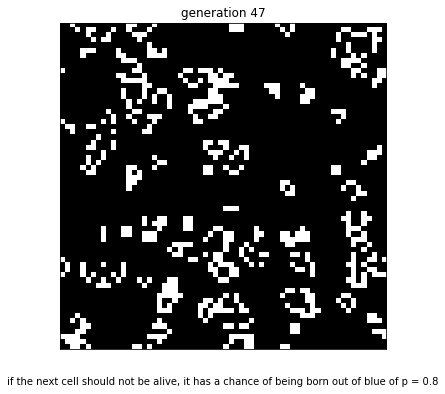

total population: 580


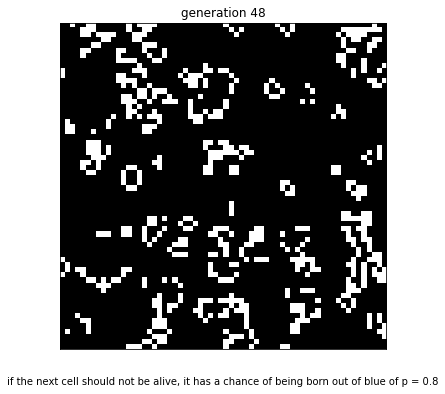

total population: 596


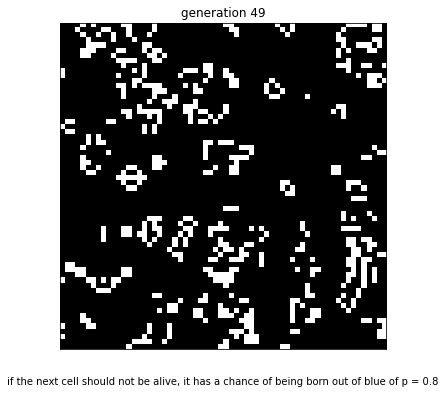

total population: 548


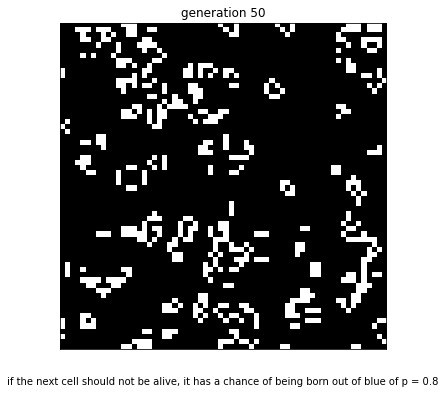

total population: 550


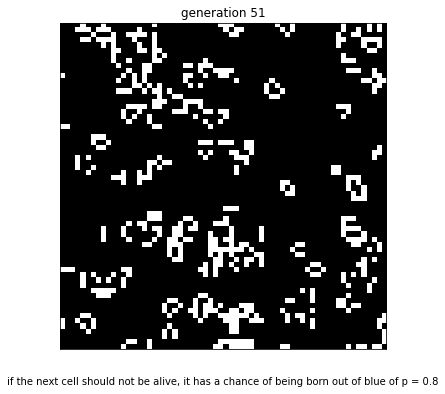

total population: 551


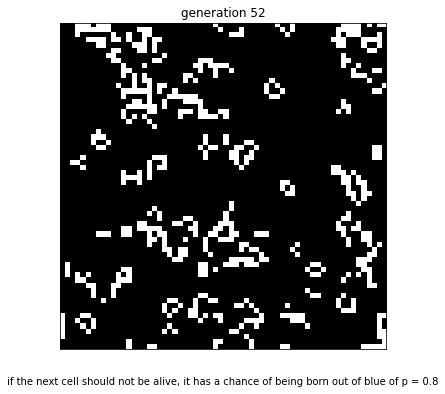

total population: 550


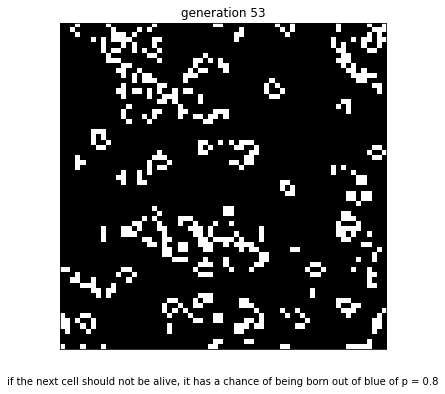

total population: 515


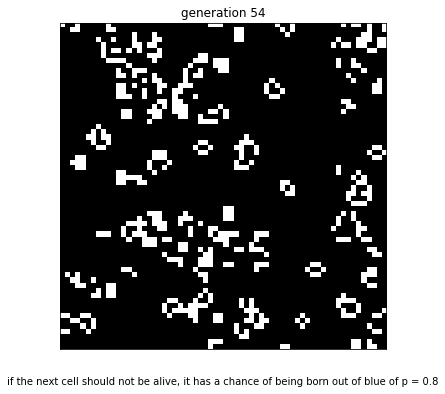

total population: 518


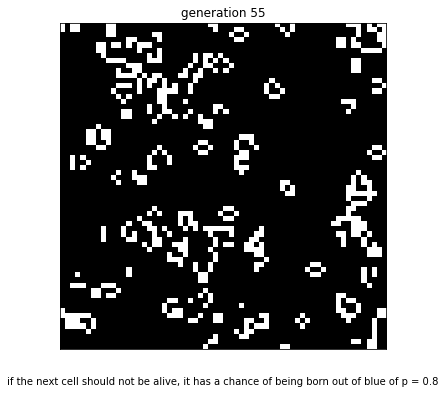

total population: 528


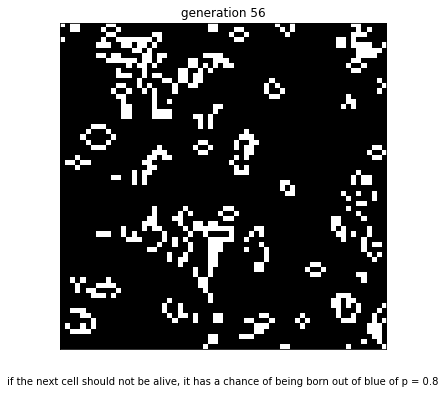

total population: 529


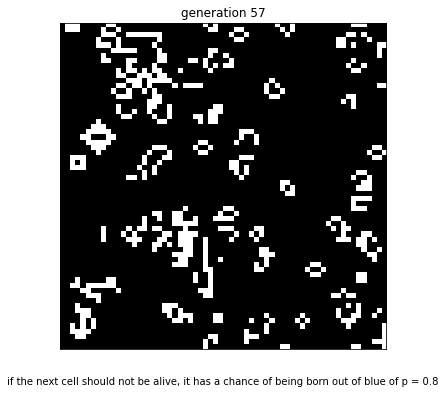

total population: 518


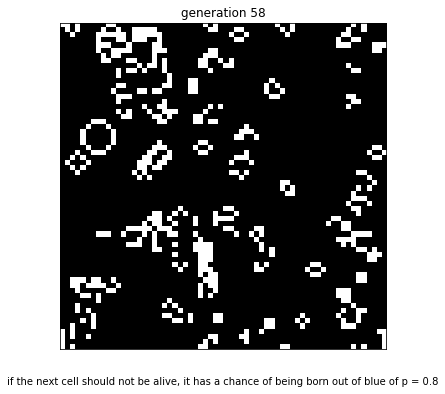

total population: 509


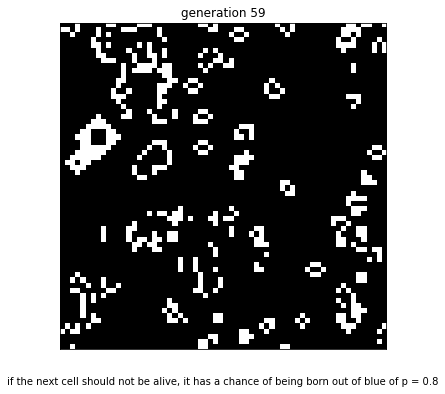

total population: 497


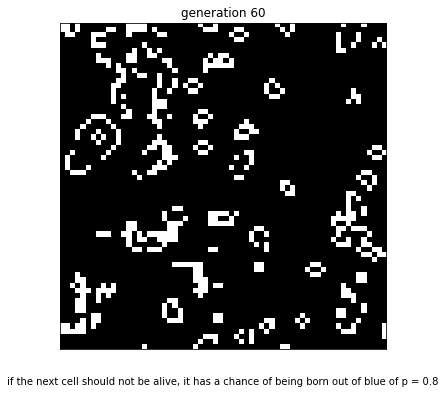

total population: 490


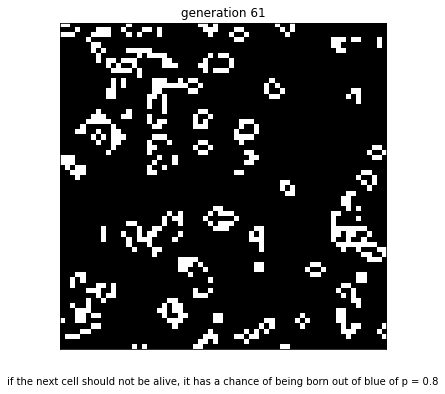

total population: 505


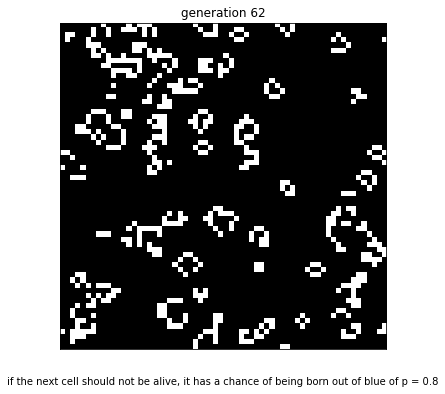

total population: 504


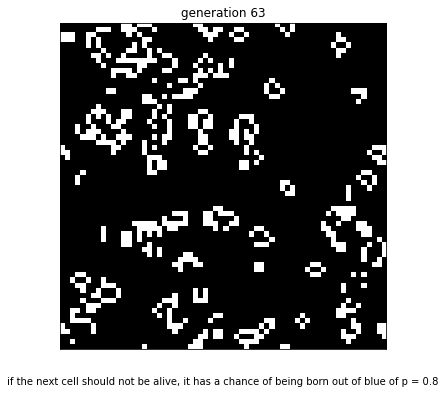

total population: 550


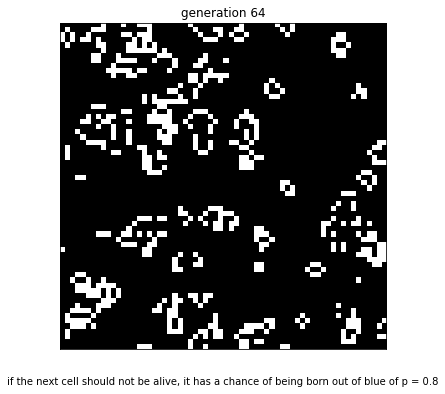

total population: 556


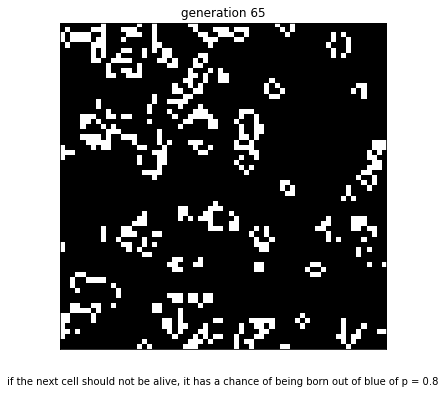

total population: 538


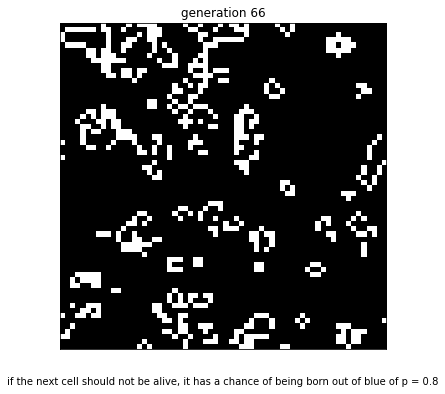

total population: 551


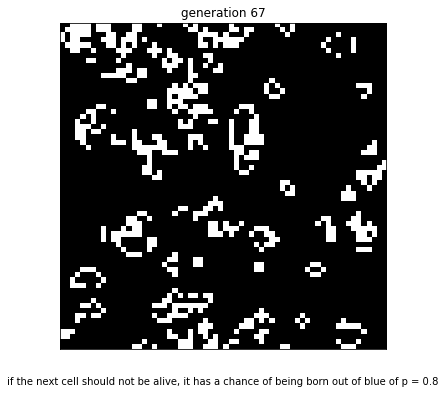

total population: 582


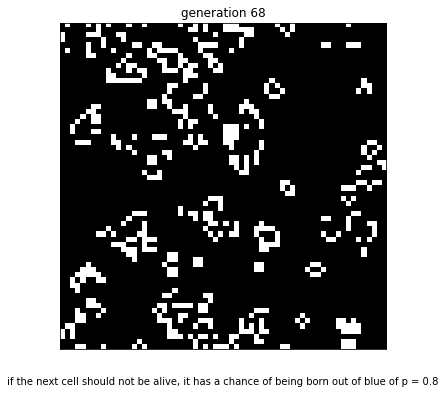

total population: 516


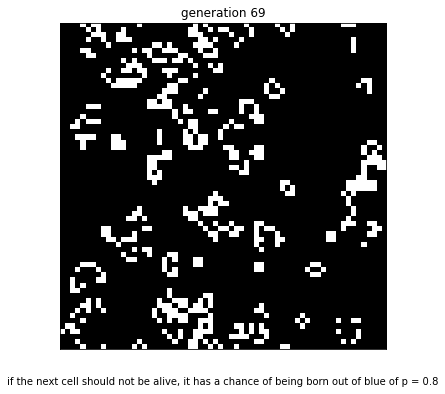

total population: 534


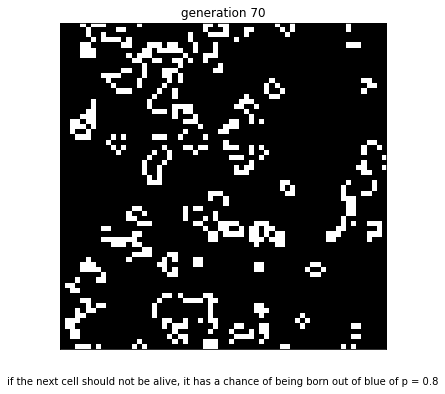

total population: 515


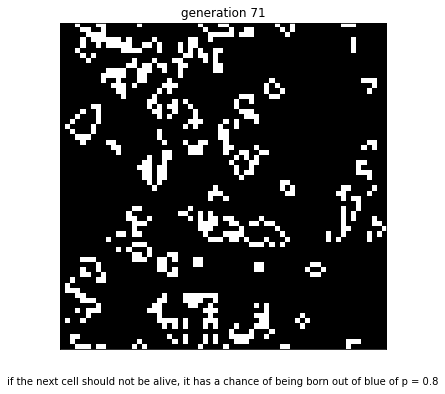

total population: 543


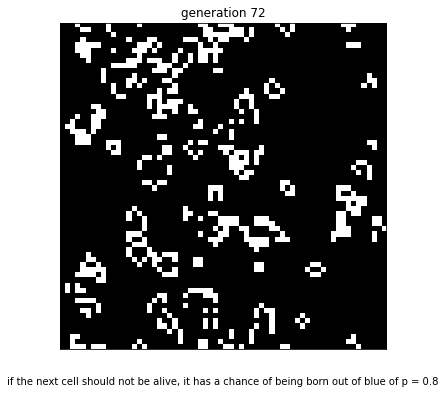

total population: 541


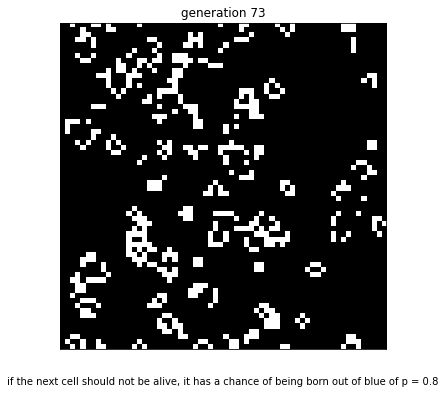

total population: 505


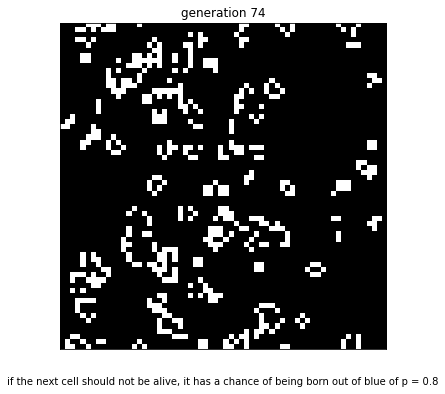

total population: 494


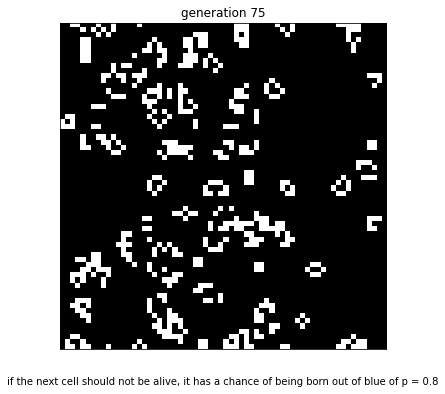

total population: 517


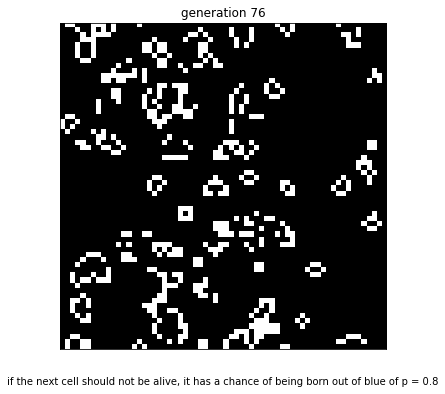

total population: 504


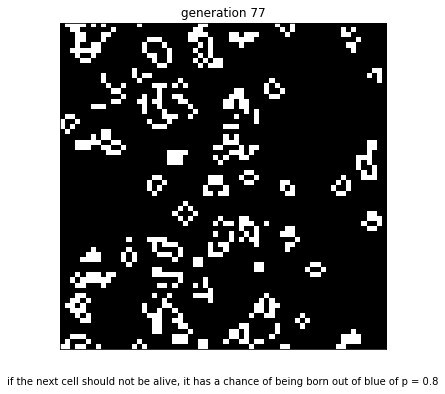

total population: 532


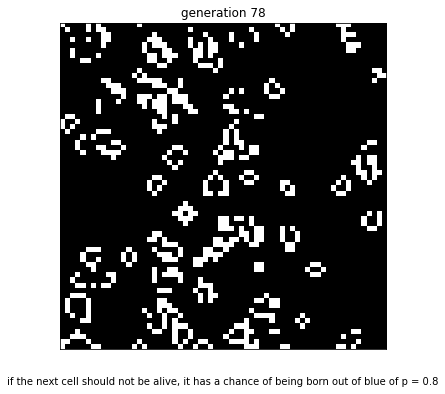

total population: 537


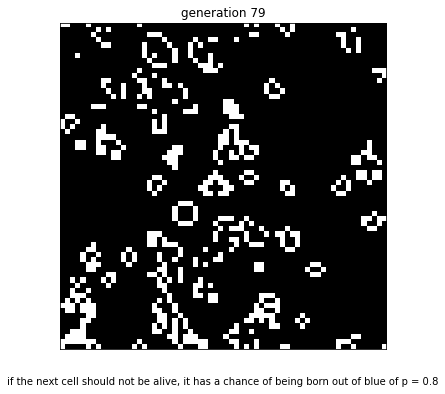

total population: 526


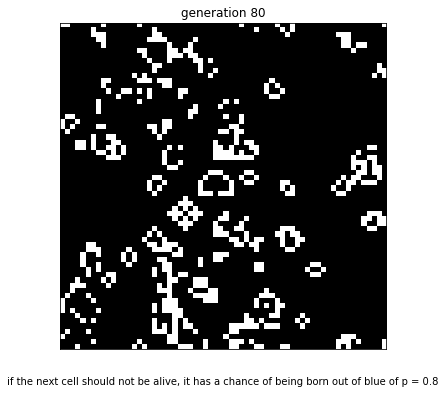

total population: 533


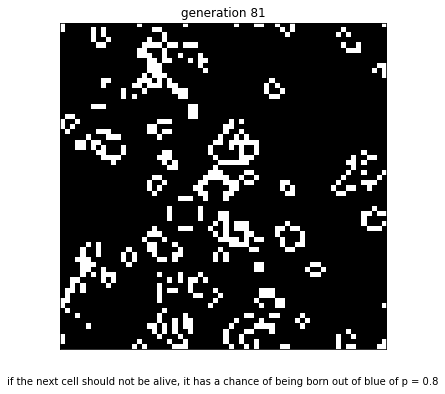

total population: 513


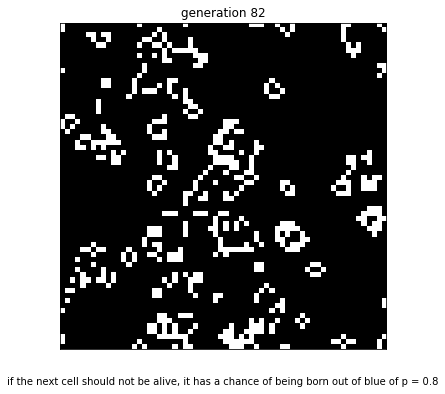

total population: 513


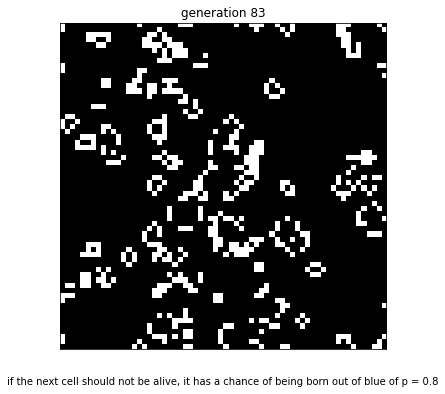

total population: 515


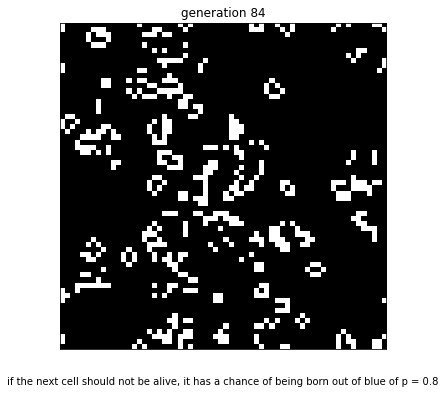

total population: 500


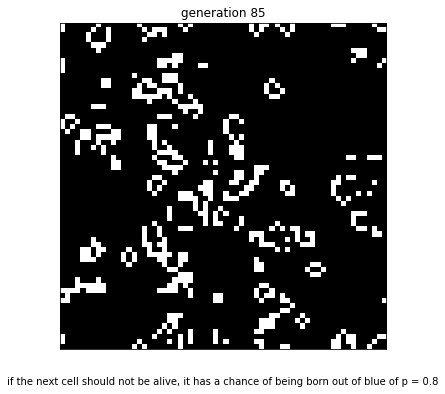

total population: 500


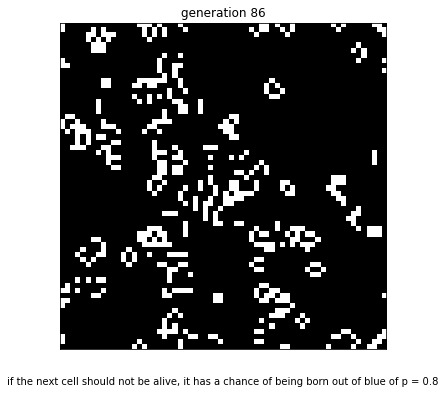

total population: 488


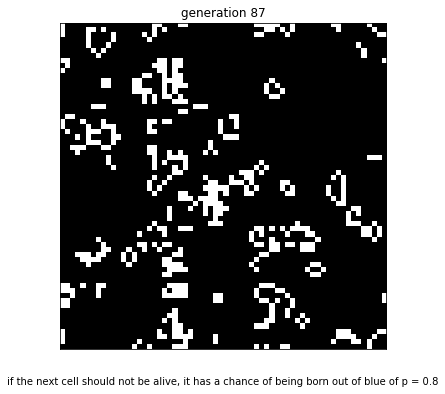

total population: 492


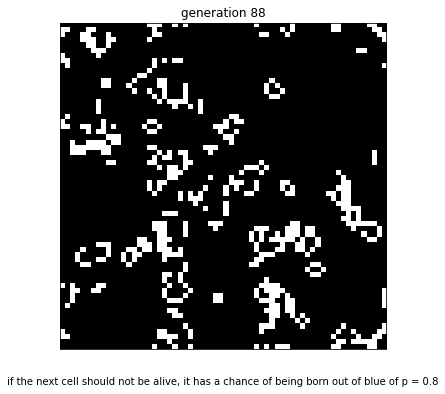

total population: 500


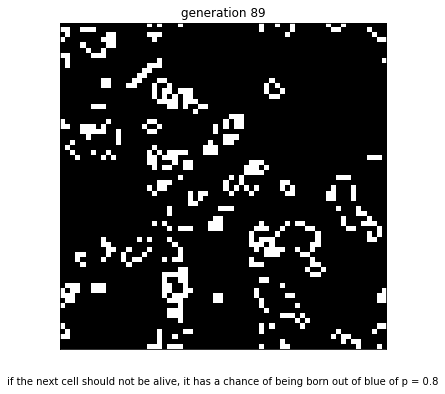

total population: 455


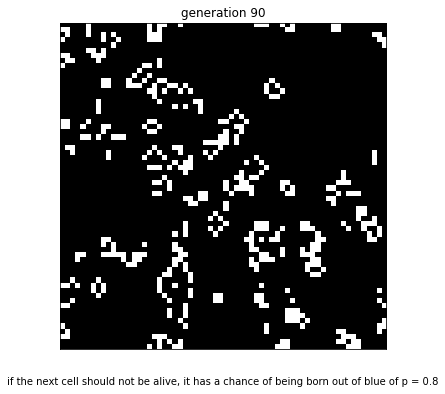

total population: 437


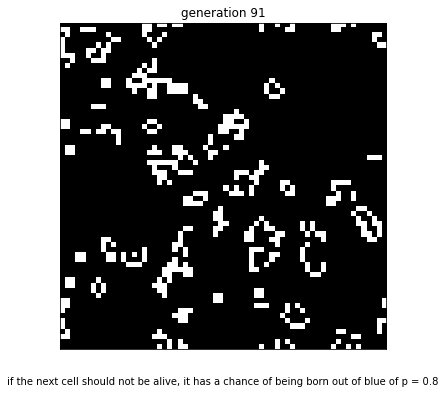

total population: 445


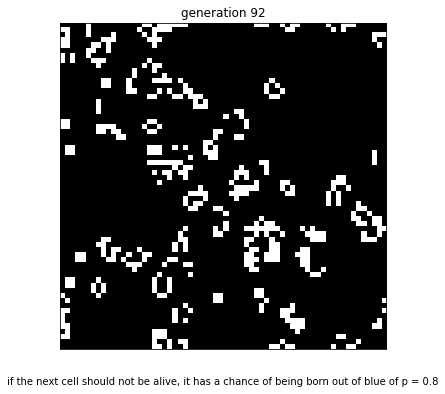

total population: 461


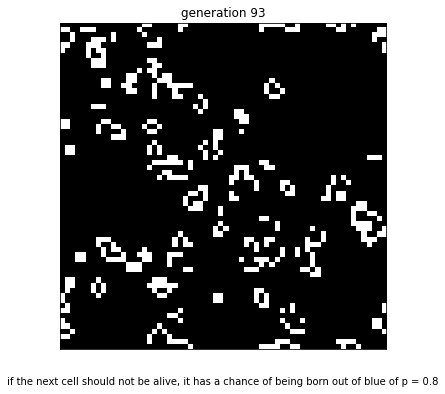

total population: 445


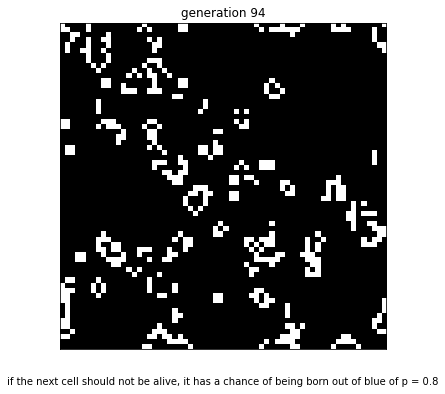

total population: 454


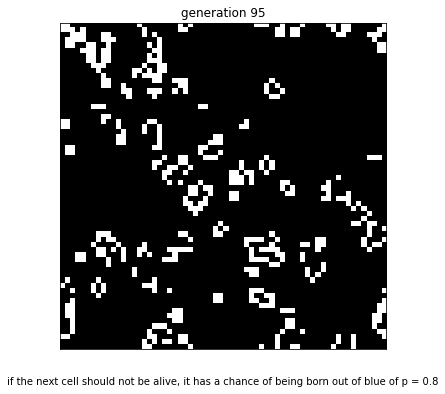

total population: 471


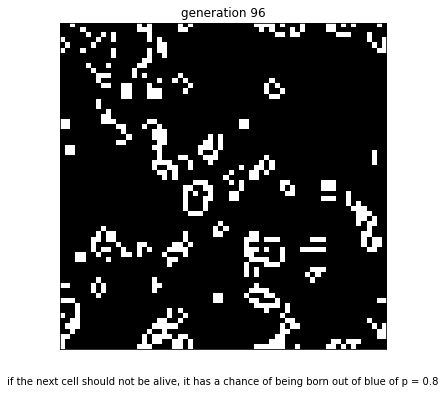

total population: 478


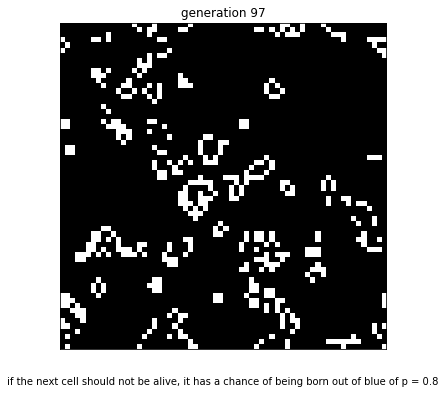

total population: 440


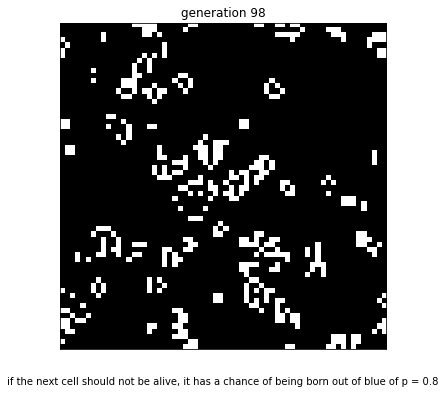

total population: 438


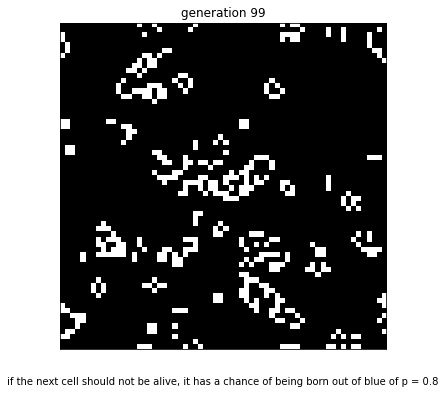

total population: 408


In [102]:
n = 64
t = 100
p = 0.8
pop8 = []
tt = [i for i in range(t)]
initial_world = np.random.randint(2, size=(n, n))
new_generation = random_next_generation(initial_world, p)
for _ in range(t):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(new_generation, cmap='gray')
    plt.title(f'generation {_}')
    plt.xticks([])
    plt.yticks([])
    caption_text = "if the next cell should not be alive, it has a chance of being born out of blue of p = 0.8"
    plt.text(0.5, -0.1, caption_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)
    plt.savefig(f'/Users/Mahyar/Desktop/conway/12/{_}.png', dpi=100)  # save to folder 12
    plt.show()
    population = np.sum(new_generation)
    pop8.append(population)
    print(f'total population: {population}')
    new_generation = next_generation_p(new_generation)

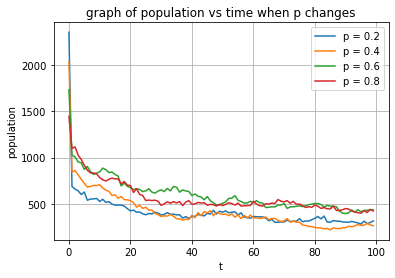

In [175]:
plt.plot(tt, pop2, label='p = 0.2')
plt.plot(tt, pop4, label='p = 0.4')
plt.plot(tt, pop6, label='p = 0.6')
plt.plot(tt, pop8, label='p = 0.8')
plt.xlabel('t')
plt.ylabel('population')
plt.grid()
plt.title('graph of population vs time when p changes')
plt.legend()
plt.show()

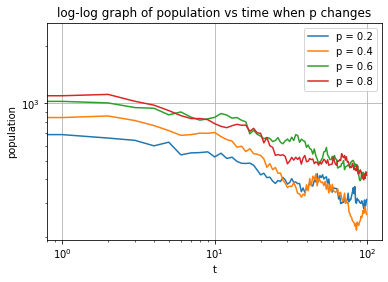

In [177]:
plt.loglog(tt, pop2, label='p = 0.2')
plt.loglog(tt, pop4, label='p = 0.4')
plt.loglog(tt, pop6, label='p = 0.6')
plt.loglog(tt, pop8, label='p = 0.8')
plt.xlabel('t')
plt.ylabel('population')
plt.grid()
plt.title('log-log graph of population vs time when p changes')
plt.legend()
plt.show()

# Bonus
### Considering the second neighbor

In [70]:
def count_alive_neighbors_p_second(board, row, col):
    """
    Count the number of alive neighbors for a given cell (row, col) on the board
    with periodic boundary conditions. The cell itself is not counted.

    Parameters:
    - board: 2D list representing the current state of the game.
    - row: Row index of the cell.
    - col: Column index of the cell.

    Returns:
    - count: Number of alive neighbors.
    """
    rows, cols = len(board), len(board[0])
    count = 0

    # Define the eight possible neighbors' relative positions
    neighbors = [(-2, -2), (-2, -1), (-2, 0), (-2, 1), (-2, 2),
                 (-1, -2), (-1, -1), (-1, 0), (-1, 1), (-1, 2),
                 (0, -2),  (0, -1),           (0, 1),  (0, 2),
                 (1, -2),  (1, -1),  (1, 0),  (1, 1),  (1, 2),
                 (2, -2),  (2, -1),  (2, 0),  (2, 1),  (2, 2)
                ]

    for dr, dc in neighbors:
        # Calculate the coordinates of the neighbor with periodic boundary conditions
        r, c = (row + dr) % rows, (col + dc) % cols

        # Exclude the cell itself from the count
        if (r, c) != (row, col):
            # Increment count if the neighbor is alive (1)
            count += board[r][c]

    return count

In [71]:
def next_generation_p_second(current_generation, p):
    """
    Generate the next generation of the Conway's Game of Life.

    Parameters:
    - current_generation: 2D list representing the current state of the game.

    Returns:
    - new_generation: 2D list representing the next generation.
    """
    rows, cols = len(current_generation), len(current_generation[0])

    # Create a new 2D list to store the next generation
    new_generation = [[0] * cols for _ in range(rows)]

    for i in range(rows):
        for j in range(cols):
            r = np.random.rand()
            # Count the number of alive neighbors for each cell
            neighbors_count = count_alive_neighbors_p_second(current_generation, i, j)

            # Apply Conway's rules to determine the next state of the cell
            if current_generation[i][j] == 1:
                # Cell is alive
                if neighbors_count == 2 or neighbors_count == 3:
                    new_generation[i][j] = 1  # Cell survives
            else:
                # Cell is dead
                if neighbors_count == 3:
                    new_generation[i][j] = 1  # Cell becomes alive
                if r > p:
                    new_generation[i][j] = 1

    return new_generation

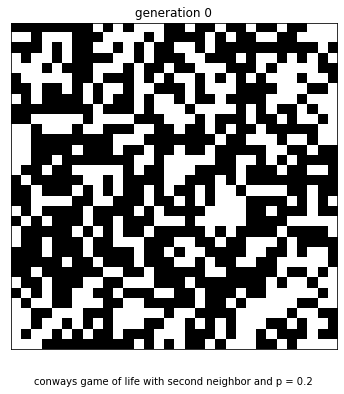

total population: 451


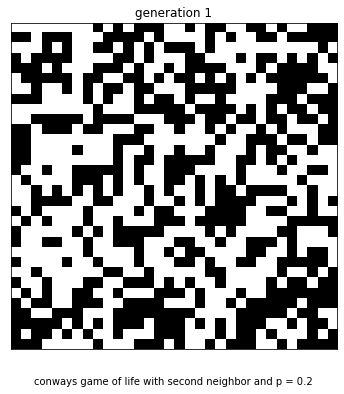

total population: 529


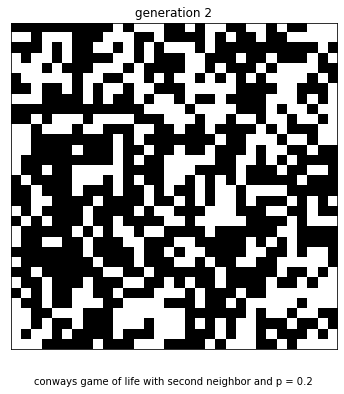

total population: 443


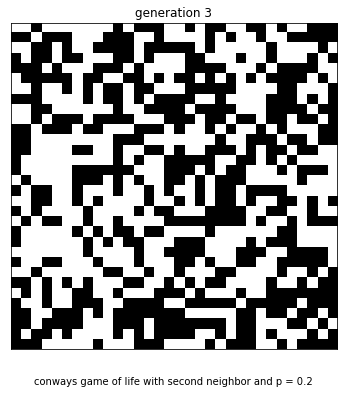

total population: 524


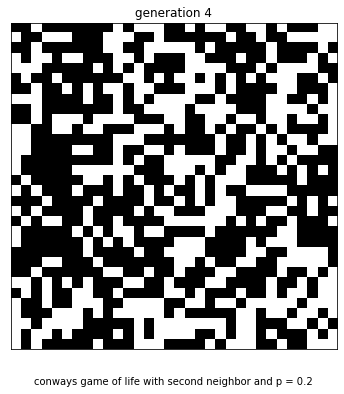

total population: 447


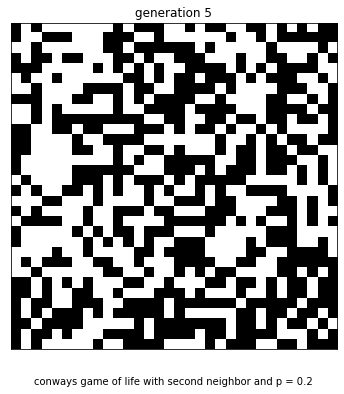

total population: 508


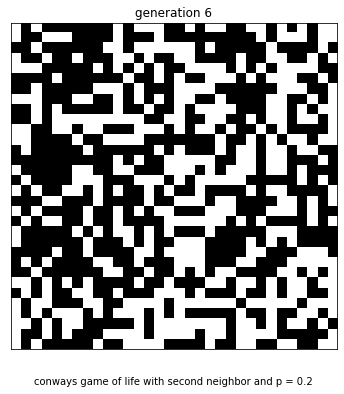

total population: 462


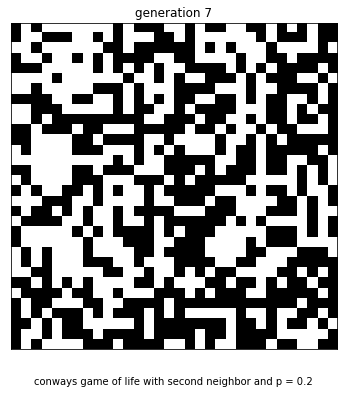

total population: 495


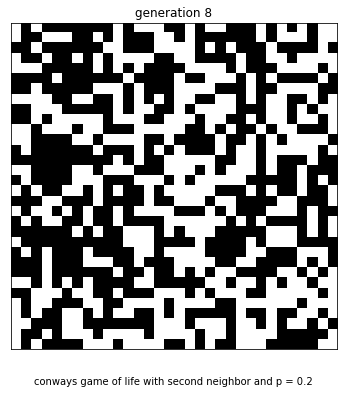

total population: 483


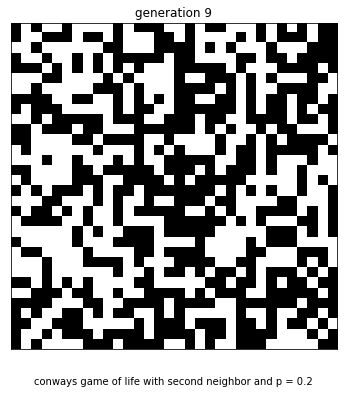

total population: 494


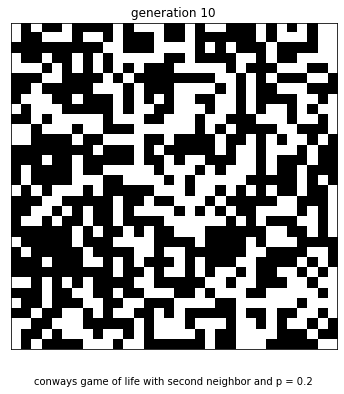

total population: 466


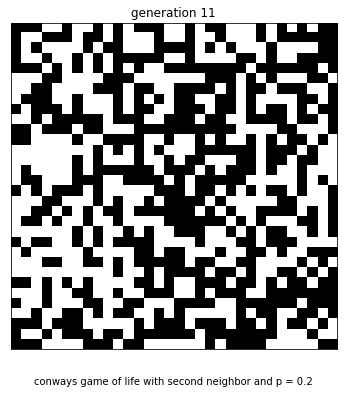

total population: 496


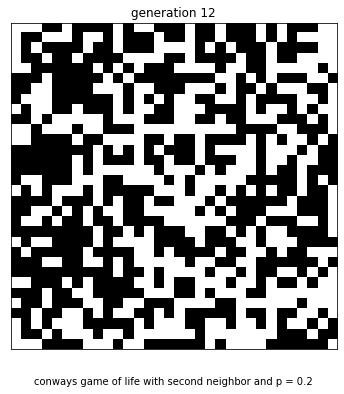

total population: 475


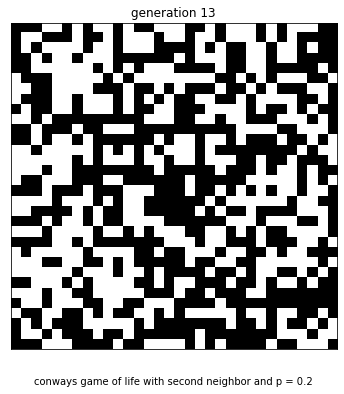

total population: 491


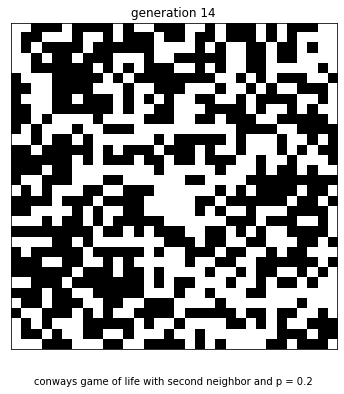

total population: 489


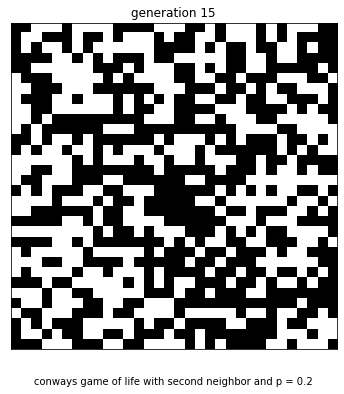

total population: 484


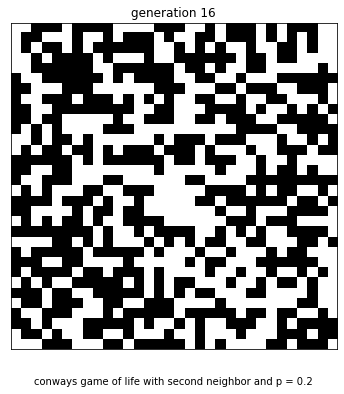

total population: 491


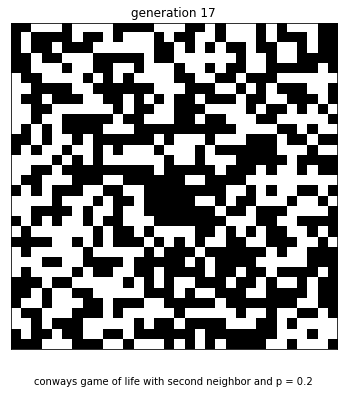

total population: 483


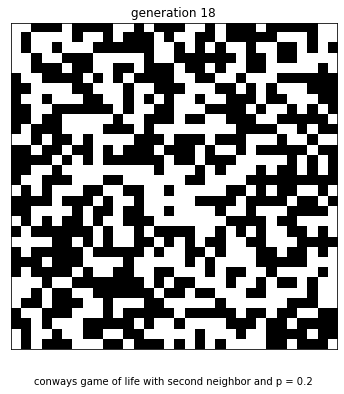

total population: 495


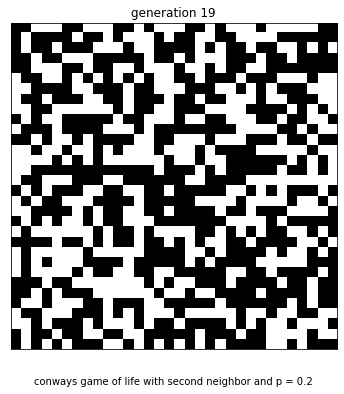

total population: 474


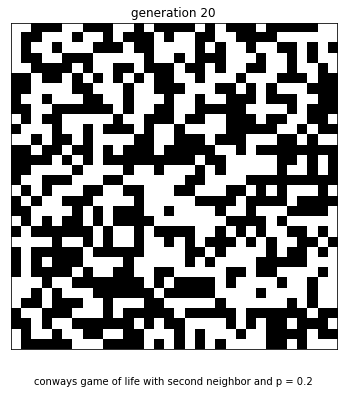

total population: 507


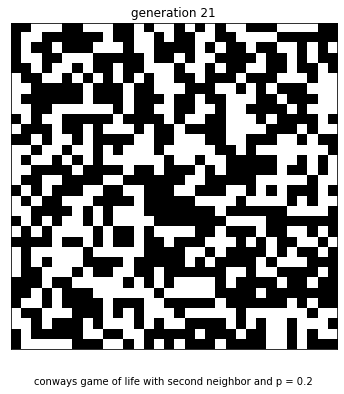

total population: 467


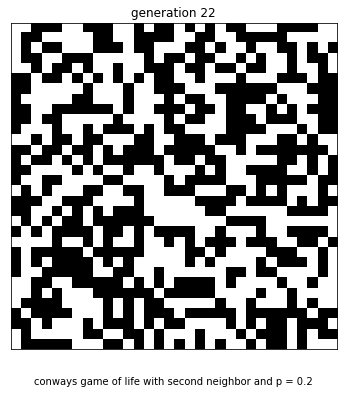

total population: 502


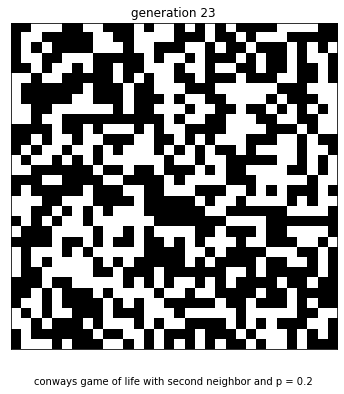

total population: 475


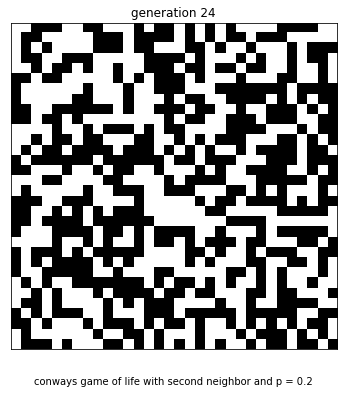

total population: 502


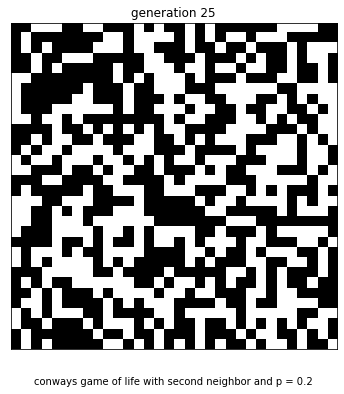

total population: 477


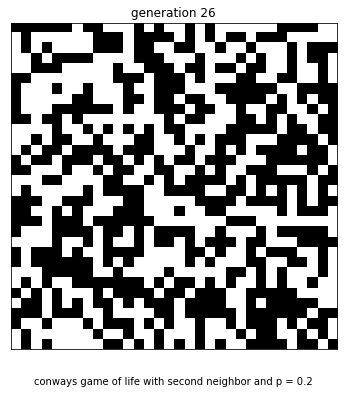

total population: 501


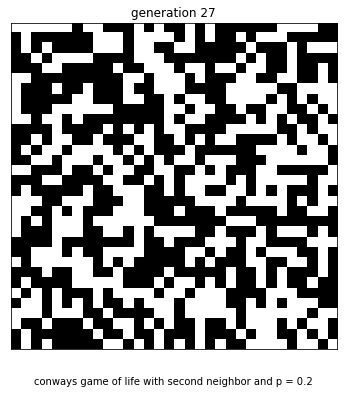

total population: 475


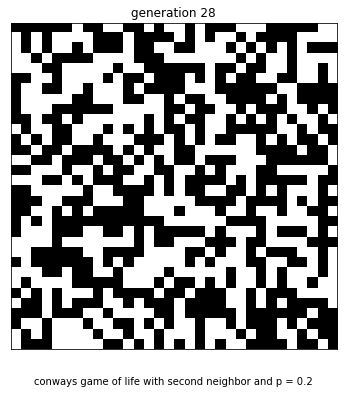

total population: 498


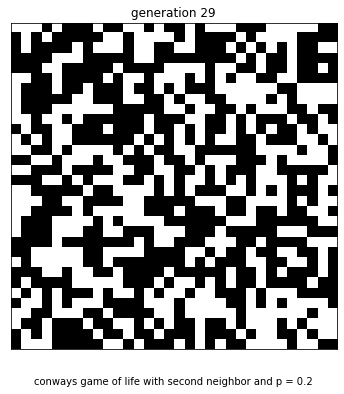

total population: 468


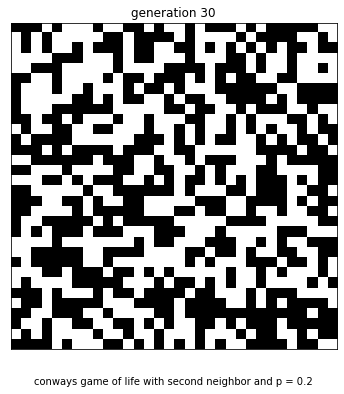

total population: 502


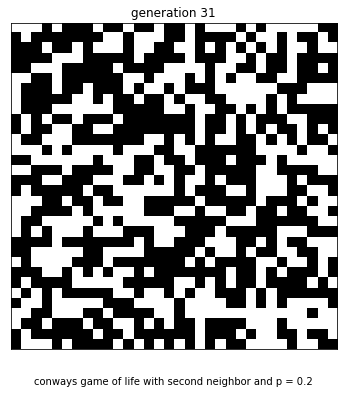

total population: 464


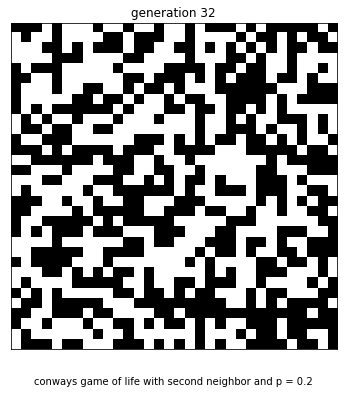

total population: 511


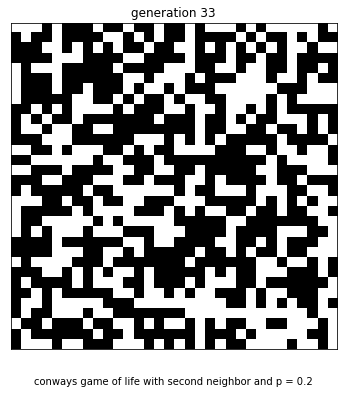

total population: 459


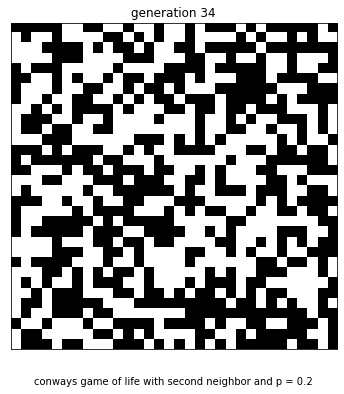

total population: 504


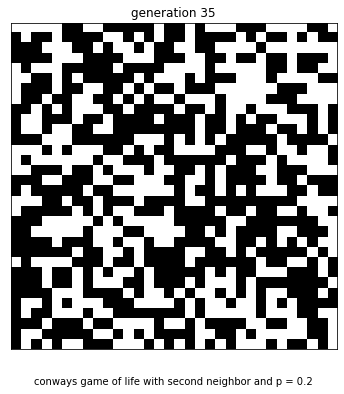

total population: 464


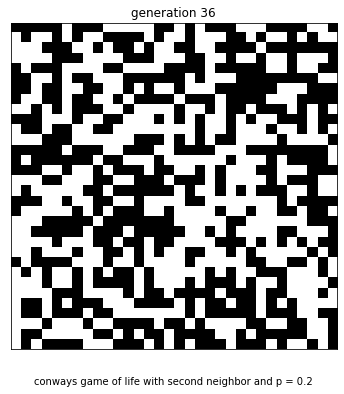

total population: 510


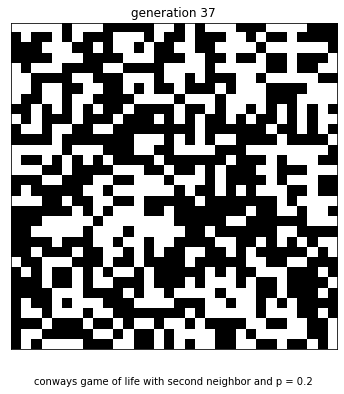

total population: 469


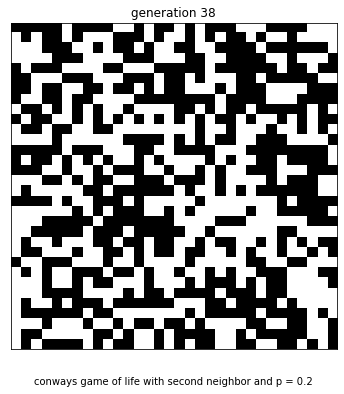

total population: 498


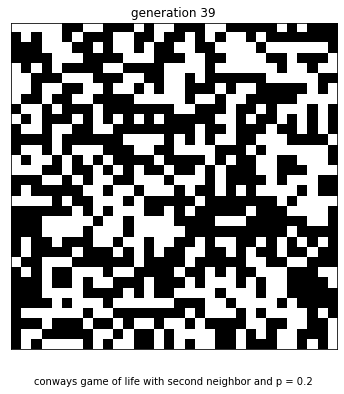

total population: 470


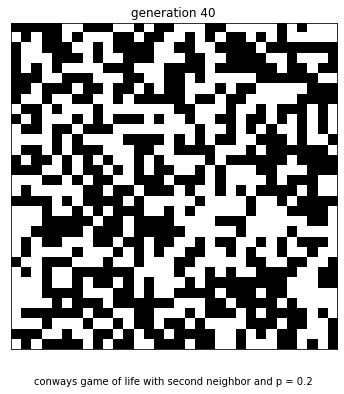

total population: 502


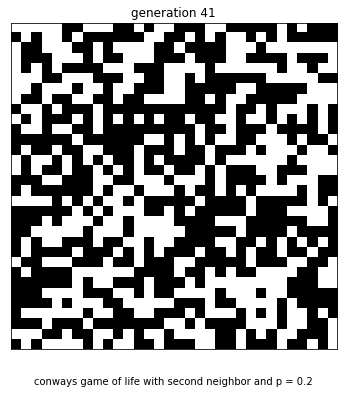

total population: 466


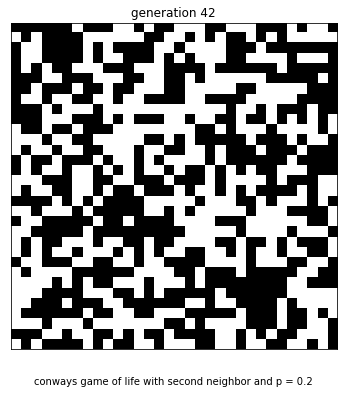

total population: 494


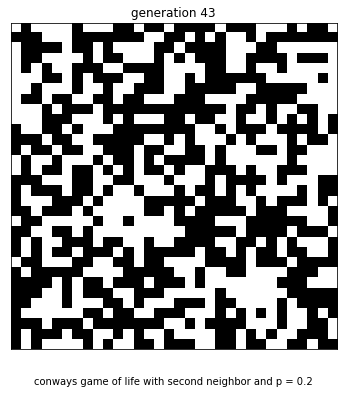

total population: 483


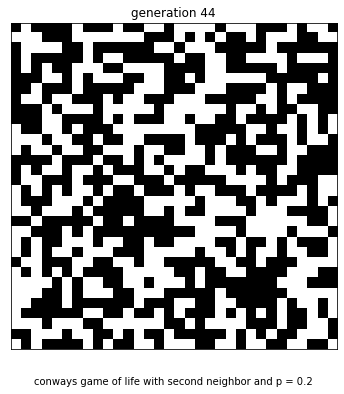

total population: 480


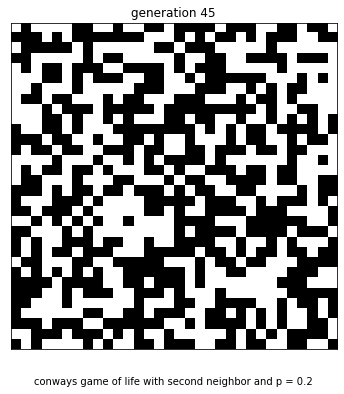

total population: 493


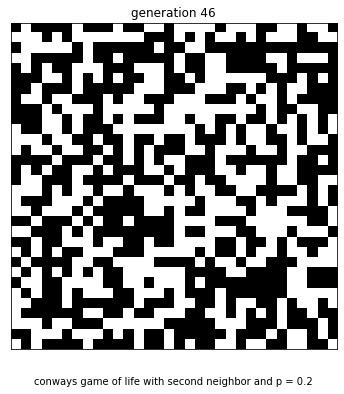

total population: 482


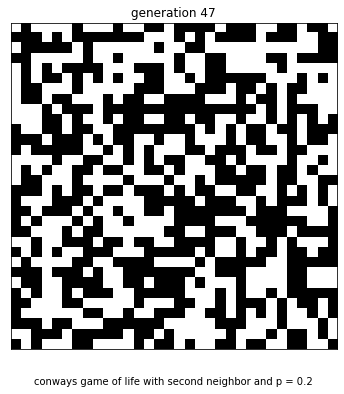

total population: 493


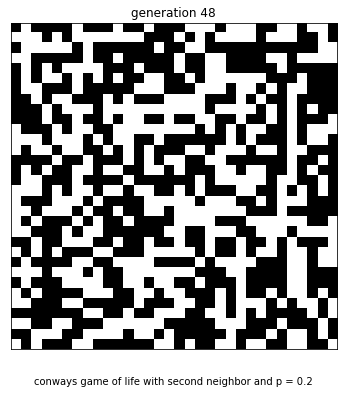

total population: 482


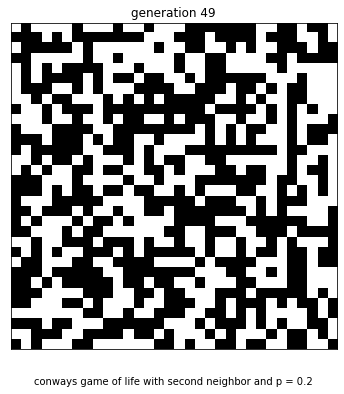

total population: 487


In [132]:
n = 32
t = 50
p = 0.1
popp = []
tt = [i for i in range(t)]
initial_world = np.random.randint(2, size=(n, n))
new_generation = next_generation_p_second(initial_world, p)
for _ in range(t):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(new_generation, cmap='gray')
    plt.title(f'generation {_}')
    plt.xticks([])
    plt.yticks([])
    caption_text = "conways game of life with second neighbor and p = 0.2"
    plt.text(0.5, -0.1, caption_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)
    plt.savefig(f'/Users/Mahyar/Desktop/conway/13/{_}.png', dpi=100)  # save to folder 13
    plt.show()
    population = np.sum(new_generation)
    popp.append(population)
    print(f'total population: {population}')
    new_generation = next_generation_p_second(new_generation, p)

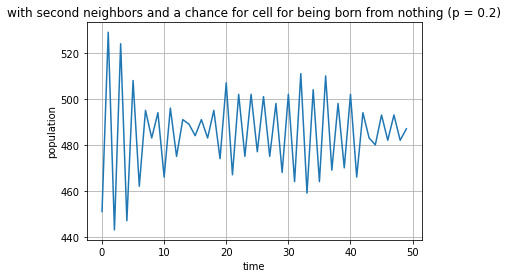

In [134]:
plt.plot(tt, popp,)
plt.xlabel('time')
plt.ylabel('population')
plt.grid()
plt.title('with second neighbors and a chance for cell for being born from nothing (p = 0.2)')
plt.show()

It looks like a derived oscillation that is not in phase with the period of oscillation.

In [121]:
def animate(path, name, d=0.2):
    image_files = [f for f in os.listdir(path) if f.endswith('.png')]
#     image_files.sort()
    images = []
    for image_file in image_files:
        image_path = os.path.join(path, image_file)
        images.append(imageio.imread(image_path))
    output_gif_path = f'/Users/Mahyar/Desktop/conway/{name}.gif'
    imageio.mimsave(output_gif_path, images, duration=d)

In [23]:
path1 = '/Users/Mahyar/Desktop/conway/1/'
name1 = '1'
animate(path1, name1)

In [28]:
path2 = '/Users/Mahyar/Desktop/conway/2/'
name2 = '2'
animate(path2, name2)

In [48]:
path3 = '/Users/Mahyar/Desktop/conway/3/'
name3 = '3'
animate(path3, name3)

In [49]:
path4 = '/Users/Mahyar/Desktop/conway/4/'
name4 = '4'
animate(path4, name4)

In [53]:
path5 = '/Users/Mahyar/Desktop/conway/5/'
name5 = '5'
animate(path5, name5)

In [107]:
path6 = '/Users/Mahyar/Desktop/conway/6/'
name6 = '6'
animate(path6, name6)

In [108]:
path7 = '/Users/Mahyar/Desktop/conway/7/'
name7 = '7'
animate(path7, name7)

In [122]:
path8 = '/Users/Mahyar/Desktop/conway/8/'
name8 = '8'
animate(path8, name8, d=0.05)

In [123]:
path9 = '/Users/Mahyar/Desktop/conway/9/'
name9 = '9'
animate(path9, name9, d=0.05)

In [124]:
path10 = '/Users/Mahyar/Desktop/conway/10/'
name10 = '10'
animate(path10, name10, d=0.05)

In [125]:
path11 = '/Users/Mahyar/Desktop/conway/11/'
name11 = '11'
animate(path11, name11, d=0.05)

In [126]:
path12 = '/Users/Mahyar/Desktop/conway/12/'
name12 = '12'
animate(path12, name12, d=0.05)

In [135]:
path13 = '/Users/Mahyar/Desktop/conway/13/'
name13 = '13'
animate(path13, name13, d=0.05)

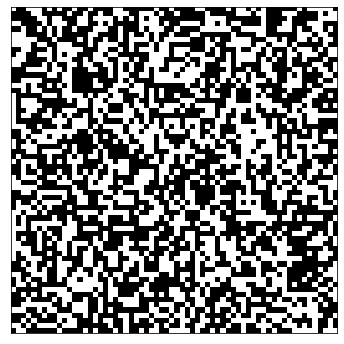

total population: 1895


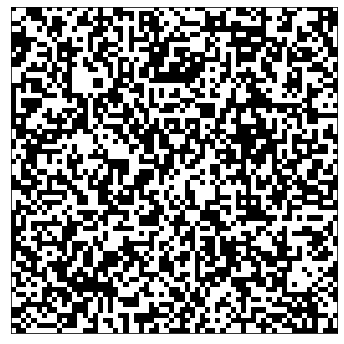

total population: 1974


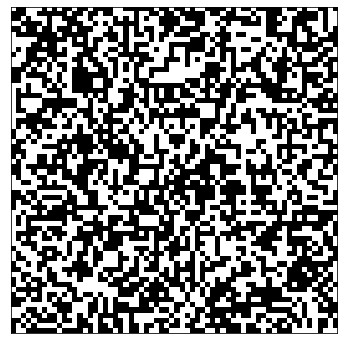

total population: 1912


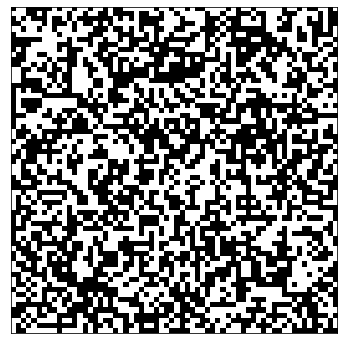

total population: 1965


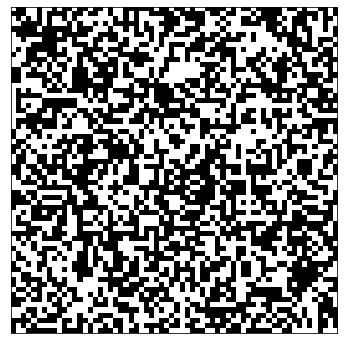

total population: 1933


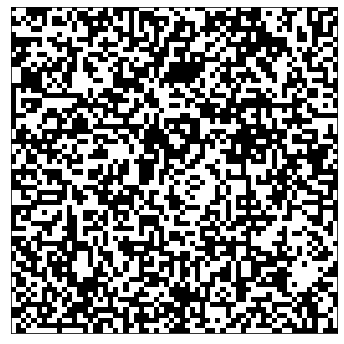

total population: 1944


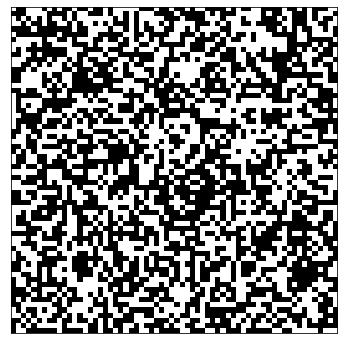

total population: 1936


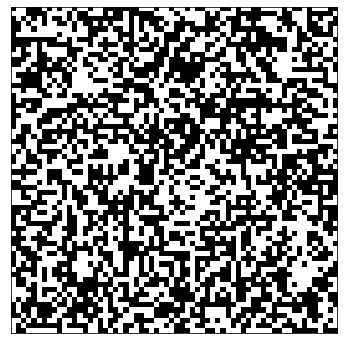

total population: 1958


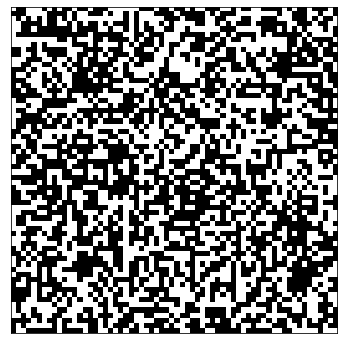

total population: 1900


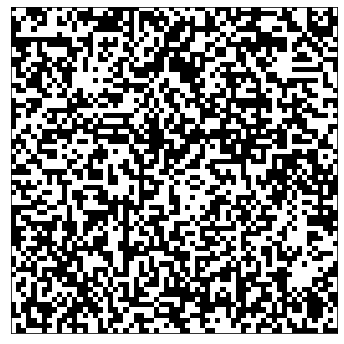

total population: 1975


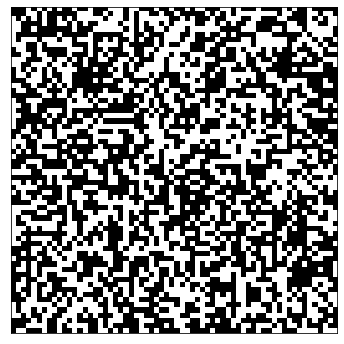

total population: 1914


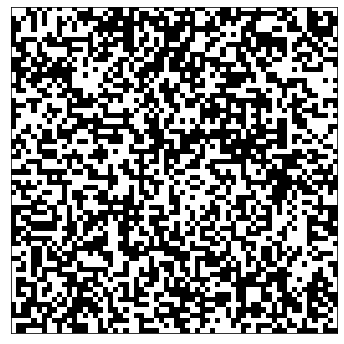

total population: 1974


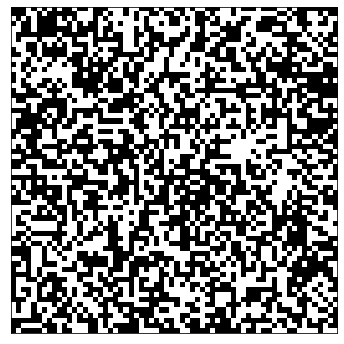

total population: 1922


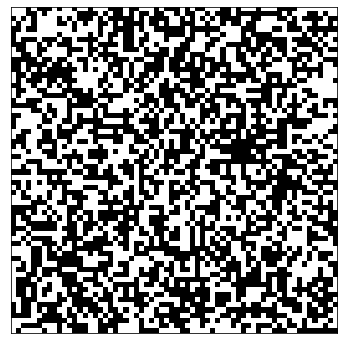

total population: 1946


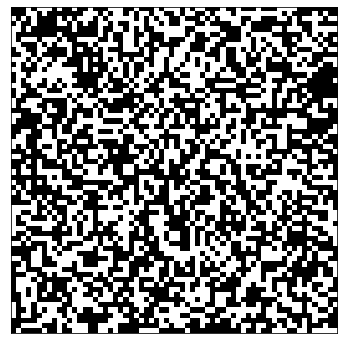

total population: 1910


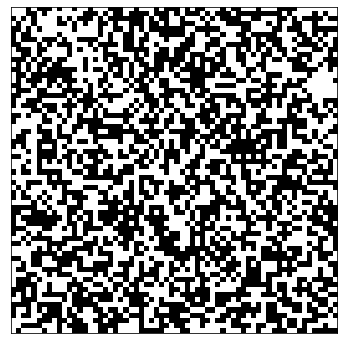

total population: 1967


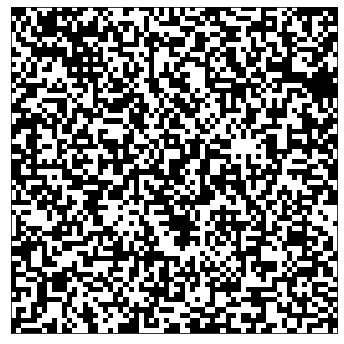

total population: 1895


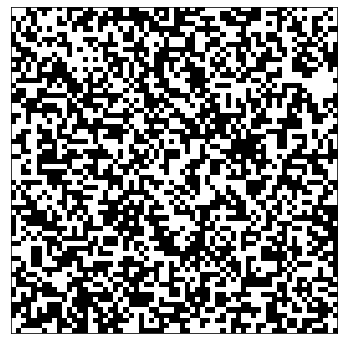

total population: 1975


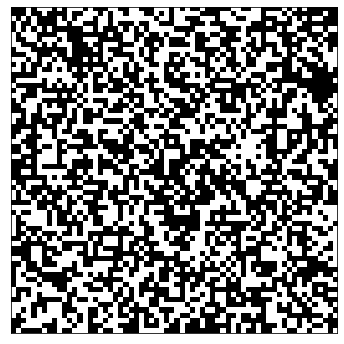

total population: 1906


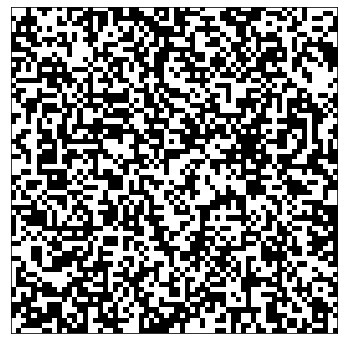

total population: 1956


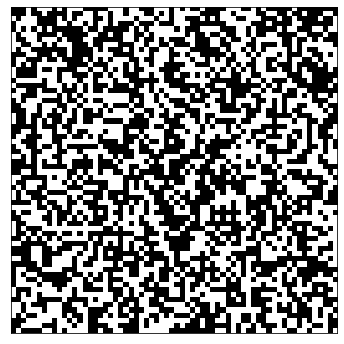

total population: 1944


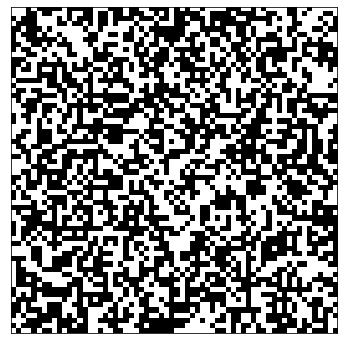

total population: 1926


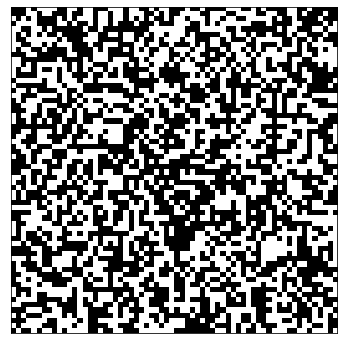

total population: 1947


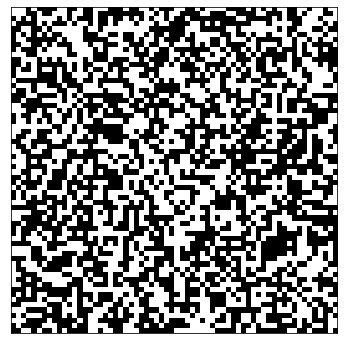

total population: 1958


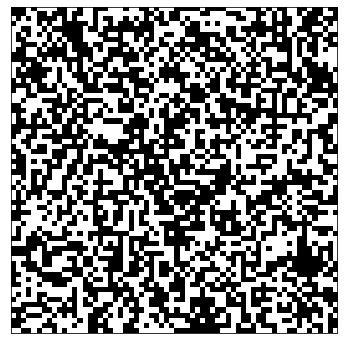

total population: 1928


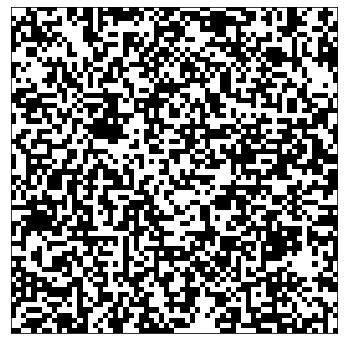

total population: 1947


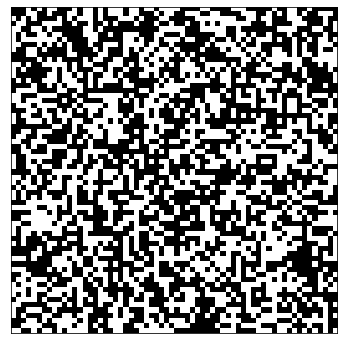

total population: 1936


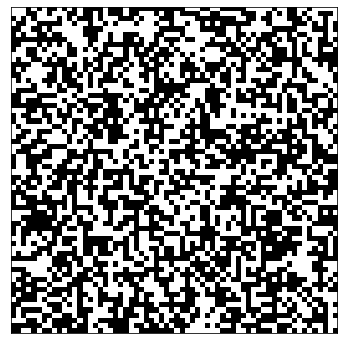

total population: 1945


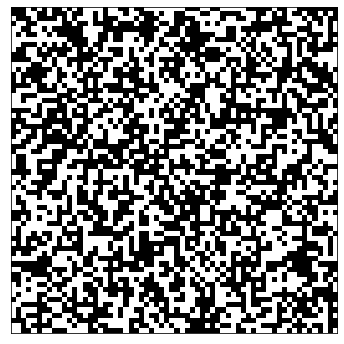

total population: 1941


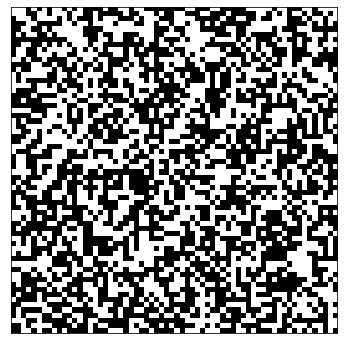

total population: 1954


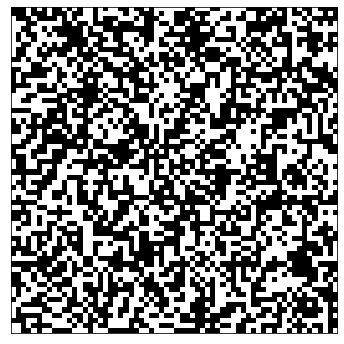

total population: 1915


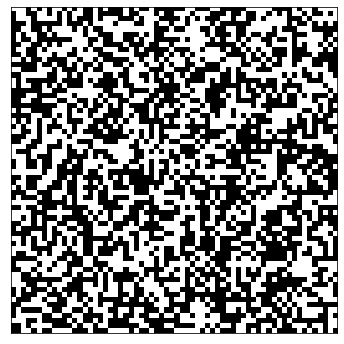

total population: 1956


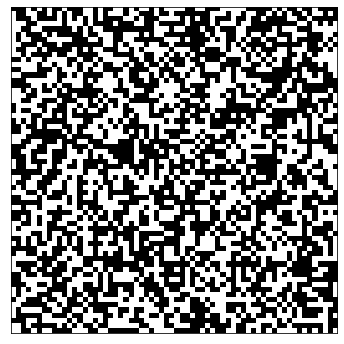

total population: 1909


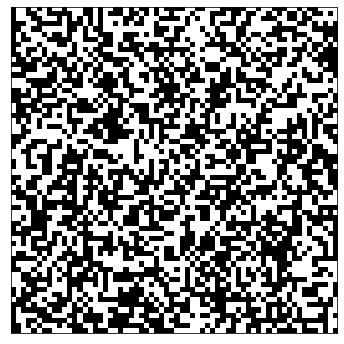

total population: 1976


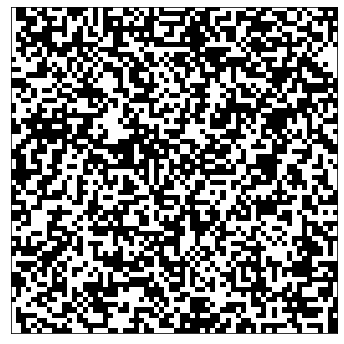

total population: 1916


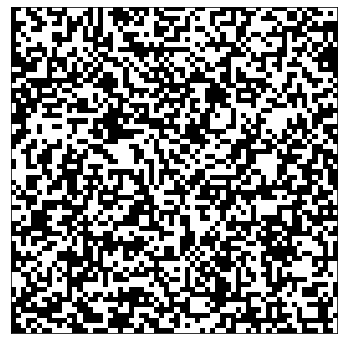

total population: 1975


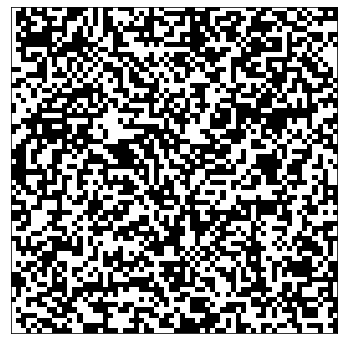

total population: 1938


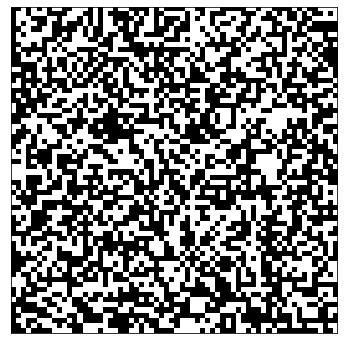

total population: 1935


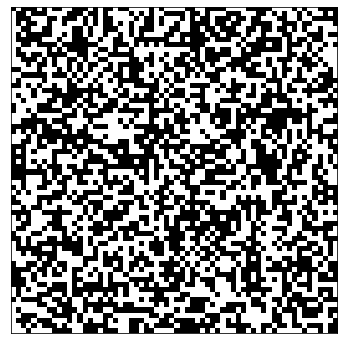

total population: 1965


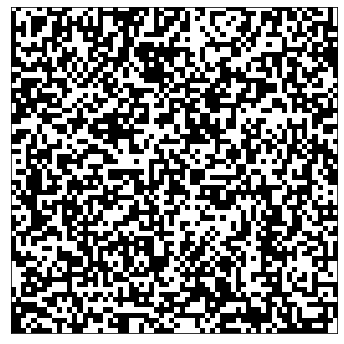

total population: 1914


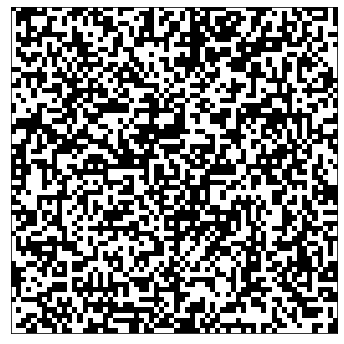

total population: 1956


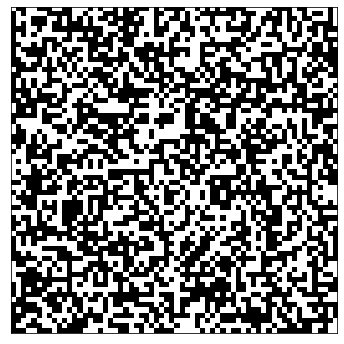

total population: 1902


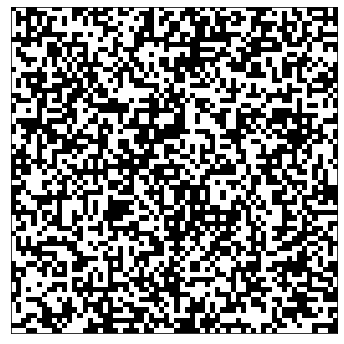

total population: 1989


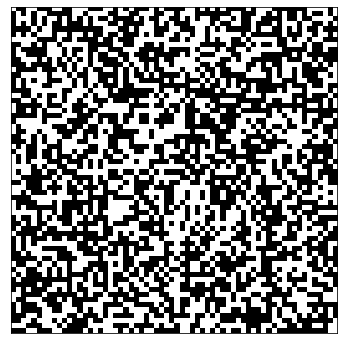

total population: 1910


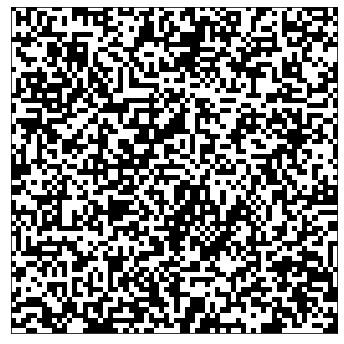

total population: 1959


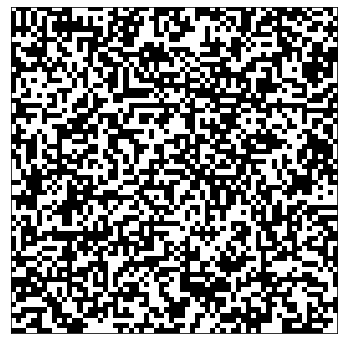

total population: 1906


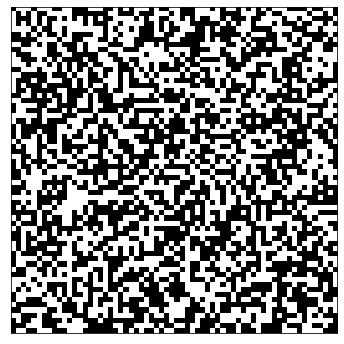

total population: 1964


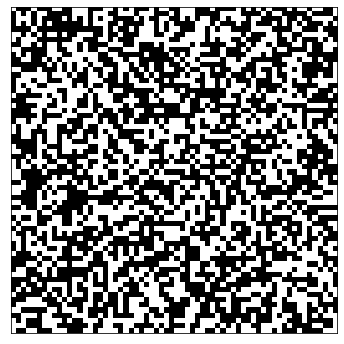

total population: 1919


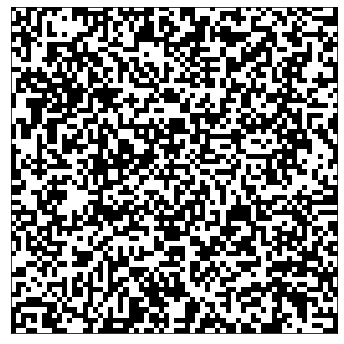

total population: 1958


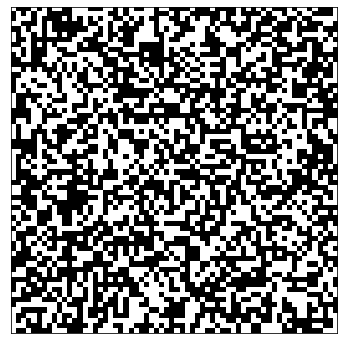

total population: 1912


In [139]:
n = 64
t = 50
p = 0.1
popp = []
tt = [i for i in range(t)]
initial_world = np.random.randint(2, size=(n, n))
new_generation = next_generation_p_second(initial_world, p)
for _ in range(t):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(new_generation, cmap='gray')
#     plt.title(f'generation {_}')
    plt.xticks([])
    plt.yticks([])
#     caption_text = "conways game of life with second neighbor and p = 0.2"
#     plt.text(0.5, -0.1, caption_text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)
    plt.savefig(f'/Users/Mahyar/Desktop/conway/easteregg//{_}.png', dpi=200)  # save to folder easteregg
    plt.show()
    population = np.sum(new_generation)
    popp.append(population)
    print(f'total population: {population}')
    new_generation = next_generation_p_second(new_generation, p)

In [140]:
pathe = '/Users/Mahyar/Desktop/conway/easteregg//'
namee = 'e'
animate(pathe, namee, d=0.05)